In [1]:
model = "lstm"
card_type = "Diamonds"

In [2]:
# Parameters
card_type = "Spades"
model = "lstm"


In [3]:
import pandas as pd
import numpy as np
from chance_utils import compute_statistics
from matplotlib import pyplot as plt

In [4]:
possible_result = ["7","8","9","10","J","Q","K","A"]
all_cards = ['Spades','Diamonds','Hearts','Clubs']
n_outputs = 8
n_features = 8*4
sample_length = 240*5

In [5]:
dummies = pd.get_dummies(possible_result).T
dummies = dummies.reindex(index=possible_result,fill_value=0)
dummies = dummies.reset_index()
dummies

,index,0,1,2,3,4,5,6,7
0,7,1,0,0,0,0,0,0,0
1,8,0,1,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0
3,10,0,0,0,1,0,0,0,0
4,J,0,0,0,0,1,0,0,0
5,Q,0,0,0,0,0,1,0,0
6,K,0,0,0,0,0,0,1,0
7,A,0,0,0,0,0,0,0,1


In [6]:
def replace_with_dummies(df):
    df = pd.merge(dummies,df,left_on='index',right_on="Spades",how="right").drop(columns=["Spades"])
    df = pd.merge(dummies,df,left_on='index',right_on="Diamonds",how="right",suffixes=("_Diamonds","")).drop(columns=["Diamonds","index_Diamonds"])
    df = pd.merge(dummies,df,left_on='index',right_on="Hearts",how="right",suffixes=("_Hearts","")).drop(columns=["Hearts","index_Hearts"])
    return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])

    

In [7]:
test_chance = pd.read_csv("test_chance.csv",index_col=[0])
test_chance.Date = pd.to_datetime(test_chance.Date)

train_chance = pd.read_csv('train_chance.csv',index_col=[0])
train_chance.Date = pd.to_datetime(train_chance.Date)

In [8]:
test_chance = replace_with_dummies(test_chance)
train_chance = replace_with_dummies(train_chance)

/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_50099/3572030588.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'7', '1', '6', '5', '2', '3', '0', '4'} in the result is deprecated and will raise a MergeError in a future version.
  return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])
/var/folders/3r/ygns0_h16pl1__pln5g3j8t80000gp/T/ipykernel_50099/3572030588.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'7', '1', '6', '5', '2', '3', '0', '4'} in the result is deprecated and will raise a MergeError in a future version.
  return pd.merge(dummies,df,left_on='index',right_on="Clubs",how="right",suffixes=("_Clubs","")).drop(columns=["index","Clubs","index_Clubs"])


In [9]:
# make the samples ready to tsfresh
spades_test_chance = test_chance.sort_values(by="Date").reset_index(drop=True)
spades_test_chance['id'] = 1

spades_train_chance = train_chance.sort_values(by="Date").reset_index(drop=True)
spades_train_chance['id'] = 1

spades_train_chance.tail()

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,1,2,3,4,5,6,7,Date,lottoryNumber,id
29119,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,35924,1
29120,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,35925,1
29121,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,35926,1
29122,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,35927,1
29123,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,35928,1


In [10]:
from tsfresh.utilities.dataframe_functions import roll_time_series

df_test_rolled = roll_time_series(spades_test_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled = roll_time_series(spades_train_chance, column_id="id",column_sort="Date",max_timeshift=sample_length-1,min_timeshift=sample_length-1)
df_train_rolled.tail()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:03<02:27,  3.78s/it]

Rolling:   8%|▊         | 3/40 [00:03<00:37,  1.02s/it]

Rolling:  15%|█▌        | 6/40 [00:05<00:22,  1.48it/s]

Rolling:  18%|█▊        | 7/40 [00:05<00:20,  1.61it/s]

Rolling:  20%|██        | 8/40 [00:05<00:17,  1.85it/s]

Rolling:  22%|██▎       | 9/40 [00:06<00:15,  2.06it/s]

Rolling:  25%|██▌       | 10/40 [00:06<00:13,  2.25it/s]

Rolling:  28%|██▊       | 11/40 [00:07<00:12,  2.37it/s]

Rolling:  30%|███       | 12/40 [00:07<00:11,  2.39it/s]

Rolling:  32%|███▎      | 13/40 [00:07<00:09,  2.79it/s]

Rolling:  35%|███▌      | 14/40 [00:08<00:09,  2.61it/s]

Rolling:  38%|███▊      | 15/40 [00:08<00:08,  3.03it/s]

Rolling:  40%|████      | 16/40 [00:08<00:07,  3.34it/s]

Rolling:  42%|████▎     | 17/40 [00:09<00:08,  2.77it/s]

Rolling:  45%|████▌     | 18/40 [00:09<00:06,  3.21it/s]

Rolling:  48%|████▊     | 19/40 [00:09<00:05,  3.58it/s]

Rolling:  50%|█████     | 20/40 [00:10<00:07,  2.58it/s]

Rolling:  52%|█████▎    | 21/40 [00:10<00:06,  3.02it/s]

Rolling:  55%|█████▌    | 22/40 [00:10<00:05,  3.35it/s]

Rolling:  57%|█████▊    | 23/40 [00:11<00:06,  2.47it/s]

Rolling:  60%|██████    | 24/40 [00:11<00:05,  2.94it/s]

Rolling:  62%|██████▎   | 25/40 [00:11<00:04,  3.37it/s]

Rolling:  65%|██████▌   | 26/40 [00:11<00:03,  3.80it/s]

Rolling:  68%|██████▊   | 27/40 [00:11<00:03,  4.07it/s]

Rolling:  70%|███████   | 28/40 [00:12<00:04,  2.40it/s]

Rolling:  72%|███████▎  | 29/40 [00:12<00:03,  2.80it/s]

Rolling:  75%|███████▌  | 30/40 [00:13<00:03,  3.23it/s]

Rolling:  78%|███████▊  | 31/40 [00:13<00:02,  3.63it/s]

Rolling:  80%|████████  | 32/40 [00:13<00:01,  4.02it/s]

Rolling:  82%|████████▎ | 33/40 [00:13<00:01,  4.31it/s]

Rolling:  85%|████████▌ | 34/40 [00:14<00:02,  2.48it/s]

Rolling:  88%|████████▊ | 35/40 [00:14<00:01,  2.98it/s]

Rolling:  90%|█████████ | 36/40 [00:14<00:01,  3.54it/s]

Rolling:  92%|█████████▎| 37/40 [00:15<00:00,  4.07it/s]

Rolling:  95%|█████████▌| 38/40 [00:15<00:00,  4.57it/s]

Rolling:  98%|█████████▊| 39/40 [00:15<00:00,  4.91it/s]

Rolling: 100%|██████████| 40/40 [00:15<00:00,  5.42it/s]

Rolling: 100%|██████████| 40/40 [00:15<00:00,  2.58it/s]

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(


Rolling:   0%|          | 0/40 [00:00<?, ?it/s]

Rolling:   2%|▎         | 1/40 [00:07<04:56,  7.61s/it]

Rolling:   5%|▌         | 2/40 [00:09<02:34,  4.06s/it]

Rolling:   8%|▊         | 3/40 [00:12<02:23,  3.88s/it]

Rolling:  10%|█         | 4/40 [00:14<01:47,  2.98s/it]

Rolling:  12%|█▎        | 5/40 [00:17<01:42,  2.92s/it]

Rolling:  15%|█▌        | 6/40 [00:18<01:22,  2.43s/it]

Rolling:  18%|█▊        | 7/40 [00:20<01:12,  2.19s/it]

Rolling:  20%|██        | 8/40 [00:23<01:19,  2.49s/it]

Rolling:  22%|██▎       | 9/40 [00:25<01:09,  2.26s/it]

Rolling:  25%|██▌       | 10/40 [00:27<01:03,  2.10s/it]

Rolling:  28%|██▊       | 11/40 [00:28<00:57,  1.99s/it]

Rolling:  30%|███       | 12/40 [00:29<00:47,  1.70s/it]

Rolling:  32%|███▎      | 13/40 [00:32<00:56,  2.10s/it]

Rolling:  35%|███▌      | 14/40 [00:34<00:49,  1.90s/it]

Rolling:  38%|███▊      | 15/40 [00:35<00:42,  1.70s/it]

Rolling:  40%|████      | 16/40 [00:36<00:37,  1.55s/it]

Rolling:  42%|████▎     | 17/40 [00:38<00:34,  1.52s/it]

Rolling:  45%|████▌     | 18/40 [00:42<00:49,  2.24s/it]

Rolling:  48%|████▊     | 19/40 [00:43<00:41,  1.98s/it]

Rolling:  50%|█████     | 20/40 [00:45<00:36,  1.84s/it]

Rolling:  52%|█████▎    | 21/40 [00:46<00:32,  1.70s/it]

Rolling:  55%|█████▌    | 22/40 [00:47<00:28,  1.61s/it]

Rolling:  57%|█████▊    | 23/40 [00:49<00:27,  1.61s/it]

Rolling:  60%|██████    | 24/40 [00:51<00:26,  1.64s/it]

Rolling:  62%|██████▎   | 25/40 [00:56<00:41,  2.75s/it]

Rolling:  65%|██████▌   | 26/40 [00:57<00:33,  2.37s/it]

Rolling:  68%|██████▊   | 27/40 [00:59<00:27,  2.10s/it]

Rolling:  70%|███████   | 28/40 [01:00<00:22,  1.90s/it]

Rolling:  72%|███████▎  | 29/40 [01:02<00:19,  1.78s/it]

Rolling:  75%|███████▌  | 30/40 [01:03<00:17,  1.75s/it]

Rolling:  78%|███████▊  | 31/40 [01:05<00:15,  1.70s/it]

Rolling:  80%|████████  | 32/40 [01:07<00:14,  1.76s/it]

Rolling:  82%|████████▎ | 33/40 [01:09<00:13,  1.96s/it]

Rolling:  85%|████████▌ | 34/40 [01:16<00:20,  3.43s/it]

Rolling:  88%|████████▊ | 35/40 [01:18<00:14,  2.93s/it]

Rolling:  90%|█████████ | 36/40 [01:20<00:09,  2.50s/it]

Rolling:  92%|█████████▎| 37/40 [01:21<00:06,  2.18s/it]

Rolling:  95%|█████████▌| 38/40 [01:23<00:04,  2.01s/it]

Rolling:  98%|█████████▊| 39/40 [01:24<00:01,  1.91s/it]

Rolling: 100%|██████████| 40/40 [01:26<00:00,  1.83s/it]

Rolling: 100%|██████████| 40/40 [01:26<00:00,  2.16s/it]

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,1,2,3,4,5,6,7,Date,lottoryNumber,id
33509995,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035924,35924,"(1, 2017-12-07 00:00:00.035928)"
33509996,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035925,35925,"(1, 2017-12-07 00:00:00.035928)"
33509997,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,2017-12-07 00:00:00.035926,35926,"(1, 2017-12-07 00:00:00.035928)"
33509998,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2017-12-07 00:00:00.035927,35927,"(1, 2017-12-07 00:00:00.035928)"
33509999,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,2017-12-07 00:00:00.035928,35928,"(1, 2017-12-07 00:00:00.035928)"


In [11]:
test_labeling_df = test_chance.drop(columns=["Date"])
train_labeling_df = train_chance.drop(columns=["Date"])

labeling_df = pd.concat([test_labeling_df,train_labeling_df])
labeling_df.head()

,0_Clubs,1_Clubs,2_Clubs,3_Clubs,4_Clubs,5_Clubs,6_Clubs,7_Clubs,0,1,...,7_Diamonds,0,1,2,3,4,5,6,7,lottoryNumber
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,35944
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,35945
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,35946
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,35947
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,35948


In [12]:
def make_a_sample(current_sample,labeling_df):
    
    current_id = current_sample['id'].values[0]
    final_label = None
    
    assert current_sample.shape[0] == sample_length, f"{current_id} is not shape of {sample_length}"

    lottey_num_predicting = (current_id[1].microsecond + 1)
    label = labeling_df[labeling_df.lottoryNumber == lottey_num_predicting]
    
    if len(label) == 1:
        final_label = label.values[0]

    sample = current_sample.drop(columns=['id','Date']).values

    return lottey_num_predicting,final_label,sample

In [13]:
train = df_train_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

train = sorted(train.values,key=lambda x:x[0])
_,train_y,train_x = map(list, zip(*train))

In [14]:
test = df_test_rolled.groupby("id").apply(lambda x:make_a_sample(x,labeling_df))

test = sorted(test.values,key=lambda x:x[0])
_,test_y,test_x = map(list, zip(*test))

In [15]:
test_y = pd.DataFrame(test_y[:-1])
last_sample = test_x[-1]

test_x = test_x[:-1]
train_y = pd.DataFrame(train_y)

In [16]:
test_x = np.stack(test_x)
train_x = np.stack(train_x)

In [17]:
test_x = test_x[:,:,:-1]
train_x = train_x[:,:,:-1]
test_y = test_y.iloc[:,:-1]
train_y = train_y.iloc[:,:-1]

In [18]:
assert test_x.shape[0] == test_y.shape[0] and train_x.shape[0] == train_y.shape[0]

In [19]:
print(f"Test shape {test_x.shape}")
print(f"Train shape {train_x.shape}")

Test shape (8509, 1200, 32)
Train shape (27925, 1200, 32)


In [20]:
test_y.iloc[:,:8].shape

(8509, 8)

In [21]:
import tensorflow as tf

if model == "lstm":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(100, input_shape=(sample_length,n_features)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
elif model == "nn":
    #
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(sample_length,8)))
    model.add(tf.keras.layers.Dense(350, activation='relu'))
    model.add(tf.keras.layers.Dense(250, activation='relu'))
    model.add(tf.keras.layers.Dense(150, activation='relu'))
    model.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))
    model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
    
model.summary()
print("==========================")
for layer in model.layers:
    print(layer.input_shape)

2022-08-14 21:42:04.212528: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 100)               53200     


 dropout (Dropout)           (None, 100)               0         


 dense (Dense)               (None, 100)               10100     


 dense_1 (Dense)             (None, 8)                 808       


Total params: 64,108


Trainable params: 64,108


Non-trainable params: 0


_________________________________________________________________


(None, 1200, 32)
(None, 100)
(None, 100)
(None, 100)


In [22]:
card_type_index = all_cards.index(card_type)
start_index = card_type_index*8
end_index = (card_type_index+1)*8

test_y = test_y.iloc[:,start_index:end_index]
train_y = train_y.iloc[:,start_index:end_index]

In [23]:
assert not np.isnan(train_x).any()
assert not np.isnan(train_y).any().any()
assert not np.isnan(test_x).any()
assert not np.isnan(test_y).any().any()

In [24]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
#  
history = model.fit(train_x,train_y,validation_data=(test_x,test_y),batch_size=64,epochs=300,callbacks=[es])

Epoch 1/300


  1/437 [..............................] - ETA: 34:30 - loss: 2.0914 - accuracy: 0.1406

  2/437 [..............................] - ETA: 6:16 - loss: 2.0936 - accuracy: 0.1016 

  3/437 [..............................] - ETA: 6:13 - loss: 2.0899 - accuracy: 0.1198

  4/437 [..............................] - ETA: 6:13 - loss: 2.0873 - accuracy: 0.1211

  5/437 [..............................] - ETA: 6:25 - loss: 2.0866 - accuracy: 0.1187

  6/437 [..............................] - ETA: 6:21 - loss: 2.0894 - accuracy: 0.1094

  7/437 [..............................] - ETA: 6:43 - loss: 2.0879 - accuracy: 0.1049

  8/437 [..............................] - ETA: 6:45 - loss: 2.0874 - accuracy: 0.1035

  9/437 [..............................] - ETA: 6:46 - loss: 2.0877 - accuracy: 0.1111

 10/437 [..............................] - ETA: 6:49 - loss: 2.0850 - accuracy: 0.1203

 11/437 [..............................] - ETA: 6:50 - loss: 2.0850 - accuracy: 0.1179

 12/437 [..............................] - ETA: 6:53 - loss: 2.0844 - accuracy: 0.1172

 13/437 [..............................] - ETA: 6:53 - loss: 2.0845 - accuracy: 0.1190

 14/437 [..............................] - ETA: 6:57 - loss: 2.0845 - accuracy: 0.1183

 15/437 [>.............................] - ETA: 7:01 - loss: 2.0849 - accuracy: 0.1229

 16/437 [>.............................] - ETA: 7:10 - loss: 2.0834 - accuracy: 0.1309

 17/437 [>.............................] - ETA: 7:16 - loss: 2.0831 - accuracy: 0.1314

 18/437 [>.............................] - ETA: 7:25 - loss: 2.0822 - accuracy: 0.1319

 19/437 [>.............................] - ETA: 7:31 - loss: 2.0824 - accuracy: 0.1283

 20/437 [>.............................] - ETA: 7:34 - loss: 2.0822 - accuracy: 0.1281

 21/437 [>.............................] - ETA: 7:57 - loss: 2.0828 - accuracy: 0.1243

 22/437 [>.............................] - ETA: 8:06 - loss: 2.0822 - accuracy: 0.1243

 23/437 [>.............................] - ETA: 8:04 - loss: 2.0828 - accuracy: 0.1250

 24/437 [>.............................] - ETA: 8:04 - loss: 2.0828 - accuracy: 0.1224

 25/437 [>.............................] - ETA: 8:07 - loss: 2.0828 - accuracy: 0.1213

 26/437 [>.............................] - ETA: 8:09 - loss: 2.0831 - accuracy: 0.1208

 27/437 [>.............................] - ETA: 8:10 - loss: 2.0825 - accuracy: 0.1227

 28/437 [>.............................] - ETA: 8:11 - loss: 2.0828 - accuracy: 0.1233

 29/437 [>.............................] - ETA: 8:13 - loss: 2.0830 - accuracy: 0.1234

 30/437 [=>............................] - ETA: 8:19 - loss: 2.0828 - accuracy: 0.1229

 31/437 [=>............................] - ETA: 8:23 - loss: 2.0831 - accuracy: 0.1220

 32/437 [=>............................] - ETA: 8:26 - loss: 2.0832 - accuracy: 0.1216

 33/437 [=>............................] - ETA: 8:28 - loss: 2.0832 - accuracy: 0.1212

 34/437 [=>............................] - ETA: 8:31 - loss: 2.0831 - accuracy: 0.1209

 35/437 [=>............................] - ETA: 8:35 - loss: 2.0833 - accuracy: 0.1201

 36/437 [=>............................] - ETA: 8:41 - loss: 2.0830 - accuracy: 0.1202

 37/437 [=>............................] - ETA: 8:42 - loss: 2.0831 - accuracy: 0.1204

 38/437 [=>............................] - ETA: 8:42 - loss: 2.0831 - accuracy: 0.1205

 39/437 [=>............................] - ETA: 8:41 - loss: 2.0830 - accuracy: 0.1218

 40/437 [=>............................] - ETA: 8:39 - loss: 2.0832 - accuracy: 0.1199

 41/437 [=>............................] - ETA: 8:39 - loss: 2.0835 - accuracy: 0.1204

 42/437 [=>............................] - ETA: 8:39 - loss: 2.0836 - accuracy: 0.1198

 43/437 [=>............................] - ETA: 8:40 - loss: 2.0835 - accuracy: 0.1206

 44/437 [==>...........................] - ETA: 8:39 - loss: 2.0836 - accuracy: 0.1204

 45/437 [==>...........................] - ETA: 8:43 - loss: 2.0837 - accuracy: 0.1208

 46/437 [==>...........................] - ETA: 8:44 - loss: 2.0836 - accuracy: 0.1209

 47/437 [==>...........................] - ETA: 8:44 - loss: 2.0836 - accuracy: 0.1207

 48/437 [==>...........................] - ETA: 8:43 - loss: 2.0834 - accuracy: 0.1211

 49/437 [==>...........................] - ETA: 8:43 - loss: 2.0833 - accuracy: 0.1218

 50/437 [==>...........................] - ETA: 8:45 - loss: 2.0833 - accuracy: 0.1200

 51/437 [==>...........................] - ETA: 8:46 - loss: 2.0832 - accuracy: 0.1204

 52/437 [==>...........................] - ETA: 8:50 - loss: 2.0831 - accuracy: 0.1196

 53/437 [==>...........................] - ETA: 8:53 - loss: 2.0833 - accuracy: 0.1200

 54/437 [==>...........................] - ETA: 8:55 - loss: 2.0833 - accuracy: 0.1198

 55/437 [==>...........................] - ETA: 8:57 - loss: 2.0832 - accuracy: 0.1190

 56/437 [==>...........................] - ETA: 9:00 - loss: 2.0834 - accuracy: 0.1183

 57/437 [==>...........................] - ETA: 9:02 - loss: 2.0833 - accuracy: 0.1179

 58/437 [==>...........................] - ETA: 9:07 - loss: 2.0832 - accuracy: 0.1175

 59/437 [===>..........................] - ETA: 9:11 - loss: 2.0833 - accuracy: 0.1171

 60/437 [===>..........................] - ETA: 9:15 - loss: 2.0831 - accuracy: 0.1174

 61/437 [===>..........................] - ETA: 9:16 - loss: 2.0828 - accuracy: 0.1189

 62/437 [===>..........................] - ETA: 9:16 - loss: 2.0826 - accuracy: 0.1192

 63/437 [===>..........................] - ETA: 9:16 - loss: 2.0827 - accuracy: 0.1183

 64/437 [===>..........................] - ETA: 9:15 - loss: 2.0827 - accuracy: 0.1184

 65/437 [===>..........................] - ETA: 9:12 - loss: 2.0828 - accuracy: 0.1200

 66/437 [===>..........................] - ETA: 9:11 - loss: 2.0830 - accuracy: 0.1196

 67/437 [===>..........................] - ETA: 9:09 - loss: 2.0833 - accuracy: 0.1182

 68/437 [===>..........................] - ETA: 9:07 - loss: 2.0832 - accuracy: 0.1186

 69/437 [===>..........................] - ETA: 9:04 - loss: 2.0831 - accuracy: 0.1191

 70/437 [===>..........................] - ETA: 9:00 - loss: 2.0830 - accuracy: 0.1201

 71/437 [===>..........................] - ETA: 8:58 - loss: 2.0828 - accuracy: 0.1197

 72/437 [===>..........................] - ETA: 8:56 - loss: 2.0830 - accuracy: 0.1194

 73/437 [====>.........................] - ETA: 8:52 - loss: 2.0831 - accuracy: 0.1196

 74/437 [====>.........................] - ETA: 8:49 - loss: 2.0829 - accuracy: 0.1201

 75/437 [====>.........................] - ETA: 8:45 - loss: 2.0830 - accuracy: 0.1204

 76/437 [====>.........................] - ETA: 8:42 - loss: 2.0830 - accuracy: 0.1211

 77/437 [====>.........................] - ETA: 8:39 - loss: 2.0831 - accuracy: 0.1216

 78/437 [====>.........................] - ETA: 8:35 - loss: 2.0832 - accuracy: 0.1208

 79/437 [====>.........................] - ETA: 8:32 - loss: 2.0831 - accuracy: 0.1206

 80/437 [====>.........................] - ETA: 8:28 - loss: 2.0831 - accuracy: 0.1207

 81/437 [====>.........................] - ETA: 8:25 - loss: 2.0833 - accuracy: 0.1209

 82/437 [====>.........................] - ETA: 8:25 - loss: 2.0832 - accuracy: 0.1210

 83/437 [====>.........................] - ETA: 8:22 - loss: 2.0831 - accuracy: 0.1210

 84/437 [====>.........................] - ETA: 8:21 - loss: 2.0831 - accuracy: 0.1215

 85/437 [====>.........................] - ETA: 8:17 - loss: 2.0831 - accuracy: 0.1215

 86/437 [====>.........................] - ETA: 8:15 - loss: 2.0832 - accuracy: 0.1219

 87/437 [====>.........................] - ETA: 8:11 - loss: 2.0834 - accuracy: 0.1216

 88/437 [=====>........................] - ETA: 8:08 - loss: 2.0832 - accuracy: 0.1222

 89/437 [=====>........................] - ETA: 8:09 - loss: 2.0831 - accuracy: 0.1224

 90/437 [=====>........................] - ETA: 8:06 - loss: 2.0833 - accuracy: 0.1220

 91/437 [=====>........................] - ETA: 8:05 - loss: 2.0832 - accuracy: 0.1221

 92/437 [=====>........................] - ETA: 8:02 - loss: 2.0831 - accuracy: 0.1223

 93/437 [=====>........................] - ETA: 8:03 - loss: 2.0832 - accuracy: 0.1216

 94/437 [=====>........................] - ETA: 8:00 - loss: 2.0832 - accuracy: 0.1218

 95/437 [=====>........................] - ETA: 7:57 - loss: 2.0829 - accuracy: 0.1229

 96/437 [=====>........................] - ETA: 7:54 - loss: 2.0829 - accuracy: 0.1234

 97/437 [=====>........................] - ETA: 7:52 - loss: 2.0830 - accuracy: 0.1227

 98/437 [=====>........................] - ETA: 7:49 - loss: 2.0831 - accuracy: 0.1226

 99/437 [=====>........................] - ETA: 7:48 - loss: 2.0832 - accuracy: 0.1223

100/437 [=====>........................] - ETA: 7:46 - loss: 2.0830 - accuracy: 0.1227

101/437 [=====>........................] - ETA: 7:44 - loss: 2.0830 - accuracy: 0.1230

102/437 [======>.......................] - ETA: 7:44 - loss: 2.0832 - accuracy: 0.1232

103/437 [======>.......................] - ETA: 7:41 - loss: 2.0831 - accuracy: 0.1232

104/437 [======>.......................] - ETA: 7:38 - loss: 2.0829 - accuracy: 0.1239

105/437 [======>.......................] - ETA: 7:38 - loss: 2.0829 - accuracy: 0.1234

106/437 [======>.......................] - ETA: 7:35 - loss: 2.0830 - accuracy: 0.1228

107/437 [======>.......................] - ETA: 7:33 - loss: 2.0828 - accuracy: 0.1234

108/437 [======>.......................] - ETA: 7:30 - loss: 2.0826 - accuracy: 0.1234

109/437 [======>.......................] - ETA: 7:28 - loss: 2.0826 - accuracy: 0.1234

110/437 [======>.......................] - ETA: 7:27 - loss: 2.0825 - accuracy: 0.1237

111/437 [======>.......................] - ETA: 7:25 - loss: 2.0827 - accuracy: 0.1237

112/437 [======>.......................] - ETA: 7:22 - loss: 2.0827 - accuracy: 0.1244

113/437 [======>.......................] - ETA: 7:20 - loss: 2.0827 - accuracy: 0.1240

114/437 [======>.......................] - ETA: 7:18 - loss: 2.0830 - accuracy: 0.1236

115/437 [======>.......................] - ETA: 7:15 - loss: 2.0829 - accuracy: 0.1238

116/437 [======>.......................] - ETA: 7:14 - loss: 2.0831 - accuracy: 0.1234

117/437 [=======>......................] - ETA: 7:12 - loss: 2.0829 - accuracy: 0.1237

118/437 [=======>......................] - ETA: 7:10 - loss: 2.0830 - accuracy: 0.1238

119/437 [=======>......................] - ETA: 7:08 - loss: 2.0830 - accuracy: 0.1237

120/437 [=======>......................] - ETA: 7:07 - loss: 2.0829 - accuracy: 0.1238

121/437 [=======>......................] - ETA: 7:05 - loss: 2.0830 - accuracy: 0.1235

122/437 [=======>......................] - ETA: 7:03 - loss: 2.0829 - accuracy: 0.1230

123/437 [=======>......................] - ETA: 7:02 - loss: 2.0829 - accuracy: 0.1231

124/437 [=======>......................] - ETA: 7:00 - loss: 2.0828 - accuracy: 0.1236

125/437 [=======>......................] - ETA: 6:58 - loss: 2.0829 - accuracy: 0.1235

126/437 [=======>......................] - ETA: 6:56 - loss: 2.0828 - accuracy: 0.1244

127/437 [=======>......................] - ETA: 6:54 - loss: 2.0827 - accuracy: 0.1248

128/437 [=======>......................] - ETA: 6:52 - loss: 2.0826 - accuracy: 0.1248

129/437 [=======>......................] - ETA: 6:50 - loss: 2.0826 - accuracy: 0.1246

130/437 [=======>......................] - ETA: 6:48 - loss: 2.0825 - accuracy: 0.1244

131/437 [=======>......................] - ETA: 6:46 - loss: 2.0824 - accuracy: 0.1244

132/437 [========>.....................] - ETA: 6:43 - loss: 2.0824 - accuracy: 0.1250

133/437 [========>.....................] - ETA: 6:42 - loss: 2.0824 - accuracy: 0.1248

134/437 [========>.....................] - ETA: 6:40 - loss: 2.0826 - accuracy: 0.1244

135/437 [========>.....................] - ETA: 6:38 - loss: 2.0826 - accuracy: 0.1245

136/437 [========>.....................] - ETA: 6:37 - loss: 2.0825 - accuracy: 0.1245

137/437 [========>.....................] - ETA: 6:37 - loss: 2.0826 - accuracy: 0.1245

138/437 [========>.....................] - ETA: 6:35 - loss: 2.0827 - accuracy: 0.1243

139/437 [========>.....................] - ETA: 6:32 - loss: 2.0827 - accuracy: 0.1246

140/437 [========>.....................] - ETA: 6:30 - loss: 2.0827 - accuracy: 0.1247

141/437 [========>.....................] - ETA: 6:28 - loss: 2.0826 - accuracy: 0.1253

142/437 [========>.....................] - ETA: 6:26 - loss: 2.0827 - accuracy: 0.1249

143/437 [========>.....................] - ETA: 6:24 - loss: 2.0826 - accuracy: 0.1250

144/437 [========>.....................] - ETA: 6:22 - loss: 2.0825 - accuracy: 0.1254

145/437 [========>.....................] - ETA: 6:20 - loss: 2.0825 - accuracy: 0.1255

146/437 [=========>....................] - ETA: 6:18 - loss: 2.0824 - accuracy: 0.1257

147/437 [=========>....................] - ETA: 6:16 - loss: 2.0824 - accuracy: 0.1261

148/437 [=========>....................] - ETA: 6:15 - loss: 2.0824 - accuracy: 0.1262

149/437 [=========>....................] - ETA: 6:12 - loss: 2.0825 - accuracy: 0.1262

150/437 [=========>....................] - ETA: 6:10 - loss: 2.0825 - accuracy: 0.1258

151/437 [=========>....................] - ETA: 6:09 - loss: 2.0825 - accuracy: 0.1256

152/437 [=========>....................] - ETA: 6:08 - loss: 2.0825 - accuracy: 0.1256

153/437 [=========>....................] - ETA: 6:06 - loss: 2.0823 - accuracy: 0.1258

154/437 [=========>....................] - ETA: 6:04 - loss: 2.0824 - accuracy: 0.1258

155/437 [=========>....................] - ETA: 6:02 - loss: 2.0823 - accuracy: 0.1259

156/437 [=========>....................] - ETA: 6:00 - loss: 2.0823 - accuracy: 0.1258

157/437 [=========>....................] - ETA: 5:59 - loss: 2.0824 - accuracy: 0.1260

158/437 [=========>....................] - ETA: 5:57 - loss: 2.0824 - accuracy: 0.1257

159/437 [=========>....................] - ETA: 5:55 - loss: 2.0824 - accuracy: 0.1258

160/437 [=========>....................] - ETA: 5:54 - loss: 2.0824 - accuracy: 0.1260

161/437 [==========>...................] - ETA: 5:52 - loss: 2.0824 - accuracy: 0.1258

162/437 [==========>...................] - ETA: 5:50 - loss: 2.0824 - accuracy: 0.1259

163/437 [==========>...................] - ETA: 5:48 - loss: 2.0824 - accuracy: 0.1256

164/437 [==========>...................] - ETA: 5:46 - loss: 2.0824 - accuracy: 0.1258

165/437 [==========>...................] - ETA: 5:44 - loss: 2.0825 - accuracy: 0.1257

166/437 [==========>...................] - ETA: 5:43 - loss: 2.0825 - accuracy: 0.1257

167/437 [==========>...................] - ETA: 5:42 - loss: 2.0824 - accuracy: 0.1261

168/437 [==========>...................] - ETA: 5:40 - loss: 2.0825 - accuracy: 0.1258

169/437 [==========>...................] - ETA: 5:38 - loss: 2.0824 - accuracy: 0.1258

170/437 [==========>...................] - ETA: 5:37 - loss: 2.0825 - accuracy: 0.1256

171/437 [==========>...................] - ETA: 5:36 - loss: 2.0824 - accuracy: 0.1255

172/437 [==========>...................] - ETA: 5:34 - loss: 2.0824 - accuracy: 0.1255

173/437 [==========>...................] - ETA: 5:33 - loss: 2.0824 - accuracy: 0.1259

174/437 [==========>...................] - ETA: 5:31 - loss: 2.0823 - accuracy: 0.1263

175/437 [===========>..................] - ETA: 5:30 - loss: 2.0823 - accuracy: 0.1263

176/437 [===========>..................] - ETA: 5:28 - loss: 2.0822 - accuracy: 0.1267

177/437 [===========>..................] - ETA: 5:26 - loss: 2.0821 - accuracy: 0.1269

178/437 [===========>..................] - ETA: 5:25 - loss: 2.0821 - accuracy: 0.1274

179/437 [===========>..................] - ETA: 5:23 - loss: 2.0821 - accuracy: 0.1271

180/437 [===========>..................] - ETA: 5:21 - loss: 2.0822 - accuracy: 0.1267

181/437 [===========>..................] - ETA: 5:20 - loss: 2.0822 - accuracy: 0.1266

182/437 [===========>..................] - ETA: 5:18 - loss: 2.0821 - accuracy: 0.1264

183/437 [===========>..................] - ETA: 5:17 - loss: 2.0821 - accuracy: 0.1265

184/437 [===========>..................] - ETA: 5:15 - loss: 2.0821 - accuracy: 0.1264

185/437 [===========>..................] - ETA: 5:14 - loss: 2.0821 - accuracy: 0.1264

186/437 [===========>..................] - ETA: 5:12 - loss: 2.0822 - accuracy: 0.1258

187/437 [===========>..................] - ETA: 5:11 - loss: 2.0821 - accuracy: 0.1262

188/437 [===========>..................] - ETA: 5:09 - loss: 2.0821 - accuracy: 0.1261

189/437 [===========>..................] - ETA: 5:08 - loss: 2.0821 - accuracy: 0.1262

190/437 [============>.................] - ETA: 5:07 - loss: 2.0821 - accuracy: 0.1264

191/437 [============>.................] - ETA: 5:05 - loss: 2.0820 - accuracy: 0.1265

192/437 [============>.................] - ETA: 5:04 - loss: 2.0821 - accuracy: 0.1265

193/437 [============>.................] - ETA: 5:04 - loss: 2.0820 - accuracy: 0.1267

194/437 [============>.................] - ETA: 5:03 - loss: 2.0820 - accuracy: 0.1271

195/437 [============>.................] - ETA: 5:01 - loss: 2.0819 - accuracy: 0.1273

196/437 [============>.................] - ETA: 5:01 - loss: 2.0819 - accuracy: 0.1272

197/437 [============>.................] - ETA: 4:59 - loss: 2.0820 - accuracy: 0.1271

198/437 [============>.................] - ETA: 4:59 - loss: 2.0820 - accuracy: 0.1271

199/437 [============>.................] - ETA: 4:58 - loss: 2.0819 - accuracy: 0.1275

200/437 [============>.................] - ETA: 4:57 - loss: 2.0819 - accuracy: 0.1278

201/437 [============>.................] - ETA: 4:56 - loss: 2.0819 - accuracy: 0.1277

202/437 [============>.................] - ETA: 4:54 - loss: 2.0819 - accuracy: 0.1275

203/437 [============>.................] - ETA: 4:53 - loss: 2.0819 - accuracy: 0.1278

204/437 [=============>................] - ETA: 4:52 - loss: 2.0819 - accuracy: 0.1281

205/437 [=============>................] - ETA: 4:51 - loss: 2.0819 - accuracy: 0.1280

206/437 [=============>................] - ETA: 4:49 - loss: 2.0819 - accuracy: 0.1279

207/437 [=============>................] - ETA: 4:48 - loss: 2.0818 - accuracy: 0.1282

208/437 [=============>................] - ETA: 4:46 - loss: 2.0819 - accuracy: 0.1279

209/437 [=============>................] - ETA: 4:45 - loss: 2.0820 - accuracy: 0.1277

210/437 [=============>................] - ETA: 4:44 - loss: 2.0820 - accuracy: 0.1276

211/437 [=============>................] - ETA: 4:43 - loss: 2.0821 - accuracy: 0.1274

212/437 [=============>................] - ETA: 4:41 - loss: 2.0820 - accuracy: 0.1276

213/437 [=============>................] - ETA: 4:40 - loss: 2.0819 - accuracy: 0.1279

214/437 [=============>................] - ETA: 4:38 - loss: 2.0819 - accuracy: 0.1281

215/437 [=============>................] - ETA: 4:37 - loss: 2.0818 - accuracy: 0.1284

216/437 [=============>................] - ETA: 4:36 - loss: 2.0818 - accuracy: 0.1285

217/437 [=============>................] - ETA: 4:34 - loss: 2.0818 - accuracy: 0.1285

218/437 [=============>................] - ETA: 4:33 - loss: 2.0818 - accuracy: 0.1284

219/437 [==============>...............] - ETA: 4:31 - loss: 2.0819 - accuracy: 0.1282

220/437 [==============>...............] - ETA: 4:30 - loss: 2.0819 - accuracy: 0.1282

221/437 [==============>...............] - ETA: 4:29 - loss: 2.0818 - accuracy: 0.1287

222/437 [==============>...............] - ETA: 4:27 - loss: 2.0819 - accuracy: 0.1287

223/437 [==============>...............] - ETA: 4:26 - loss: 2.0820 - accuracy: 0.1286

224/437 [==============>...............] - ETA: 4:24 - loss: 2.0819 - accuracy: 0.1288

225/437 [==============>...............] - ETA: 4:22 - loss: 2.0820 - accuracy: 0.1287

226/437 [==============>...............] - ETA: 4:21 - loss: 2.0819 - accuracy: 0.1289

227/437 [==============>...............] - ETA: 4:20 - loss: 2.0819 - accuracy: 0.1289

228/437 [==============>...............] - ETA: 4:18 - loss: 2.0819 - accuracy: 0.1288

229/437 [==============>...............] - ETA: 4:17 - loss: 2.0819 - accuracy: 0.1289

230/437 [==============>...............] - ETA: 4:15 - loss: 2.0819 - accuracy: 0.1287

231/437 [==============>...............] - ETA: 4:14 - loss: 2.0819 - accuracy: 0.1285

232/437 [==============>...............] - ETA: 4:12 - loss: 2.0819 - accuracy: 0.1284

233/437 [==============>...............] - ETA: 4:10 - loss: 2.0819 - accuracy: 0.1283

234/437 [===============>..............] - ETA: 4:09 - loss: 2.0818 - accuracy: 0.1287

235/437 [===============>..............] - ETA: 4:08 - loss: 2.0818 - accuracy: 0.1287

236/437 [===============>..............] - ETA: 4:06 - loss: 2.0818 - accuracy: 0.1290

237/437 [===============>..............] - ETA: 4:05 - loss: 2.0817 - accuracy: 0.1294

238/437 [===============>..............] - ETA: 4:03 - loss: 2.0817 - accuracy: 0.1295

239/437 [===============>..............] - ETA: 4:02 - loss: 2.0817 - accuracy: 0.1296

240/437 [===============>..............] - ETA: 4:01 - loss: 2.0817 - accuracy: 0.1292

241/437 [===============>..............] - ETA: 3:59 - loss: 2.0818 - accuracy: 0.1290

242/437 [===============>..............] - ETA: 3:58 - loss: 2.0818 - accuracy: 0.1289

243/437 [===============>..............] - ETA: 3:56 - loss: 2.0818 - accuracy: 0.1291

244/437 [===============>..............] - ETA: 3:55 - loss: 2.0817 - accuracy: 0.1293

245/437 [===============>..............] - ETA: 3:54 - loss: 2.0817 - accuracy: 0.1290

246/437 [===============>..............] - ETA: 3:52 - loss: 2.0817 - accuracy: 0.1292

247/437 [===============>..............] - ETA: 3:51 - loss: 2.0817 - accuracy: 0.1294

248/437 [================>.............] - ETA: 3:49 - loss: 2.0817 - accuracy: 0.1292

249/437 [================>.............] - ETA: 3:48 - loss: 2.0817 - accuracy: 0.1293

250/437 [================>.............] - ETA: 3:47 - loss: 2.0818 - accuracy: 0.1291

251/437 [================>.............] - ETA: 3:45 - loss: 2.0819 - accuracy: 0.1287

252/437 [================>.............] - ETA: 3:44 - loss: 2.0819 - accuracy: 0.1286

253/437 [================>.............] - ETA: 3:42 - loss: 2.0819 - accuracy: 0.1285

254/437 [================>.............] - ETA: 3:41 - loss: 2.0819 - accuracy: 0.1284

255/437 [================>.............] - ETA: 3:39 - loss: 2.0819 - accuracy: 0.1284

256/437 [================>.............] - ETA: 3:38 - loss: 2.0819 - accuracy: 0.1286

257/437 [================>.............] - ETA: 3:37 - loss: 2.0819 - accuracy: 0.1285

258/437 [================>.............] - ETA: 3:36 - loss: 2.0819 - accuracy: 0.1283

259/437 [================>.............] - ETA: 3:34 - loss: 2.0819 - accuracy: 0.1281

260/437 [================>.............] - ETA: 3:33 - loss: 2.0819 - accuracy: 0.1281

261/437 [================>.............] - ETA: 3:31 - loss: 2.0820 - accuracy: 0.1281

262/437 [================>.............] - ETA: 3:30 - loss: 2.0820 - accuracy: 0.1279

263/437 [=================>............] - ETA: 3:28 - loss: 2.0820 - accuracy: 0.1277

264/437 [=================>............] - ETA: 3:27 - loss: 2.0820 - accuracy: 0.1275

265/437 [=================>............] - ETA: 3:26 - loss: 2.0820 - accuracy: 0.1274

266/437 [=================>............] - ETA: 3:25 - loss: 2.0820 - accuracy: 0.1274

267/437 [=================>............] - ETA: 3:23 - loss: 2.0820 - accuracy: 0.1273

268/437 [=================>............] - ETA: 3:22 - loss: 2.0820 - accuracy: 0.1273

269/437 [=================>............] - ETA: 3:20 - loss: 2.0820 - accuracy: 0.1271

270/437 [=================>............] - ETA: 3:19 - loss: 2.0820 - accuracy: 0.1270

271/437 [=================>............] - ETA: 3:18 - loss: 2.0820 - accuracy: 0.1270

272/437 [=================>............] - ETA: 3:16 - loss: 2.0820 - accuracy: 0.1272

273/437 [=================>............] - ETA: 3:15 - loss: 2.0820 - accuracy: 0.1273

274/437 [=================>............] - ETA: 3:14 - loss: 2.0819 - accuracy: 0.1276

275/437 [=================>............] - ETA: 3:13 - loss: 2.0820 - accuracy: 0.1274

276/437 [=================>............] - ETA: 3:11 - loss: 2.0820 - accuracy: 0.1273

277/437 [==================>...........] - ETA: 3:10 - loss: 2.0820 - accuracy: 0.1273

278/437 [==================>...........] - ETA: 3:09 - loss: 2.0820 - accuracy: 0.1273

279/437 [==================>...........] - ETA: 3:08 - loss: 2.0820 - accuracy: 0.1272

280/437 [==================>...........] - ETA: 3:06 - loss: 2.0819 - accuracy: 0.1272

281/437 [==================>...........] - ETA: 3:05 - loss: 2.0819 - accuracy: 0.1272

282/437 [==================>...........] - ETA: 3:04 - loss: 2.0820 - accuracy: 0.1274

283/437 [==================>...........] - ETA: 3:03 - loss: 2.0819 - accuracy: 0.1275

284/437 [==================>...........] - ETA: 3:02 - loss: 2.0819 - accuracy: 0.1276

285/437 [==================>...........] - ETA: 3:00 - loss: 2.0819 - accuracy: 0.1275

286/437 [==================>...........] - ETA: 2:59 - loss: 2.0819 - accuracy: 0.1278

287/437 [==================>...........] - ETA: 2:58 - loss: 2.0819 - accuracy: 0.1278

288/437 [==================>...........] - ETA: 2:57 - loss: 2.0818 - accuracy: 0.1278

289/437 [==================>...........] - ETA: 2:56 - loss: 2.0818 - accuracy: 0.1277

290/437 [==================>...........] - ETA: 2:54 - loss: 2.0819 - accuracy: 0.1276

291/437 [==================>...........] - ETA: 2:53 - loss: 2.0818 - accuracy: 0.1276

292/437 [===================>..........] - ETA: 2:52 - loss: 2.0818 - accuracy: 0.1279

293/437 [===================>..........] - ETA: 2:51 - loss: 2.0818 - accuracy: 0.1278

294/437 [===================>..........] - ETA: 2:50 - loss: 2.0817 - accuracy: 0.1279

295/437 [===================>..........] - ETA: 2:49 - loss: 2.0818 - accuracy: 0.1278

296/437 [===================>..........] - ETA: 2:48 - loss: 2.0818 - accuracy: 0.1275

297/437 [===================>..........] - ETA: 2:46 - loss: 2.0818 - accuracy: 0.1275

298/437 [===================>..........] - ETA: 2:45 - loss: 2.0818 - accuracy: 0.1274

299/437 [===================>..........] - ETA: 2:44 - loss: 2.0818 - accuracy: 0.1273

300/437 [===================>..........] - ETA: 2:43 - loss: 2.0818 - accuracy: 0.1273

301/437 [===================>..........] - ETA: 2:42 - loss: 2.0818 - accuracy: 0.1272

302/437 [===================>..........] - ETA: 2:40 - loss: 2.0818 - accuracy: 0.1271

303/437 [===================>..........] - ETA: 2:39 - loss: 2.0818 - accuracy: 0.1272

304/437 [===================>..........] - ETA: 2:38 - loss: 2.0819 - accuracy: 0.1270

305/437 [===================>..........] - ETA: 2:37 - loss: 2.0819 - accuracy: 0.1268

306/437 [====================>.........] - ETA: 2:36 - loss: 2.0819 - accuracy: 0.1269

307/437 [====================>.........] - ETA: 2:35 - loss: 2.0818 - accuracy: 0.1268

308/437 [====================>.........] - ETA: 2:34 - loss: 2.0818 - accuracy: 0.1269

309/437 [====================>.........] - ETA: 2:33 - loss: 2.0818 - accuracy: 0.1267

310/437 [====================>.........] - ETA: 2:32 - loss: 2.0818 - accuracy: 0.1267

311/437 [====================>.........] - ETA: 2:30 - loss: 2.0818 - accuracy: 0.1267

312/437 [====================>.........] - ETA: 2:29 - loss: 2.0817 - accuracy: 0.1269

313/437 [====================>.........] - ETA: 2:28 - loss: 2.0817 - accuracy: 0.1270

314/437 [====================>.........] - ETA: 2:27 - loss: 2.0817 - accuracy: 0.1272

315/437 [====================>.........] - ETA: 2:26 - loss: 2.0817 - accuracy: 0.1272

316/437 [====================>.........] - ETA: 2:25 - loss: 2.0817 - accuracy: 0.1273

317/437 [====================>.........] - ETA: 2:24 - loss: 2.0817 - accuracy: 0.1274

318/437 [====================>.........] - ETA: 2:23 - loss: 2.0817 - accuracy: 0.1276

319/437 [====================>.........] - ETA: 2:21 - loss: 2.0817 - accuracy: 0.1276

320/437 [====================>.........] - ETA: 2:20 - loss: 2.0817 - accuracy: 0.1276

321/437 [=====================>........] - ETA: 2:19 - loss: 2.0816 - accuracy: 0.1279

322/437 [=====================>........] - ETA: 2:18 - loss: 2.0816 - accuracy: 0.1278

323/437 [=====================>........] - ETA: 2:17 - loss: 2.0816 - accuracy: 0.1278

324/437 [=====================>........] - ETA: 2:15 - loss: 2.0816 - accuracy: 0.1277

325/437 [=====================>........] - ETA: 2:14 - loss: 2.0816 - accuracy: 0.1278

326/437 [=====================>........] - ETA: 2:13 - loss: 2.0817 - accuracy: 0.1277

327/437 [=====================>........] - ETA: 2:12 - loss: 2.0817 - accuracy: 0.1276

328/437 [=====================>........] - ETA: 2:11 - loss: 2.0816 - accuracy: 0.1280

329/437 [=====================>........] - ETA: 2:10 - loss: 2.0816 - accuracy: 0.1279

330/437 [=====================>........] - ETA: 2:08 - loss: 2.0817 - accuracy: 0.1278

331/437 [=====================>........] - ETA: 2:07 - loss: 2.0817 - accuracy: 0.1278

332/437 [=====================>........] - ETA: 2:06 - loss: 2.0817 - accuracy: 0.1277

333/437 [=====================>........] - ETA: 2:05 - loss: 2.0817 - accuracy: 0.1279

334/437 [=====================>........] - ETA: 2:04 - loss: 2.0817 - accuracy: 0.1279

335/437 [=====================>........] - ETA: 2:03 - loss: 2.0817 - accuracy: 0.1279

336/437 [======================>.......] - ETA: 2:01 - loss: 2.0816 - accuracy: 0.1279

337/437 [======================>.......] - ETA: 2:00 - loss: 2.0817 - accuracy: 0.1278

338/437 [======================>.......] - ETA: 1:59 - loss: 2.0817 - accuracy: 0.1279

339/437 [======================>.......] - ETA: 1:58 - loss: 2.0817 - accuracy: 0.1278

340/437 [======================>.......] - ETA: 1:57 - loss: 2.0817 - accuracy: 0.1277

341/437 [======================>.......] - ETA: 1:55 - loss: 2.0817 - accuracy: 0.1276

342/437 [======================>.......] - ETA: 1:54 - loss: 2.0817 - accuracy: 0.1275

343/437 [======================>.......] - ETA: 1:53 - loss: 2.0817 - accuracy: 0.1277

344/437 [======================>.......] - ETA: 1:52 - loss: 2.0817 - accuracy: 0.1278

345/437 [======================>.......] - ETA: 1:51 - loss: 2.0817 - accuracy: 0.1279

346/437 [======================>.......] - ETA: 1:50 - loss: 2.0817 - accuracy: 0.1278

347/437 [======================>.......] - ETA: 1:48 - loss: 2.0817 - accuracy: 0.1276

348/437 [======================>.......] - ETA: 1:47 - loss: 2.0817 - accuracy: 0.1275

349/437 [======================>.......] - ETA: 1:46 - loss: 2.0817 - accuracy: 0.1276

350/437 [=======================>......] - ETA: 1:45 - loss: 2.0817 - accuracy: 0.1275

351/437 [=======================>......] - ETA: 1:43 - loss: 2.0817 - accuracy: 0.1273

352/437 [=======================>......] - ETA: 1:42 - loss: 2.0817 - accuracy: 0.1274

353/437 [=======================>......] - ETA: 1:41 - loss: 2.0817 - accuracy: 0.1275

354/437 [=======================>......] - ETA: 1:40 - loss: 2.0817 - accuracy: 0.1272

355/437 [=======================>......] - ETA: 1:39 - loss: 2.0817 - accuracy: 0.1272

356/437 [=======================>......] - ETA: 1:37 - loss: 2.0817 - accuracy: 0.1272

357/437 [=======================>......] - ETA: 1:36 - loss: 2.0817 - accuracy: 0.1271

358/437 [=======================>......] - ETA: 1:35 - loss: 2.0817 - accuracy: 0.1271

359/437 [=======================>......] - ETA: 1:33 - loss: 2.0817 - accuracy: 0.1271

360/437 [=======================>......] - ETA: 1:32 - loss: 2.0817 - accuracy: 0.1271

361/437 [=======================>......] - ETA: 1:31 - loss: 2.0818 - accuracy: 0.1270

362/437 [=======================>......] - ETA: 1:30 - loss: 2.0818 - accuracy: 0.1271

363/437 [=======================>......] - ETA: 1:29 - loss: 2.0818 - accuracy: 0.1271

364/437 [=======================>......] - ETA: 1:27 - loss: 2.0818 - accuracy: 0.1271

365/437 [========================>.....] - ETA: 1:26 - loss: 2.0818 - accuracy: 0.1270

366/437 [========================>.....] - ETA: 1:25 - loss: 2.0818 - accuracy: 0.1269

367/437 [========================>.....] - ETA: 1:24 - loss: 2.0818 - accuracy: 0.1271

368/437 [========================>.....] - ETA: 1:22 - loss: 2.0818 - accuracy: 0.1272

369/437 [========================>.....] - ETA: 1:21 - loss: 2.0818 - accuracy: 0.1272

370/437 [========================>.....] - ETA: 1:20 - loss: 2.0818 - accuracy: 0.1272

371/437 [========================>.....] - ETA: 1:19 - loss: 2.0818 - accuracy: 0.1271

372/437 [========================>.....] - ETA: 1:17 - loss: 2.0818 - accuracy: 0.1271

373/437 [========================>.....] - ETA: 1:16 - loss: 2.0818 - accuracy: 0.1271

374/437 [========================>.....] - ETA: 1:15 - loss: 2.0818 - accuracy: 0.1270

375/437 [========================>.....] - ETA: 1:14 - loss: 2.0818 - accuracy: 0.1270

376/437 [========================>.....] - ETA: 1:12 - loss: 2.0819 - accuracy: 0.1268

377/437 [========================>.....] - ETA: 1:11 - loss: 2.0818 - accuracy: 0.1269

378/437 [========================>.....] - ETA: 1:10 - loss: 2.0818 - accuracy: 0.1271

379/437 [=========================>....] - ETA: 1:09 - loss: 2.0818 - accuracy: 0.1271

380/437 [=========================>....] - ETA: 1:07 - loss: 2.0818 - accuracy: 0.1269

381/437 [=========================>....] - ETA: 1:06 - loss: 2.0818 - accuracy: 0.1269

382/437 [=========================>....] - ETA: 1:05 - loss: 2.0818 - accuracy: 0.1270

383/437 [=========================>....] - ETA: 1:04 - loss: 2.0818 - accuracy: 0.1270

384/437 [=========================>....] - ETA: 1:02 - loss: 2.0818 - accuracy: 0.1270

385/437 [=========================>....] - ETA: 1:01 - loss: 2.0818 - accuracy: 0.1271

386/437 [=========================>....] - ETA: 1:00 - loss: 2.0818 - accuracy: 0.1271

387/437 [=========================>....] - ETA: 59s - loss: 2.0818 - accuracy: 0.1270 

388/437 [=========================>....] - ETA: 58s - loss: 2.0818 - accuracy: 0.1269

389/437 [=========================>....] - ETA: 56s - loss: 2.0819 - accuracy: 0.1268

390/437 [=========================>....] - ETA: 55s - loss: 2.0819 - accuracy: 0.1267

391/437 [=========================>....] - ETA: 54s - loss: 2.0818 - accuracy: 0.1268

392/437 [=========================>....] - ETA: 53s - loss: 2.0818 - accuracy: 0.1270

393/437 [=========================>....] - ETA: 51s - loss: 2.0818 - accuracy: 0.1270

394/437 [==========================>...] - ETA: 50s - loss: 2.0818 - accuracy: 0.1273

395/437 [==========================>...] - ETA: 49s - loss: 2.0818 - accuracy: 0.1272

396/437 [==========================>...] - ETA: 48s - loss: 2.0818 - accuracy: 0.1271

397/437 [==========================>...] - ETA: 47s - loss: 2.0818 - accuracy: 0.1270

398/437 [==========================>...] - ETA: 45s - loss: 2.0818 - accuracy: 0.1270

399/437 [==========================>...] - ETA: 44s - loss: 2.0817 - accuracy: 0.1270

400/437 [==========================>...] - ETA: 43s - loss: 2.0818 - accuracy: 0.1270

401/437 [==========================>...] - ETA: 42s - loss: 2.0818 - accuracy: 0.1269

402/437 [==========================>...] - ETA: 40s - loss: 2.0818 - accuracy: 0.1269

403/437 [==========================>...] - ETA: 39s - loss: 2.0818 - accuracy: 0.1269

404/437 [==========================>...] - ETA: 38s - loss: 2.0818 - accuracy: 0.1269

405/437 [==========================>...] - ETA: 37s - loss: 2.0818 - accuracy: 0.1269

406/437 [==========================>...] - ETA: 36s - loss: 2.0818 - accuracy: 0.1268

407/437 [==========================>...] - ETA: 35s - loss: 2.0818 - accuracy: 0.1268

408/437 [===========================>..] - ETA: 33s - loss: 2.0818 - accuracy: 0.1270

409/437 [===========================>..] - ETA: 32s - loss: 2.0818 - accuracy: 0.1269

410/437 [===========================>..] - ETA: 31s - loss: 2.0818 - accuracy: 0.1269

411/437 [===========================>..] - ETA: 30s - loss: 2.0818 - accuracy: 0.1269

412/437 [===========================>..] - ETA: 29s - loss: 2.0818 - accuracy: 0.1267

413/437 [===========================>..] - ETA: 27s - loss: 2.0818 - accuracy: 0.1267

414/437 [===========================>..] - ETA: 26s - loss: 2.0818 - accuracy: 0.1267

415/437 [===========================>..] - ETA: 25s - loss: 2.0818 - accuracy: 0.1266

416/437 [===========================>..] - ETA: 24s - loss: 2.0818 - accuracy: 0.1265

417/437 [===========================>..] - ETA: 23s - loss: 2.0818 - accuracy: 0.1268

418/437 [===========================>..] - ETA: 22s - loss: 2.0818 - accuracy: 0.1268

419/437 [===========================>..] - ETA: 20s - loss: 2.0819 - accuracy: 0.1265

420/437 [===========================>..] - ETA: 19s - loss: 2.0818 - accuracy: 0.1267

421/437 [===========================>..] - ETA: 18s - loss: 2.0819 - accuracy: 0.1266

422/437 [===========================>..] - ETA: 17s - loss: 2.0819 - accuracy: 0.1265

423/437 [============================>.] - ETA: 16s - loss: 2.0819 - accuracy: 0.1264

424/437 [============================>.] - ETA: 15s - loss: 2.0819 - accuracy: 0.1263

425/437 [============================>.] - ETA: 13s - loss: 2.0819 - accuracy: 0.1263

426/437 [============================>.] - ETA: 12s - loss: 2.0819 - accuracy: 0.1263

427/437 [============================>.] - ETA: 11s - loss: 2.0819 - accuracy: 0.1264

428/437 [============================>.] - ETA: 10s - loss: 2.0819 - accuracy: 0.1265

429/437 [============================>.] - ETA: 9s - loss: 2.0819 - accuracy: 0.1266 

430/437 [============================>.] - ETA: 8s - loss: 2.0818 - accuracy: 0.1266

431/437 [============================>.] - ETA: 6s - loss: 2.0818 - accuracy: 0.1268

432/437 [============================>.] - ETA: 5s - loss: 2.0818 - accuracy: 0.1267

433/437 [============================>.] - ETA: 4s - loss: 2.0818 - accuracy: 0.1268

434/437 [============================>.] - ETA: 3s - loss: 2.0818 - accuracy: 0.1267

435/437 [============================>.] - ETA: 2s - loss: 2.0818 - accuracy: 0.1266

436/437 [============================>.] - ETA: 1s - loss: 2.0818 - accuracy: 0.1265

437/437 [==============================] - ETA: 0s - loss: 2.0818 - accuracy: 0.1266

437/437 [==============================] - 573s 1s/step - loss: 2.0818 - accuracy: 0.1266 - val_loss: 2.0806 - val_accuracy: 0.1257


Epoch 2/300


  1/437 [..............................] - ETA: 9:32 - loss: 2.0848 - accuracy: 0.1406

  2/437 [..............................] - ETA: 11:39 - loss: 2.0820 - accuracy: 0.1406

  3/437 [..............................] - ETA: 14:51 - loss: 2.0794 - accuracy: 0.1510

  4/437 [..............................] - ETA: 15:17 - loss: 2.0808 - accuracy: 0.1562

  5/437 [..............................] - ETA: 14:24 - loss: 2.0816 - accuracy: 0.1469

  6/437 [..............................] - ETA: 13:18 - loss: 2.0833 - accuracy: 0.1354

  7/437 [..............................] - ETA: 12:47 - loss: 2.0829 - accuracy: 0.1317

  8/437 [..............................] - ETA: 12:23 - loss: 2.0825 - accuracy: 0.1289

  9/437 [..............................] - ETA: 11:42 - loss: 2.0827 - accuracy: 0.1267

 10/437 [..............................] - ETA: 11:41 - loss: 2.0819 - accuracy: 0.1266

 11/437 [..............................] - ETA: 11:26 - loss: 2.0819 - accuracy: 0.1236

 12/437 [..............................] - ETA: 11:07 - loss: 2.0806 - accuracy: 0.1302

 13/437 [..............................] - ETA: 10:51 - loss: 2.0806 - accuracy: 0.1310

 14/437 [..............................] - ETA: 10:48 - loss: 2.0808 - accuracy: 0.1350

 15/437 [>.............................] - ETA: 10:33 - loss: 2.0807 - accuracy: 0.1375

 16/437 [>.............................] - ETA: 10:25 - loss: 2.0810 - accuracy: 0.1348

 17/437 [>.............................] - ETA: 10:11 - loss: 2.0811 - accuracy: 0.1333

 18/437 [>.............................] - ETA: 10:22 - loss: 2.0804 - accuracy: 0.1354

 19/437 [>.............................] - ETA: 10:08 - loss: 2.0806 - accuracy: 0.1316

 20/437 [>.............................] - ETA: 10:17 - loss: 2.0801 - accuracy: 0.1328

 21/437 [>.............................] - ETA: 10:10 - loss: 2.0806 - accuracy: 0.1310

 22/437 [>.............................] - ETA: 10:11 - loss: 2.0806 - accuracy: 0.1314

 23/437 [>.............................] - ETA: 10:03 - loss: 2.0808 - accuracy: 0.1298

 24/437 [>.............................] - ETA: 9:55 - loss: 2.0805 - accuracy: 0.1309 

 25/437 [>.............................] - ETA: 9:55 - loss: 2.0805 - accuracy: 0.1287

 26/437 [>.............................] - ETA: 9:57 - loss: 2.0807 - accuracy: 0.1280

 27/437 [>.............................] - ETA: 9:48 - loss: 2.0807 - accuracy: 0.1262

 28/437 [>.............................] - ETA: 9:42 - loss: 2.0808 - accuracy: 0.1261

 29/437 [>.............................] - ETA: 9:40 - loss: 2.0807 - accuracy: 0.1277

 30/437 [=>............................] - ETA: 9:45 - loss: 2.0808 - accuracy: 0.1266

 31/437 [=>............................] - ETA: 9:37 - loss: 2.0803 - accuracy: 0.1295

 32/437 [=>............................] - ETA: 9:38 - loss: 2.0800 - accuracy: 0.1294

 33/437 [=>............................] - ETA: 9:30 - loss: 2.0800 - accuracy: 0.1307

 34/437 [=>............................] - ETA: 9:24 - loss: 2.0797 - accuracy: 0.1319

 35/437 [=>............................] - ETA: 9:22 - loss: 2.0799 - accuracy: 0.1304

 36/437 [=>............................] - ETA: 9:16 - loss: 2.0796 - accuracy: 0.1311

 37/437 [=>............................] - ETA: 9:11 - loss: 2.0795 - accuracy: 0.1326

 38/437 [=>............................] - ETA: 9:05 - loss: 2.0798 - accuracy: 0.1308

 39/437 [=>............................] - ETA: 8:59 - loss: 2.0798 - accuracy: 0.1294

 40/437 [=>............................] - ETA: 8:54 - loss: 2.0798 - accuracy: 0.1305

 41/437 [=>............................] - ETA: 8:49 - loss: 2.0799 - accuracy: 0.1319

 42/437 [=>............................] - ETA: 8:47 - loss: 2.0796 - accuracy: 0.1336

 43/437 [=>............................] - ETA: 8:42 - loss: 2.0794 - accuracy: 0.1334

 44/437 [==>...........................] - ETA: 8:37 - loss: 2.0793 - accuracy: 0.1346

 45/437 [==>...........................] - ETA: 8:32 - loss: 2.0792 - accuracy: 0.1351

 46/437 [==>...........................] - ETA: 8:33 - loss: 2.0791 - accuracy: 0.1349

 47/437 [==>...........................] - ETA: 8:33 - loss: 2.0795 - accuracy: 0.1340

 48/437 [==>...........................] - ETA: 8:28 - loss: 2.0795 - accuracy: 0.1335

 49/437 [==>...........................] - ETA: 8:31 - loss: 2.0795 - accuracy: 0.1349

 50/437 [==>...........................] - ETA: 8:33 - loss: 2.0797 - accuracy: 0.1338

 51/437 [==>...........................] - ETA: 8:33 - loss: 2.0801 - accuracy: 0.1336

 52/437 [==>...........................] - ETA: 8:29 - loss: 2.0799 - accuracy: 0.1337

 53/437 [==>...........................] - ETA: 8:24 - loss: 2.0803 - accuracy: 0.1318

 54/437 [==>...........................] - ETA: 8:19 - loss: 2.0800 - accuracy: 0.1343

 55/437 [==>...........................] - ETA: 8:15 - loss: 2.0798 - accuracy: 0.1347

 56/437 [==>...........................] - ETA: 8:12 - loss: 2.0801 - accuracy: 0.1350

 57/437 [==>...........................] - ETA: 8:09 - loss: 2.0801 - accuracy: 0.1354

 58/437 [==>...........................] - ETA: 8:05 - loss: 2.0801 - accuracy: 0.1350

 59/437 [===>..........................] - ETA: 8:01 - loss: 2.0803 - accuracy: 0.1345

 60/437 [===>..........................] - ETA: 7:59 - loss: 2.0802 - accuracy: 0.1346

 61/437 [===>..........................] - ETA: 7:55 - loss: 2.0802 - accuracy: 0.1342

 62/437 [===>..........................] - ETA: 7:51 - loss: 2.0800 - accuracy: 0.1348

 63/437 [===>..........................] - ETA: 7:47 - loss: 2.0801 - accuracy: 0.1349

 64/437 [===>..........................] - ETA: 7:44 - loss: 2.0799 - accuracy: 0.1355

 65/437 [===>..........................] - ETA: 7:40 - loss: 2.0800 - accuracy: 0.1361

 66/437 [===>..........................] - ETA: 7:38 - loss: 2.0803 - accuracy: 0.1352

 67/437 [===>..........................] - ETA: 7:35 - loss: 2.0803 - accuracy: 0.1353

 68/437 [===>..........................] - ETA: 7:31 - loss: 2.0804 - accuracy: 0.1347

 69/437 [===>..........................] - ETA: 7:28 - loss: 2.0804 - accuracy: 0.1341

 70/437 [===>..........................] - ETA: 7:26 - loss: 2.0805 - accuracy: 0.1333

 71/437 [===>..........................] - ETA: 7:22 - loss: 2.0806 - accuracy: 0.1331

 72/437 [===>..........................] - ETA: 7:19 - loss: 2.0805 - accuracy: 0.1341

 73/437 [====>.........................] - ETA: 7:16 - loss: 2.0806 - accuracy: 0.1342

 74/437 [====>.........................] - ETA: 7:13 - loss: 2.0804 - accuracy: 0.1347

 75/437 [====>.........................] - ETA: 7:10 - loss: 2.0804 - accuracy: 0.1344

 76/437 [====>.........................] - ETA: 7:07 - loss: 2.0805 - accuracy: 0.1343

 77/437 [====>.........................] - ETA: 7:04 - loss: 2.0805 - accuracy: 0.1335

 78/437 [====>.........................] - ETA: 7:01 - loss: 2.0804 - accuracy: 0.1336

 79/437 [====>.........................] - ETA: 6:59 - loss: 2.0803 - accuracy: 0.1339

 80/437 [====>.........................] - ETA: 6:59 - loss: 2.0804 - accuracy: 0.1342

 81/437 [====>.........................] - ETA: 6:56 - loss: 2.0804 - accuracy: 0.1341

 82/437 [====>.........................] - ETA: 6:55 - loss: 2.0802 - accuracy: 0.1349

 83/437 [====>.........................] - ETA: 6:55 - loss: 2.0801 - accuracy: 0.1352

 84/437 [====>.........................] - ETA: 6:53 - loss: 2.0800 - accuracy: 0.1352

 85/437 [====>.........................] - ETA: 6:51 - loss: 2.0800 - accuracy: 0.1347

 86/437 [====>.........................] - ETA: 6:49 - loss: 2.0801 - accuracy: 0.1341

 87/437 [====>.........................] - ETA: 6:47 - loss: 2.0800 - accuracy: 0.1336

 88/437 [=====>........................] - ETA: 6:45 - loss: 2.0802 - accuracy: 0.1335

 89/437 [=====>........................] - ETA: 6:42 - loss: 2.0801 - accuracy: 0.1334

 90/437 [=====>........................] - ETA: 6:39 - loss: 2.0801 - accuracy: 0.1328

 91/437 [=====>........................] - ETA: 6:38 - loss: 2.0801 - accuracy: 0.1332

 92/437 [=====>........................] - ETA: 6:36 - loss: 2.0803 - accuracy: 0.1320

 93/437 [=====>........................] - ETA: 6:35 - loss: 2.0801 - accuracy: 0.1326

 94/437 [=====>........................] - ETA: 6:33 - loss: 2.0801 - accuracy: 0.1326

 95/437 [=====>........................] - ETA: 6:32 - loss: 2.0802 - accuracy: 0.1322

 96/437 [=====>........................] - ETA: 6:30 - loss: 2.0802 - accuracy: 0.1315

 97/437 [=====>........................] - ETA: 6:29 - loss: 2.0803 - accuracy: 0.1313

 98/437 [=====>........................] - ETA: 6:27 - loss: 2.0803 - accuracy: 0.1314

 99/437 [=====>........................] - ETA: 6:26 - loss: 2.0802 - accuracy: 0.1310

100/437 [=====>........................] - ETA: 6:26 - loss: 2.0801 - accuracy: 0.1308

101/437 [=====>........................] - ETA: 6:25 - loss: 2.0802 - accuracy: 0.1307

102/437 [======>.......................] - ETA: 6:23 - loss: 2.0802 - accuracy: 0.1305

103/437 [======>.......................] - ETA: 6:24 - loss: 2.0803 - accuracy: 0.1302

104/437 [======>.......................] - ETA: 6:22 - loss: 2.0803 - accuracy: 0.1300

105/437 [======>.......................] - ETA: 6:21 - loss: 2.0802 - accuracy: 0.1307

106/437 [======>.......................] - ETA: 6:21 - loss: 2.0801 - accuracy: 0.1307

107/437 [======>.......................] - ETA: 6:20 - loss: 2.0802 - accuracy: 0.1300

108/437 [======>.......................] - ETA: 6:18 - loss: 2.0801 - accuracy: 0.1296

109/437 [======>.......................] - ETA: 6:16 - loss: 2.0802 - accuracy: 0.1294

110/437 [======>.......................] - ETA: 6:14 - loss: 2.0801 - accuracy: 0.1298

111/437 [======>.......................] - ETA: 6:15 - loss: 2.0801 - accuracy: 0.1296

112/437 [======>.......................] - ETA: 6:13 - loss: 2.0801 - accuracy: 0.1300

113/437 [======>.......................] - ETA: 6:12 - loss: 2.0801 - accuracy: 0.1301

114/437 [======>.......................] - ETA: 6:11 - loss: 2.0801 - accuracy: 0.1305

115/437 [======>.......................] - ETA: 6:10 - loss: 2.0801 - accuracy: 0.1307

116/437 [======>.......................] - ETA: 6:09 - loss: 2.0801 - accuracy: 0.1304

117/437 [=======>......................] - ETA: 6:08 - loss: 2.0801 - accuracy: 0.1306

118/437 [=======>......................] - ETA: 6:06 - loss: 2.0802 - accuracy: 0.1302

119/437 [=======>......................] - ETA: 6:07 - loss: 2.0801 - accuracy: 0.1310

120/437 [=======>......................] - ETA: 6:07 - loss: 2.0802 - accuracy: 0.1309

121/437 [=======>......................] - ETA: 6:06 - loss: 2.0801 - accuracy: 0.1312

122/437 [=======>......................] - ETA: 6:04 - loss: 2.0801 - accuracy: 0.1310

123/437 [=======>......................] - ETA: 6:04 - loss: 2.0801 - accuracy: 0.1308

124/437 [=======>......................] - ETA: 6:03 - loss: 2.0800 - accuracy: 0.1308

125/437 [=======>......................] - ETA: 6:01 - loss: 2.0801 - accuracy: 0.1308

126/437 [=======>......................] - ETA: 6:00 - loss: 2.0800 - accuracy: 0.1311

127/437 [=======>......................] - ETA: 5:58 - loss: 2.0799 - accuracy: 0.1313

128/437 [=======>......................] - ETA: 5:57 - loss: 2.0799 - accuracy: 0.1315

129/437 [=======>......................] - ETA: 5:55 - loss: 2.0798 - accuracy: 0.1320

130/437 [=======>......................] - ETA: 5:56 - loss: 2.0798 - accuracy: 0.1321

131/437 [=======>......................] - ETA: 5:54 - loss: 2.0798 - accuracy: 0.1323

132/437 [========>.....................] - ETA: 5:52 - loss: 2.0798 - accuracy: 0.1319

133/437 [========>.....................] - ETA: 5:51 - loss: 2.0798 - accuracy: 0.1319

134/437 [========>.....................] - ETA: 5:49 - loss: 2.0798 - accuracy: 0.1321

135/437 [========>.....................] - ETA: 5:48 - loss: 2.0799 - accuracy: 0.1321

136/437 [========>.....................] - ETA: 5:47 - loss: 2.0798 - accuracy: 0.1318

137/437 [========>.....................] - ETA: 5:46 - loss: 2.0798 - accuracy: 0.1316

138/437 [========>.....................] - ETA: 5:45 - loss: 2.0798 - accuracy: 0.1318

139/437 [========>.....................] - ETA: 5:43 - loss: 2.0798 - accuracy: 0.1316

140/437 [========>.....................] - ETA: 5:42 - loss: 2.0799 - accuracy: 0.1315

141/437 [========>.....................] - ETA: 5:40 - loss: 2.0799 - accuracy: 0.1316

142/437 [========>.....................] - ETA: 5:38 - loss: 2.0799 - accuracy: 0.1315

143/437 [========>.....................] - ETA: 5:37 - loss: 2.0799 - accuracy: 0.1312

144/437 [========>.....................] - ETA: 5:35 - loss: 2.0799 - accuracy: 0.1306

145/437 [========>.....................] - ETA: 5:34 - loss: 2.0799 - accuracy: 0.1309

146/437 [=========>....................] - ETA: 5:34 - loss: 2.0799 - accuracy: 0.1308

147/437 [=========>....................] - ETA: 5:33 - loss: 2.0800 - accuracy: 0.1304

148/437 [=========>....................] - ETA: 5:31 - loss: 2.0801 - accuracy: 0.1305

149/437 [=========>....................] - ETA: 5:32 - loss: 2.0800 - accuracy: 0.1305

150/437 [=========>....................] - ETA: 5:30 - loss: 2.0800 - accuracy: 0.1300

151/437 [=========>....................] - ETA: 5:29 - loss: 2.0800 - accuracy: 0.1300

152/437 [=========>....................] - ETA: 5:27 - loss: 2.0800 - accuracy: 0.1302

153/437 [=========>....................] - ETA: 5:26 - loss: 2.0800 - accuracy: 0.1301

154/437 [=========>....................] - ETA: 5:24 - loss: 2.0801 - accuracy: 0.1300

155/437 [=========>....................] - ETA: 5:22 - loss: 2.0801 - accuracy: 0.1300

156/437 [=========>....................] - ETA: 5:20 - loss: 2.0801 - accuracy: 0.1295

157/437 [=========>....................] - ETA: 5:19 - loss: 2.0801 - accuracy: 0.1294

158/437 [=========>....................] - ETA: 5:17 - loss: 2.0801 - accuracy: 0.1288

159/437 [=========>....................] - ETA: 5:15 - loss: 2.0801 - accuracy: 0.1290

160/437 [=========>....................] - ETA: 5:14 - loss: 2.0800 - accuracy: 0.1290

161/437 [==========>...................] - ETA: 5:12 - loss: 2.0800 - accuracy: 0.1290

162/437 [==========>...................] - ETA: 5:11 - loss: 2.0800 - accuracy: 0.1293

163/437 [==========>...................] - ETA: 5:10 - loss: 2.0800 - accuracy: 0.1289

164/437 [==========>...................] - ETA: 5:09 - loss: 2.0801 - accuracy: 0.1287

165/437 [==========>...................] - ETA: 5:08 - loss: 2.0801 - accuracy: 0.1288

166/437 [==========>...................] - ETA: 5:06 - loss: 2.0800 - accuracy: 0.1290

167/437 [==========>...................] - ETA: 5:05 - loss: 2.0800 - accuracy: 0.1292

168/437 [==========>...................] - ETA: 5:04 - loss: 2.0800 - accuracy: 0.1287

169/437 [==========>...................] - ETA: 5:02 - loss: 2.0800 - accuracy: 0.1282

170/437 [==========>...................] - ETA: 5:00 - loss: 2.0800 - accuracy: 0.1280

171/437 [==========>...................] - ETA: 4:59 - loss: 2.0800 - accuracy: 0.1278

172/437 [==========>...................] - ETA: 4:57 - loss: 2.0800 - accuracy: 0.1283

173/437 [==========>...................] - ETA: 4:56 - loss: 2.0800 - accuracy: 0.1281

174/437 [==========>...................] - ETA: 4:55 - loss: 2.0800 - accuracy: 0.1287

175/437 [===========>..................] - ETA: 4:53 - loss: 2.0800 - accuracy: 0.1283

176/437 [===========>..................] - ETA: 4:52 - loss: 2.0800 - accuracy: 0.1287

177/437 [===========>..................] - ETA: 4:51 - loss: 2.0800 - accuracy: 0.1289

178/437 [===========>..................] - ETA: 4:51 - loss: 2.0800 - accuracy: 0.1288

179/437 [===========>..................] - ETA: 4:49 - loss: 2.0800 - accuracy: 0.1288

180/437 [===========>..................] - ETA: 4:49 - loss: 2.0800 - accuracy: 0.1287

181/437 [===========>..................] - ETA: 4:49 - loss: 2.0800 - accuracy: 0.1285

182/437 [===========>..................] - ETA: 4:48 - loss: 2.0800 - accuracy: 0.1287

183/437 [===========>..................] - ETA: 4:46 - loss: 2.0800 - accuracy: 0.1283

184/437 [===========>..................] - ETA: 4:45 - loss: 2.0800 - accuracy: 0.1285

185/437 [===========>..................] - ETA: 4:45 - loss: 2.0800 - accuracy: 0.1282

186/437 [===========>..................] - ETA: 4:44 - loss: 2.0800 - accuracy: 0.1282

187/437 [===========>..................] - ETA: 4:42 - loss: 2.0800 - accuracy: 0.1283

188/437 [===========>..................] - ETA: 4:41 - loss: 2.0800 - accuracy: 0.1278

189/437 [===========>..................] - ETA: 4:39 - loss: 2.0801 - accuracy: 0.1274

190/437 [============>.................] - ETA: 4:38 - loss: 2.0801 - accuracy: 0.1271

191/437 [============>.................] - ETA: 4:37 - loss: 2.0800 - accuracy: 0.1270

192/437 [============>.................] - ETA: 4:36 - loss: 2.0800 - accuracy: 0.1269

193/437 [============>.................] - ETA: 4:35 - loss: 2.0800 - accuracy: 0.1273

194/437 [============>.................] - ETA: 4:35 - loss: 2.0799 - accuracy: 0.1274

195/437 [============>.................] - ETA: 4:33 - loss: 2.0799 - accuracy: 0.1280

196/437 [============>.................] - ETA: 4:32 - loss: 2.0798 - accuracy: 0.1279

197/437 [============>.................] - ETA: 4:30 - loss: 2.0798 - accuracy: 0.1281

198/437 [============>.................] - ETA: 4:29 - loss: 2.0798 - accuracy: 0.1280

199/437 [============>.................] - ETA: 4:27 - loss: 2.0798 - accuracy: 0.1281

200/437 [============>.................] - ETA: 4:26 - loss: 2.0798 - accuracy: 0.1284

201/437 [============>.................] - ETA: 4:25 - loss: 2.0798 - accuracy: 0.1281

202/437 [============>.................] - ETA: 4:23 - loss: 2.0798 - accuracy: 0.1281

203/437 [============>.................] - ETA: 4:22 - loss: 2.0798 - accuracy: 0.1280

204/437 [=============>................] - ETA: 4:21 - loss: 2.0797 - accuracy: 0.1279

205/437 [=============>................] - ETA: 4:19 - loss: 2.0798 - accuracy: 0.1283

206/437 [=============>................] - ETA: 4:18 - loss: 2.0798 - accuracy: 0.1281

207/437 [=============>................] - ETA: 4:16 - loss: 2.0798 - accuracy: 0.1284

208/437 [=============>................] - ETA: 4:15 - loss: 2.0798 - accuracy: 0.1286

209/437 [=============>................] - ETA: 4:14 - loss: 2.0798 - accuracy: 0.1286

210/437 [=============>................] - ETA: 4:12 - loss: 2.0798 - accuracy: 0.1286

211/437 [=============>................] - ETA: 4:11 - loss: 2.0797 - accuracy: 0.1289

212/437 [=============>................] - ETA: 4:10 - loss: 2.0797 - accuracy: 0.1291

213/437 [=============>................] - ETA: 4:08 - loss: 2.0797 - accuracy: 0.1292

214/437 [=============>................] - ETA: 4:07 - loss: 2.0796 - accuracy: 0.1295

215/437 [=============>................] - ETA: 4:05 - loss: 2.0796 - accuracy: 0.1295

216/437 [=============>................] - ETA: 4:04 - loss: 2.0797 - accuracy: 0.1295

217/437 [=============>................] - ETA: 4:03 - loss: 2.0796 - accuracy: 0.1294

218/437 [=============>................] - ETA: 4:01 - loss: 2.0796 - accuracy: 0.1297

219/437 [==============>...............] - ETA: 4:00 - loss: 2.0795 - accuracy: 0.1296

220/437 [==============>...............] - ETA: 3:59 - loss: 2.0795 - accuracy: 0.1294

221/437 [==============>...............] - ETA: 3:58 - loss: 2.0795 - accuracy: 0.1295

222/437 [==============>...............] - ETA: 3:56 - loss: 2.0796 - accuracy: 0.1294

223/437 [==============>...............] - ETA: 3:55 - loss: 2.0796 - accuracy: 0.1295

224/437 [==============>...............] - ETA: 3:53 - loss: 2.0796 - accuracy: 0.1296

225/437 [==============>...............] - ETA: 3:52 - loss: 2.0796 - accuracy: 0.1294

226/437 [==============>...............] - ETA: 3:50 - loss: 2.0796 - accuracy: 0.1295

227/437 [==============>...............] - ETA: 3:49 - loss: 2.0796 - accuracy: 0.1297

228/437 [==============>...............] - ETA: 3:48 - loss: 2.0796 - accuracy: 0.1299

229/437 [==============>...............] - ETA: 3:47 - loss: 2.0795 - accuracy: 0.1300

230/437 [==============>...............] - ETA: 3:45 - loss: 2.0795 - accuracy: 0.1299

231/437 [==============>...............] - ETA: 3:45 - loss: 2.0795 - accuracy: 0.1300

232/437 [==============>...............] - ETA: 3:43 - loss: 2.0795 - accuracy: 0.1296

233/437 [==============>...............] - ETA: 3:42 - loss: 2.0795 - accuracy: 0.1298

234/437 [===============>..............] - ETA: 3:41 - loss: 2.0794 - accuracy: 0.1297

235/437 [===============>..............] - ETA: 3:40 - loss: 2.0795 - accuracy: 0.1299

236/437 [===============>..............] - ETA: 3:38 - loss: 2.0795 - accuracy: 0.1298

237/437 [===============>..............] - ETA: 3:37 - loss: 2.0795 - accuracy: 0.1296

238/437 [===============>..............] - ETA: 3:36 - loss: 2.0795 - accuracy: 0.1298

239/437 [===============>..............] - ETA: 3:34 - loss: 2.0795 - accuracy: 0.1296

240/437 [===============>..............] - ETA: 3:33 - loss: 2.0795 - accuracy: 0.1295

241/437 [===============>..............] - ETA: 3:32 - loss: 2.0795 - accuracy: 0.1295

242/437 [===============>..............] - ETA: 3:31 - loss: 2.0795 - accuracy: 0.1296

243/437 [===============>..............] - ETA: 3:30 - loss: 2.0794 - accuracy: 0.1300

244/437 [===============>..............] - ETA: 3:28 - loss: 2.0794 - accuracy: 0.1301

245/437 [===============>..............] - ETA: 3:27 - loss: 2.0794 - accuracy: 0.1300

246/437 [===============>..............] - ETA: 3:26 - loss: 2.0794 - accuracy: 0.1305

247/437 [===============>..............] - ETA: 3:25 - loss: 2.0794 - accuracy: 0.1306

248/437 [================>.............] - ETA: 3:24 - loss: 2.0794 - accuracy: 0.1308

249/437 [================>.............] - ETA: 3:24 - loss: 2.0794 - accuracy: 0.1307

250/437 [================>.............] - ETA: 3:22 - loss: 2.0794 - accuracy: 0.1307

251/437 [================>.............] - ETA: 3:21 - loss: 2.0794 - accuracy: 0.1308

252/437 [================>.............] - ETA: 3:20 - loss: 2.0794 - accuracy: 0.1306

253/437 [================>.............] - ETA: 3:19 - loss: 2.0795 - accuracy: 0.1307

254/437 [================>.............] - ETA: 3:18 - loss: 2.0794 - accuracy: 0.1308

255/437 [================>.............] - ETA: 3:17 - loss: 2.0794 - accuracy: 0.1308

256/437 [================>.............] - ETA: 3:15 - loss: 2.0795 - accuracy: 0.1303

257/437 [================>.............] - ETA: 3:14 - loss: 2.0795 - accuracy: 0.1302

258/437 [================>.............] - ETA: 3:13 - loss: 2.0794 - accuracy: 0.1302

259/437 [================>.............] - ETA: 3:12 - loss: 2.0794 - accuracy: 0.1299

260/437 [================>.............] - ETA: 3:11 - loss: 2.0795 - accuracy: 0.1297

261/437 [================>.............] - ETA: 3:10 - loss: 2.0794 - accuracy: 0.1298

262/437 [================>.............] - ETA: 3:09 - loss: 2.0794 - accuracy: 0.1298

263/437 [=================>............] - ETA: 3:07 - loss: 2.0794 - accuracy: 0.1298

264/437 [=================>............] - ETA: 3:06 - loss: 2.0794 - accuracy: 0.1295

265/437 [=================>............] - ETA: 3:05 - loss: 2.0795 - accuracy: 0.1295

266/437 [=================>............] - ETA: 3:04 - loss: 2.0795 - accuracy: 0.1296

267/437 [=================>............] - ETA: 3:02 - loss: 2.0795 - accuracy: 0.1296

268/437 [=================>............] - ETA: 3:01 - loss: 2.0794 - accuracy: 0.1295

269/437 [=================>............] - ETA: 3:00 - loss: 2.0795 - accuracy: 0.1295

270/437 [=================>............] - ETA: 2:59 - loss: 2.0795 - accuracy: 0.1295

271/437 [=================>............] - ETA: 2:57 - loss: 2.0795 - accuracy: 0.1294

272/437 [=================>............] - ETA: 2:56 - loss: 2.0795 - accuracy: 0.1294

273/437 [=================>............] - ETA: 2:55 - loss: 2.0796 - accuracy: 0.1297

274/437 [=================>............] - ETA: 2:54 - loss: 2.0796 - accuracy: 0.1298

275/437 [=================>............] - ETA: 2:53 - loss: 2.0796 - accuracy: 0.1298

276/437 [=================>............] - ETA: 2:51 - loss: 2.0796 - accuracy: 0.1299

277/437 [==================>...........] - ETA: 2:50 - loss: 2.0796 - accuracy: 0.1302

278/437 [==================>...........] - ETA: 2:49 - loss: 2.0796 - accuracy: 0.1302

279/437 [==================>...........] - ETA: 2:48 - loss: 2.0796 - accuracy: 0.1302

280/437 [==================>...........] - ETA: 2:47 - loss: 2.0796 - accuracy: 0.1302

281/437 [==================>...........] - ETA: 2:46 - loss: 2.0796 - accuracy: 0.1299

282/437 [==================>...........] - ETA: 2:45 - loss: 2.0797 - accuracy: 0.1299

283/437 [==================>...........] - ETA: 2:44 - loss: 2.0796 - accuracy: 0.1301

284/437 [==================>...........] - ETA: 2:43 - loss: 2.0797 - accuracy: 0.1300

285/437 [==================>...........] - ETA: 2:43 - loss: 2.0797 - accuracy: 0.1299

286/437 [==================>...........] - ETA: 2:42 - loss: 2.0797 - accuracy: 0.1298

287/437 [==================>...........] - ETA: 2:40 - loss: 2.0797 - accuracy: 0.1300

288/437 [==================>...........] - ETA: 2:39 - loss: 2.0797 - accuracy: 0.1298

289/437 [==================>...........] - ETA: 2:38 - loss: 2.0797 - accuracy: 0.1299

290/437 [==================>...........] - ETA: 2:37 - loss: 2.0797 - accuracy: 0.1298

291/437 [==================>...........] - ETA: 2:37 - loss: 2.0797 - accuracy: 0.1297

292/437 [===================>..........] - ETA: 2:35 - loss: 2.0797 - accuracy: 0.1296

293/437 [===================>..........] - ETA: 2:34 - loss: 2.0797 - accuracy: 0.1297

294/437 [===================>..........] - ETA: 2:33 - loss: 2.0797 - accuracy: 0.1299

295/437 [===================>..........] - ETA: 2:32 - loss: 2.0797 - accuracy: 0.1299

296/437 [===================>..........] - ETA: 2:31 - loss: 2.0797 - accuracy: 0.1299

297/437 [===================>..........] - ETA: 2:30 - loss: 2.0797 - accuracy: 0.1299

298/437 [===================>..........] - ETA: 2:28 - loss: 2.0797 - accuracy: 0.1297

299/437 [===================>..........] - ETA: 2:27 - loss: 2.0797 - accuracy: 0.1297

300/437 [===================>..........] - ETA: 2:26 - loss: 2.0798 - accuracy: 0.1297

301/437 [===================>..........] - ETA: 2:25 - loss: 2.0797 - accuracy: 0.1296

302/437 [===================>..........] - ETA: 2:24 - loss: 2.0797 - accuracy: 0.1296

303/437 [===================>..........] - ETA: 2:23 - loss: 2.0798 - accuracy: 0.1295

304/437 [===================>..........] - ETA: 2:22 - loss: 2.0798 - accuracy: 0.1299

305/437 [===================>..........] - ETA: 2:20 - loss: 2.0798 - accuracy: 0.1298

306/437 [====================>.........] - ETA: 2:19 - loss: 2.0798 - accuracy: 0.1299

307/437 [====================>.........] - ETA: 2:18 - loss: 2.0798 - accuracy: 0.1298

308/437 [====================>.........] - ETA: 2:17 - loss: 2.0798 - accuracy: 0.1299

309/437 [====================>.........] - ETA: 2:16 - loss: 2.0799 - accuracy: 0.1297

310/437 [====================>.........] - ETA: 2:15 - loss: 2.0799 - accuracy: 0.1298

311/437 [====================>.........] - ETA: 2:14 - loss: 2.0798 - accuracy: 0.1299

312/437 [====================>.........] - ETA: 2:13 - loss: 2.0798 - accuracy: 0.1302

313/437 [====================>.........] - ETA: 2:11 - loss: 2.0798 - accuracy: 0.1300

314/437 [====================>.........] - ETA: 2:10 - loss: 2.0798 - accuracy: 0.1300

315/437 [====================>.........] - ETA: 2:09 - loss: 2.0798 - accuracy: 0.1301

316/437 [====================>.........] - ETA: 2:08 - loss: 2.0798 - accuracy: 0.1304

317/437 [====================>.........] - ETA: 2:07 - loss: 2.0797 - accuracy: 0.1308

318/437 [====================>.........] - ETA: 2:06 - loss: 2.0798 - accuracy: 0.1307

319/437 [====================>.........] - ETA: 2:05 - loss: 2.0798 - accuracy: 0.1305

320/437 [====================>.........] - ETA: 2:04 - loss: 2.0798 - accuracy: 0.1304

321/437 [=====================>........] - ETA: 2:03 - loss: 2.0798 - accuracy: 0.1303

322/437 [=====================>........] - ETA: 2:02 - loss: 2.0798 - accuracy: 0.1303

323/437 [=====================>........] - ETA: 2:01 - loss: 2.0797 - accuracy: 0.1306

324/437 [=====================>........] - ETA: 2:00 - loss: 2.0797 - accuracy: 0.1305

325/437 [=====================>........] - ETA: 1:58 - loss: 2.0797 - accuracy: 0.1306

326/437 [=====================>........] - ETA: 1:57 - loss: 2.0797 - accuracy: 0.1305

327/437 [=====================>........] - ETA: 1:56 - loss: 2.0797 - accuracy: 0.1304

328/437 [=====================>........] - ETA: 1:55 - loss: 2.0797 - accuracy: 0.1304

329/437 [=====================>........] - ETA: 1:54 - loss: 2.0797 - accuracy: 0.1306

330/437 [=====================>........] - ETA: 1:53 - loss: 2.0797 - accuracy: 0.1306

331/437 [=====================>........] - ETA: 1:52 - loss: 2.0797 - accuracy: 0.1307

332/437 [=====================>........] - ETA: 1:51 - loss: 2.0797 - accuracy: 0.1308

333/437 [=====================>........] - ETA: 1:50 - loss: 2.0797 - accuracy: 0.1310

334/437 [=====================>........] - ETA: 1:48 - loss: 2.0797 - accuracy: 0.1309

335/437 [=====================>........] - ETA: 1:47 - loss: 2.0797 - accuracy: 0.1309

336/437 [======================>.......] - ETA: 1:46 - loss: 2.0797 - accuracy: 0.1307

337/437 [======================>.......] - ETA: 1:45 - loss: 2.0797 - accuracy: 0.1304

338/437 [======================>.......] - ETA: 1:44 - loss: 2.0797 - accuracy: 0.1303

339/437 [======================>.......] - ETA: 1:43 - loss: 2.0797 - accuracy: 0.1304

340/437 [======================>.......] - ETA: 1:42 - loss: 2.0797 - accuracy: 0.1303

341/437 [======================>.......] - ETA: 1:41 - loss: 2.0797 - accuracy: 0.1302

342/437 [======================>.......] - ETA: 1:40 - loss: 2.0797 - accuracy: 0.1300

343/437 [======================>.......] - ETA: 1:39 - loss: 2.0797 - accuracy: 0.1302

344/437 [======================>.......] - ETA: 1:38 - loss: 2.0797 - accuracy: 0.1302

345/437 [======================>.......] - ETA: 1:37 - loss: 2.0797 - accuracy: 0.1304

346/437 [======================>.......] - ETA: 1:36 - loss: 2.0797 - accuracy: 0.1304

347/437 [======================>.......] - ETA: 1:35 - loss: 2.0796 - accuracy: 0.1307

348/437 [======================>.......] - ETA: 1:34 - loss: 2.0797 - accuracy: 0.1305

349/437 [======================>.......] - ETA: 1:33 - loss: 2.0796 - accuracy: 0.1306

350/437 [=======================>......] - ETA: 1:32 - loss: 2.0796 - accuracy: 0.1306

351/437 [=======================>......] - ETA: 1:31 - loss: 2.0796 - accuracy: 0.1306

352/437 [=======================>......] - ETA: 1:30 - loss: 2.0796 - accuracy: 0.1305

353/437 [=======================>......] - ETA: 1:29 - loss: 2.0797 - accuracy: 0.1303

354/437 [=======================>......] - ETA: 1:27 - loss: 2.0797 - accuracy: 0.1301

355/437 [=======================>......] - ETA: 1:26 - loss: 2.0797 - accuracy: 0.1301

356/437 [=======================>......] - ETA: 1:25 - loss: 2.0797 - accuracy: 0.1300

357/437 [=======================>......] - ETA: 1:24 - loss: 2.0797 - accuracy: 0.1302

358/437 [=======================>......] - ETA: 1:23 - loss: 2.0797 - accuracy: 0.1302

359/437 [=======================>......] - ETA: 1:22 - loss: 2.0797 - accuracy: 0.1301

360/437 [=======================>......] - ETA: 1:21 - loss: 2.0797 - accuracy: 0.1301

361/437 [=======================>......] - ETA: 1:20 - loss: 2.0797 - accuracy: 0.1298

362/437 [=======================>......] - ETA: 1:19 - loss: 2.0797 - accuracy: 0.1297

363/437 [=======================>......] - ETA: 1:18 - loss: 2.0798 - accuracy: 0.1298

364/437 [=======================>......] - ETA: 1:17 - loss: 2.0798 - accuracy: 0.1298

365/437 [========================>.....] - ETA: 1:16 - loss: 2.0797 - accuracy: 0.1299

366/437 [========================>.....] - ETA: 1:15 - loss: 2.0797 - accuracy: 0.1300

367/437 [========================>.....] - ETA: 1:14 - loss: 2.0797 - accuracy: 0.1299

368/437 [========================>.....] - ETA: 1:13 - loss: 2.0797 - accuracy: 0.1300

369/437 [========================>.....] - ETA: 1:12 - loss: 2.0797 - accuracy: 0.1299

370/437 [========================>.....] - ETA: 1:11 - loss: 2.0797 - accuracy: 0.1299

371/437 [========================>.....] - ETA: 1:10 - loss: 2.0797 - accuracy: 0.1297

372/437 [========================>.....] - ETA: 1:08 - loss: 2.0797 - accuracy: 0.1298

373/437 [========================>.....] - ETA: 1:07 - loss: 2.0797 - accuracy: 0.1300

374/437 [========================>.....] - ETA: 1:06 - loss: 2.0796 - accuracy: 0.1302

375/437 [========================>.....] - ETA: 1:05 - loss: 2.0796 - accuracy: 0.1303

376/437 [========================>.....] - ETA: 1:04 - loss: 2.0796 - accuracy: 0.1301

377/437 [========================>.....] - ETA: 1:03 - loss: 2.0796 - accuracy: 0.1301

378/437 [========================>.....] - ETA: 1:02 - loss: 2.0796 - accuracy: 0.1300

379/437 [=========================>....] - ETA: 1:01 - loss: 2.0796 - accuracy: 0.1301

380/437 [=========================>....] - ETA: 1:00 - loss: 2.0796 - accuracy: 0.1301

381/437 [=========================>....] - ETA: 59s - loss: 2.0796 - accuracy: 0.1300 

382/437 [=========================>....] - ETA: 58s - loss: 2.0796 - accuracy: 0.1300

383/437 [=========================>....] - ETA: 56s - loss: 2.0796 - accuracy: 0.1300

384/437 [=========================>....] - ETA: 55s - loss: 2.0796 - accuracy: 0.1300

385/437 [=========================>....] - ETA: 54s - loss: 2.0797 - accuracy: 0.1302

386/437 [=========================>....] - ETA: 53s - loss: 2.0797 - accuracy: 0.1301

387/437 [=========================>....] - ETA: 52s - loss: 2.0796 - accuracy: 0.1302

388/437 [=========================>....] - ETA: 51s - loss: 2.0796 - accuracy: 0.1302

389/437 [=========================>....] - ETA: 50s - loss: 2.0796 - accuracy: 0.1302

390/437 [=========================>....] - ETA: 49s - loss: 2.0796 - accuracy: 0.1302

391/437 [=========================>....] - ETA: 48s - loss: 2.0796 - accuracy: 0.1303

392/437 [=========================>....] - ETA: 47s - loss: 2.0795 - accuracy: 0.1303

393/437 [=========================>....] - ETA: 46s - loss: 2.0795 - accuracy: 0.1305

394/437 [==========================>...] - ETA: 45s - loss: 2.0795 - accuracy: 0.1307

395/437 [==========================>...] - ETA: 44s - loss: 2.0795 - accuracy: 0.1307

396/437 [==========================>...] - ETA: 43s - loss: 2.0795 - accuracy: 0.1306

397/437 [==========================>...] - ETA: 41s - loss: 2.0796 - accuracy: 0.1305

398/437 [==========================>...] - ETA: 40s - loss: 2.0795 - accuracy: 0.1308

399/437 [==========================>...] - ETA: 39s - loss: 2.0795 - accuracy: 0.1307

400/437 [==========================>...] - ETA: 38s - loss: 2.0796 - accuracy: 0.1307

401/437 [==========================>...] - ETA: 37s - loss: 2.0796 - accuracy: 0.1305

402/437 [==========================>...] - ETA: 36s - loss: 2.0796 - accuracy: 0.1304

403/437 [==========================>...] - ETA: 35s - loss: 2.0797 - accuracy: 0.1303

404/437 [==========================>...] - ETA: 34s - loss: 2.0797 - accuracy: 0.1302

405/437 [==========================>...] - ETA: 33s - loss: 2.0797 - accuracy: 0.1302

406/437 [==========================>...] - ETA: 32s - loss: 2.0797 - accuracy: 0.1304

407/437 [==========================>...] - ETA: 31s - loss: 2.0797 - accuracy: 0.1303

408/437 [===========================>..] - ETA: 30s - loss: 2.0798 - accuracy: 0.1303

409/437 [===========================>..] - ETA: 29s - loss: 2.0797 - accuracy: 0.1306

410/437 [===========================>..] - ETA: 28s - loss: 2.0797 - accuracy: 0.1304

411/437 [===========================>..] - ETA: 27s - loss: 2.0797 - accuracy: 0.1306

412/437 [===========================>..] - ETA: 26s - loss: 2.0797 - accuracy: 0.1306

413/437 [===========================>..] - ETA: 24s - loss: 2.0797 - accuracy: 0.1306

414/437 [===========================>..] - ETA: 23s - loss: 2.0797 - accuracy: 0.1305

415/437 [===========================>..] - ETA: 22s - loss: 2.0797 - accuracy: 0.1306

416/437 [===========================>..] - ETA: 21s - loss: 2.0797 - accuracy: 0.1306

417/437 [===========================>..] - ETA: 20s - loss: 2.0797 - accuracy: 0.1306

418/437 [===========================>..] - ETA: 19s - loss: 2.0797 - accuracy: 0.1306

419/437 [===========================>..] - ETA: 18s - loss: 2.0797 - accuracy: 0.1306

420/437 [===========================>..] - ETA: 17s - loss: 2.0797 - accuracy: 0.1306

421/437 [===========================>..] - ETA: 16s - loss: 2.0797 - accuracy: 0.1306

422/437 [===========================>..] - ETA: 15s - loss: 2.0797 - accuracy: 0.1307

423/437 [============================>.] - ETA: 14s - loss: 2.0797 - accuracy: 0.1308

424/437 [============================>.] - ETA: 13s - loss: 2.0797 - accuracy: 0.1307

425/437 [============================>.] - ETA: 12s - loss: 2.0797 - accuracy: 0.1310

426/437 [============================>.] - ETA: 11s - loss: 2.0797 - accuracy: 0.1310

427/437 [============================>.] - ETA: 10s - loss: 2.0796 - accuracy: 0.1309

428/437 [============================>.] - ETA: 9s - loss: 2.0796 - accuracy: 0.1310 

429/437 [============================>.] - ETA: 8s - loss: 2.0796 - accuracy: 0.1310

430/437 [============================>.] - ETA: 7s - loss: 2.0796 - accuracy: 0.1311

431/437 [============================>.] - ETA: 6s - loss: 2.0796 - accuracy: 0.1311

432/437 [============================>.] - ETA: 5s - loss: 2.0796 - accuracy: 0.1310

433/437 [============================>.] - ETA: 4s - loss: 2.0796 - accuracy: 0.1311

434/437 [============================>.] - ETA: 3s - loss: 2.0796 - accuracy: 0.1312

435/437 [============================>.] - ETA: 2s - loss: 2.0796 - accuracy: 0.1312

436/437 [============================>.] - ETA: 1s - loss: 2.0796 - accuracy: 0.1310

437/437 [==============================] - ETA: 0s - loss: 2.0796 - accuracy: 0.1311

437/437 [==============================] - 491s 1s/step - loss: 2.0796 - accuracy: 0.1311 - val_loss: 2.0814 - val_accuracy: 0.1252


Epoch 3/300


  1/437 [..............................] - ETA: 7:10 - loss: 2.0760 - accuracy: 0.1406

  2/437 [..............................] - ETA: 6:37 - loss: 2.0776 - accuracy: 0.1484

  3/437 [..............................] - ETA: 7:27 - loss: 2.0782 - accuracy: 0.1562

  4/437 [..............................] - ETA: 9:50 - loss: 2.0794 - accuracy: 0.1484

  5/437 [..............................] - ETA: 9:05 - loss: 2.0789 - accuracy: 0.1375

  6/437 [..............................] - ETA: 8:44 - loss: 2.0802 - accuracy: 0.1380

  7/437 [..............................] - ETA: 9:03 - loss: 2.0794 - accuracy: 0.1362

  8/437 [..............................] - ETA: 9:15 - loss: 2.0786 - accuracy: 0.1387

  9/437 [..............................] - ETA: 8:52 - loss: 2.0787 - accuracy: 0.1354

 10/437 [..............................] - ETA: 8:37 - loss: 2.0775 - accuracy: 0.1391

 11/437 [..............................] - ETA: 8:45 - loss: 2.0788 - accuracy: 0.1364

 12/437 [..............................] - ETA: 8:37 - loss: 2.0796 - accuracy: 0.1302

 13/437 [..............................] - ETA: 8:28 - loss: 2.0799 - accuracy: 0.1322

 14/437 [..............................] - ETA: 8:15 - loss: 2.0795 - accuracy: 0.1339

 15/437 [>.............................] - ETA: 8:03 - loss: 2.0795 - accuracy: 0.1333

 16/437 [>.............................] - ETA: 7:52 - loss: 2.0800 - accuracy: 0.1270

 17/437 [>.............................] - ETA: 7:49 - loss: 2.0804 - accuracy: 0.1241

 18/437 [>.............................] - ETA: 7:40 - loss: 2.0799 - accuracy: 0.1267

 19/437 [>.............................] - ETA: 7:33 - loss: 2.0799 - accuracy: 0.1316

 20/437 [>.............................] - ETA: 7:25 - loss: 2.0799 - accuracy: 0.1328

 21/437 [>.............................] - ETA: 7:19 - loss: 2.0798 - accuracy: 0.1324

 22/437 [>.............................] - ETA: 7:13 - loss: 2.0799 - accuracy: 0.1321

 23/437 [>.............................] - ETA: 7:19 - loss: 2.0794 - accuracy: 0.1338

 24/437 [>.............................] - ETA: 7:19 - loss: 2.0794 - accuracy: 0.1328

 25/437 [>.............................] - ETA: 7:19 - loss: 2.0800 - accuracy: 0.1312

 26/437 [>.............................] - ETA: 7:15 - loss: 2.0803 - accuracy: 0.1310

 27/437 [>.............................] - ETA: 7:09 - loss: 2.0800 - accuracy: 0.1285

 28/437 [>.............................] - ETA: 7:20 - loss: 2.0797 - accuracy: 0.1311

 29/437 [>.............................] - ETA: 7:14 - loss: 2.0789 - accuracy: 0.1331

 30/437 [=>............................] - ETA: 7:09 - loss: 2.0788 - accuracy: 0.1344

 31/437 [=>............................] - ETA: 7:06 - loss: 2.0784 - accuracy: 0.1346

 32/437 [=>............................] - ETA: 7:10 - loss: 2.0784 - accuracy: 0.1338

 33/437 [=>............................] - ETA: 7:09 - loss: 2.0782 - accuracy: 0.1349

 34/437 [=>............................] - ETA: 7:08 - loss: 2.0777 - accuracy: 0.1360

 35/437 [=>............................] - ETA: 7:04 - loss: 2.0774 - accuracy: 0.1371

 36/437 [=>............................] - ETA: 7:00 - loss: 2.0774 - accuracy: 0.1363

 37/437 [=>............................] - ETA: 6:56 - loss: 2.0776 - accuracy: 0.1364

 38/437 [=>............................] - ETA: 6:56 - loss: 2.0772 - accuracy: 0.1373

 39/437 [=>............................] - ETA: 7:00 - loss: 2.0770 - accuracy: 0.1374

 40/437 [=>............................] - ETA: 6:56 - loss: 2.0768 - accuracy: 0.1379

 41/437 [=>............................] - ETA: 6:55 - loss: 2.0766 - accuracy: 0.1391

 42/437 [=>............................] - ETA: 7:00 - loss: 2.0766 - accuracy: 0.1388

 43/437 [=>............................] - ETA: 6:58 - loss: 2.0771 - accuracy: 0.1370

 44/437 [==>...........................] - ETA: 6:54 - loss: 2.0776 - accuracy: 0.1360

 45/437 [==>...........................] - ETA: 6:51 - loss: 2.0779 - accuracy: 0.1358

 46/437 [==>...........................] - ETA: 6:47 - loss: 2.0781 - accuracy: 0.1359

 47/437 [==>...........................] - ETA: 6:44 - loss: 2.0783 - accuracy: 0.1363

 48/437 [==>...........................] - ETA: 6:44 - loss: 2.0782 - accuracy: 0.1361

 49/437 [==>...........................] - ETA: 6:44 - loss: 2.0783 - accuracy: 0.1378

 50/437 [==>...........................] - ETA: 6:42 - loss: 2.0783 - accuracy: 0.1363

 51/437 [==>...........................] - ETA: 6:42 - loss: 2.0783 - accuracy: 0.1366

 52/437 [==>...........................] - ETA: 6:39 - loss: 2.0784 - accuracy: 0.1370

 53/437 [==>...........................] - ETA: 6:36 - loss: 2.0782 - accuracy: 0.1362

 54/437 [==>...........................] - ETA: 6:34 - loss: 2.0783 - accuracy: 0.1357

 55/437 [==>...........................] - ETA: 6:34 - loss: 2.0784 - accuracy: 0.1352

 56/437 [==>...........................] - ETA: 6:38 - loss: 2.0783 - accuracy: 0.1356

 57/437 [==>...........................] - ETA: 6:34 - loss: 2.0781 - accuracy: 0.1362

 58/437 [==>...........................] - ETA: 6:33 - loss: 2.0779 - accuracy: 0.1366

 59/437 [===>..........................] - ETA: 6:32 - loss: 2.0781 - accuracy: 0.1353

 60/437 [===>..........................] - ETA: 6:30 - loss: 2.0782 - accuracy: 0.1349

 61/437 [===>..........................] - ETA: 6:30 - loss: 2.0782 - accuracy: 0.1350

 62/437 [===>..........................] - ETA: 6:29 - loss: 2.0782 - accuracy: 0.1348

 63/437 [===>..........................] - ETA: 6:29 - loss: 2.0784 - accuracy: 0.1344

 64/437 [===>..........................] - ETA: 6:26 - loss: 2.0784 - accuracy: 0.1343

 65/437 [===>..........................] - ETA: 6:23 - loss: 2.0783 - accuracy: 0.1351

 66/437 [===>..........................] - ETA: 6:20 - loss: 2.0784 - accuracy: 0.1352

 67/437 [===>..........................] - ETA: 6:24 - loss: 2.0784 - accuracy: 0.1353

 68/437 [===>..........................] - ETA: 6:22 - loss: 2.0784 - accuracy: 0.1358

 69/437 [===>..........................] - ETA: 6:19 - loss: 2.0784 - accuracy: 0.1359

 70/437 [===>..........................] - ETA: 6:17 - loss: 2.0782 - accuracy: 0.1368

 71/437 [===>..........................] - ETA: 6:15 - loss: 2.0783 - accuracy: 0.1367

 72/437 [===>..........................] - ETA: 6:13 - loss: 2.0785 - accuracy: 0.1361

 73/437 [====>.........................] - ETA: 6:11 - loss: 2.0785 - accuracy: 0.1368

 74/437 [====>.........................] - ETA: 6:08 - loss: 2.0784 - accuracy: 0.1370

 75/437 [====>.........................] - ETA: 6:06 - loss: 2.0784 - accuracy: 0.1375

 76/437 [====>.........................] - ETA: 6:03 - loss: 2.0785 - accuracy: 0.1371

 77/437 [====>.........................] - ETA: 6:01 - loss: 2.0786 - accuracy: 0.1370

 78/437 [====>.........................] - ETA: 5:59 - loss: 2.0785 - accuracy: 0.1372

 79/437 [====>.........................] - ETA: 5:57 - loss: 2.0784 - accuracy: 0.1375

 80/437 [====>.........................] - ETA: 5:55 - loss: 2.0784 - accuracy: 0.1369

 81/437 [====>.........................] - ETA: 5:53 - loss: 2.0783 - accuracy: 0.1364

 82/437 [====>.........................] - ETA: 5:55 - loss: 2.0784 - accuracy: 0.1362

 83/437 [====>.........................] - ETA: 5:54 - loss: 2.0785 - accuracy: 0.1361

 84/437 [====>.........................] - ETA: 5:52 - loss: 2.0783 - accuracy: 0.1365

 85/437 [====>.........................] - ETA: 5:50 - loss: 2.0783 - accuracy: 0.1364

 86/437 [====>.........................] - ETA: 5:49 - loss: 2.0782 - accuracy: 0.1364

 87/437 [====>.........................] - ETA: 5:47 - loss: 2.0782 - accuracy: 0.1367

 88/437 [=====>........................] - ETA: 5:46 - loss: 2.0783 - accuracy: 0.1373

 89/437 [=====>........................] - ETA: 5:45 - loss: 2.0783 - accuracy: 0.1369

 90/437 [=====>........................] - ETA: 5:43 - loss: 2.0782 - accuracy: 0.1361

 91/437 [=====>........................] - ETA: 5:41 - loss: 2.0782 - accuracy: 0.1360

 92/437 [=====>........................] - ETA: 5:40 - loss: 2.0781 - accuracy: 0.1364

 93/437 [=====>........................] - ETA: 5:39 - loss: 2.0782 - accuracy: 0.1364

 94/437 [=====>........................] - ETA: 5:37 - loss: 2.0783 - accuracy: 0.1361

 95/437 [=====>........................] - ETA: 5:37 - loss: 2.0783 - accuracy: 0.1365

 96/437 [=====>........................] - ETA: 5:36 - loss: 2.0783 - accuracy: 0.1367

 97/437 [=====>........................] - ETA: 5:35 - loss: 2.0783 - accuracy: 0.1361

 98/437 [=====>........................] - ETA: 5:33 - loss: 2.0783 - accuracy: 0.1368

 99/437 [=====>........................] - ETA: 5:31 - loss: 2.0784 - accuracy: 0.1364

100/437 [=====>........................] - ETA: 5:30 - loss: 2.0783 - accuracy: 0.1366

101/437 [=====>........................] - ETA: 5:28 - loss: 2.0782 - accuracy: 0.1368

102/437 [======>.......................] - ETA: 5:27 - loss: 2.0784 - accuracy: 0.1356

103/437 [======>.......................] - ETA: 5:25 - loss: 2.0785 - accuracy: 0.1356

104/437 [======>.......................] - ETA: 5:24 - loss: 2.0785 - accuracy: 0.1352

105/437 [======>.......................] - ETA: 5:22 - loss: 2.0786 - accuracy: 0.1345

106/437 [======>.......................] - ETA: 5:21 - loss: 2.0786 - accuracy: 0.1346

107/437 [======>.......................] - ETA: 5:20 - loss: 2.0786 - accuracy: 0.1349

108/437 [======>.......................] - ETA: 5:19 - loss: 2.0787 - accuracy: 0.1345

109/437 [======>.......................] - ETA: 5:17 - loss: 2.0787 - accuracy: 0.1345

110/437 [======>.......................] - ETA: 5:16 - loss: 2.0786 - accuracy: 0.1347

111/437 [======>.......................] - ETA: 5:15 - loss: 2.0784 - accuracy: 0.1351

112/437 [======>.......................] - ETA: 5:14 - loss: 2.0784 - accuracy: 0.1349

113/437 [======>.......................] - ETA: 5:14 - loss: 2.0784 - accuracy: 0.1347

114/437 [======>.......................] - ETA: 5:12 - loss: 2.0784 - accuracy: 0.1342

115/437 [======>.......................] - ETA: 5:11 - loss: 2.0785 - accuracy: 0.1338

116/437 [======>.......................] - ETA: 5:12 - loss: 2.0784 - accuracy: 0.1338

117/437 [=======>......................] - ETA: 5:14 - loss: 2.0785 - accuracy: 0.1337

118/437 [=======>......................] - ETA: 5:13 - loss: 2.0785 - accuracy: 0.1340

119/437 [=======>......................] - ETA: 5:14 - loss: 2.0784 - accuracy: 0.1343

120/437 [=======>......................] - ETA: 5:13 - loss: 2.0784 - accuracy: 0.1352

121/437 [=======>......................] - ETA: 5:11 - loss: 2.0785 - accuracy: 0.1352

122/437 [=======>......................] - ETA: 5:10 - loss: 2.0785 - accuracy: 0.1354

123/437 [=======>......................] - ETA: 5:08 - loss: 2.0785 - accuracy: 0.1354

124/437 [=======>......................] - ETA: 5:07 - loss: 2.0784 - accuracy: 0.1357

125/437 [=======>......................] - ETA: 5:06 - loss: 2.0783 - accuracy: 0.1355

126/437 [=======>......................] - ETA: 5:06 - loss: 2.0782 - accuracy: 0.1357

127/437 [=======>......................] - ETA: 5:04 - loss: 2.0782 - accuracy: 0.1356

128/437 [=======>......................] - ETA: 5:03 - loss: 2.0782 - accuracy: 0.1356

129/437 [=======>......................] - ETA: 5:02 - loss: 2.0783 - accuracy: 0.1352

130/437 [=======>......................] - ETA: 5:01 - loss: 2.0782 - accuracy: 0.1353

131/437 [=======>......................] - ETA: 5:00 - loss: 2.0782 - accuracy: 0.1353

132/437 [========>.....................] - ETA: 4:59 - loss: 2.0782 - accuracy: 0.1349

133/437 [========>.....................] - ETA: 4:58 - loss: 2.0782 - accuracy: 0.1349

134/437 [========>.....................] - ETA: 4:56 - loss: 2.0782 - accuracy: 0.1347

135/437 [========>.....................] - ETA: 4:55 - loss: 2.0782 - accuracy: 0.1347

136/437 [========>.....................] - ETA: 4:54 - loss: 2.0780 - accuracy: 0.1352

137/437 [========>.....................] - ETA: 4:52 - loss: 2.0781 - accuracy: 0.1356

138/437 [========>.....................] - ETA: 4:51 - loss: 2.0781 - accuracy: 0.1355

139/437 [========>.....................] - ETA: 4:50 - loss: 2.0781 - accuracy: 0.1356

140/437 [========>.....................] - ETA: 4:49 - loss: 2.0781 - accuracy: 0.1355

141/437 [========>.....................] - ETA: 4:48 - loss: 2.0780 - accuracy: 0.1356

142/437 [========>.....................] - ETA: 4:46 - loss: 2.0780 - accuracy: 0.1358

143/437 [========>.....................] - ETA: 4:45 - loss: 2.0781 - accuracy: 0.1356

144/437 [========>.....................] - ETA: 4:44 - loss: 2.0780 - accuracy: 0.1354

145/437 [========>.....................] - ETA: 4:43 - loss: 2.0780 - accuracy: 0.1353

146/437 [=========>....................] - ETA: 4:42 - loss: 2.0780 - accuracy: 0.1355

147/437 [=========>....................] - ETA: 4:40 - loss: 2.0780 - accuracy: 0.1353

148/437 [=========>....................] - ETA: 4:39 - loss: 2.0780 - accuracy: 0.1356

149/437 [=========>....................] - ETA: 4:37 - loss: 2.0780 - accuracy: 0.1354

150/437 [=========>....................] - ETA: 4:37 - loss: 2.0781 - accuracy: 0.1351

151/437 [=========>....................] - ETA: 4:36 - loss: 2.0781 - accuracy: 0.1353

152/437 [=========>....................] - ETA: 4:35 - loss: 2.0781 - accuracy: 0.1354

153/437 [=========>....................] - ETA: 4:33 - loss: 2.0782 - accuracy: 0.1353

154/437 [=========>....................] - ETA: 4:32 - loss: 2.0781 - accuracy: 0.1350

155/437 [=========>....................] - ETA: 4:31 - loss: 2.0781 - accuracy: 0.1351

156/437 [=========>....................] - ETA: 4:30 - loss: 2.0781 - accuracy: 0.1353

157/437 [=========>....................] - ETA: 4:28 - loss: 2.0781 - accuracy: 0.1352

158/437 [=========>....................] - ETA: 4:27 - loss: 2.0781 - accuracy: 0.1349

159/437 [=========>....................] - ETA: 4:26 - loss: 2.0781 - accuracy: 0.1350

160/437 [=========>....................] - ETA: 4:25 - loss: 2.0781 - accuracy: 0.1350

161/437 [==========>...................] - ETA: 4:24 - loss: 2.0781 - accuracy: 0.1346

162/437 [==========>...................] - ETA: 4:23 - loss: 2.0781 - accuracy: 0.1345

163/437 [==========>...................] - ETA: 4:22 - loss: 2.0781 - accuracy: 0.1346

164/437 [==========>...................] - ETA: 4:21 - loss: 2.0782 - accuracy: 0.1342

165/437 [==========>...................] - ETA: 4:20 - loss: 2.0782 - accuracy: 0.1342

166/437 [==========>...................] - ETA: 4:19 - loss: 2.0782 - accuracy: 0.1344

167/437 [==========>...................] - ETA: 4:18 - loss: 2.0782 - accuracy: 0.1343

168/437 [==========>...................] - ETA: 4:17 - loss: 2.0782 - accuracy: 0.1345

169/437 [==========>...................] - ETA: 4:16 - loss: 2.0783 - accuracy: 0.1343

170/437 [==========>...................] - ETA: 4:14 - loss: 2.0782 - accuracy: 0.1348

171/437 [==========>...................] - ETA: 4:13 - loss: 2.0783 - accuracy: 0.1347

172/437 [==========>...................] - ETA: 4:13 - loss: 2.0782 - accuracy: 0.1348

173/437 [==========>...................] - ETA: 4:11 - loss: 2.0782 - accuracy: 0.1350

174/437 [==========>...................] - ETA: 4:10 - loss: 2.0782 - accuracy: 0.1355

175/437 [===========>..................] - ETA: 4:09 - loss: 2.0782 - accuracy: 0.1354

176/437 [===========>..................] - ETA: 4:08 - loss: 2.0781 - accuracy: 0.1357

177/437 [===========>..................] - ETA: 4:09 - loss: 2.0782 - accuracy: 0.1356

178/437 [===========>..................] - ETA: 4:08 - loss: 2.0781 - accuracy: 0.1357

179/437 [===========>..................] - ETA: 4:07 - loss: 2.0781 - accuracy: 0.1360

180/437 [===========>..................] - ETA: 4:06 - loss: 2.0780 - accuracy: 0.1363

181/437 [===========>..................] - ETA: 4:05 - loss: 2.0779 - accuracy: 0.1363

182/437 [===========>..................] - ETA: 4:05 - loss: 2.0780 - accuracy: 0.1360

183/437 [===========>..................] - ETA: 4:04 - loss: 2.0780 - accuracy: 0.1359

184/437 [===========>..................] - ETA: 4:05 - loss: 2.0781 - accuracy: 0.1359

185/437 [===========>..................] - ETA: 4:05 - loss: 2.0781 - accuracy: 0.1362

186/437 [===========>..................] - ETA: 4:04 - loss: 2.0780 - accuracy: 0.1363

187/437 [===========>..................] - ETA: 4:03 - loss: 2.0779 - accuracy: 0.1371

188/437 [===========>..................] - ETA: 4:02 - loss: 2.0779 - accuracy: 0.1374

189/437 [===========>..................] - ETA: 4:01 - loss: 2.0778 - accuracy: 0.1375

190/437 [============>.................] - ETA: 4:00 - loss: 2.0777 - accuracy: 0.1374

191/437 [============>.................] - ETA: 4:00 - loss: 2.0778 - accuracy: 0.1372

192/437 [============>.................] - ETA: 3:59 - loss: 2.0779 - accuracy: 0.1367

193/437 [============>.................] - ETA: 3:58 - loss: 2.0779 - accuracy: 0.1367

194/437 [============>.................] - ETA: 3:57 - loss: 2.0779 - accuracy: 0.1367

195/437 [============>.................] - ETA: 3:56 - loss: 2.0779 - accuracy: 0.1366

196/437 [============>.................] - ETA: 3:55 - loss: 2.0780 - accuracy: 0.1362

197/437 [============>.................] - ETA: 3:55 - loss: 2.0779 - accuracy: 0.1363

198/437 [============>.................] - ETA: 3:53 - loss: 2.0779 - accuracy: 0.1363

199/437 [============>.................] - ETA: 3:53 - loss: 2.0779 - accuracy: 0.1366

200/437 [============>.................] - ETA: 3:52 - loss: 2.0779 - accuracy: 0.1369

201/437 [============>.................] - ETA: 3:52 - loss: 2.0779 - accuracy: 0.1367

202/437 [============>.................] - ETA: 3:51 - loss: 2.0779 - accuracy: 0.1368

203/437 [============>.................] - ETA: 3:50 - loss: 2.0779 - accuracy: 0.1365

204/437 [=============>................] - ETA: 3:49 - loss: 2.0779 - accuracy: 0.1365

205/437 [=============>................] - ETA: 3:48 - loss: 2.0779 - accuracy: 0.1365

206/437 [=============>................] - ETA: 3:47 - loss: 2.0778 - accuracy: 0.1363

207/437 [=============>................] - ETA: 3:46 - loss: 2.0779 - accuracy: 0.1359

208/437 [=============>................] - ETA: 3:45 - loss: 2.0778 - accuracy: 0.1360

209/437 [=============>................] - ETA: 3:44 - loss: 2.0778 - accuracy: 0.1358

210/437 [=============>................] - ETA: 3:43 - loss: 2.0778 - accuracy: 0.1356

211/437 [=============>................] - ETA: 3:42 - loss: 2.0778 - accuracy: 0.1357

212/437 [=============>................] - ETA: 3:41 - loss: 2.0778 - accuracy: 0.1358

213/437 [=============>................] - ETA: 3:40 - loss: 2.0778 - accuracy: 0.1356

214/437 [=============>................] - ETA: 3:39 - loss: 2.0778 - accuracy: 0.1355

215/437 [=============>................] - ETA: 3:38 - loss: 2.0779 - accuracy: 0.1353

216/437 [=============>................] - ETA: 3:37 - loss: 2.0778 - accuracy: 0.1358

217/437 [=============>................] - ETA: 3:36 - loss: 2.0778 - accuracy: 0.1358

218/437 [=============>................] - ETA: 3:36 - loss: 2.0778 - accuracy: 0.1362

219/437 [==============>...............] - ETA: 3:35 - loss: 2.0778 - accuracy: 0.1362

220/437 [==============>...............] - ETA: 3:34 - loss: 2.0778 - accuracy: 0.1360

221/437 [==============>...............] - ETA: 3:32 - loss: 2.0778 - accuracy: 0.1360

222/437 [==============>...............] - ETA: 3:31 - loss: 2.0778 - accuracy: 0.1363

223/437 [==============>...............] - ETA: 3:31 - loss: 2.0778 - accuracy: 0.1362

224/437 [==============>...............] - ETA: 3:31 - loss: 2.0778 - accuracy: 0.1366

225/437 [==============>...............] - ETA: 3:30 - loss: 2.0778 - accuracy: 0.1365

226/437 [==============>...............] - ETA: 3:28 - loss: 2.0778 - accuracy: 0.1365

227/437 [==============>...............] - ETA: 3:27 - loss: 2.0779 - accuracy: 0.1366

228/437 [==============>...............] - ETA: 3:27 - loss: 2.0779 - accuracy: 0.1364

229/437 [==============>...............] - ETA: 3:25 - loss: 2.0779 - accuracy: 0.1365

230/437 [==============>...............] - ETA: 3:24 - loss: 2.0779 - accuracy: 0.1368

231/437 [==============>...............] - ETA: 3:23 - loss: 2.0779 - accuracy: 0.1370

232/437 [==============>...............] - ETA: 3:22 - loss: 2.0779 - accuracy: 0.1370

233/437 [==============>...............] - ETA: 3:21 - loss: 2.0778 - accuracy: 0.1370

234/437 [===============>..............] - ETA: 3:20 - loss: 2.0778 - accuracy: 0.1369

235/437 [===============>..............] - ETA: 3:19 - loss: 2.0778 - accuracy: 0.1374

236/437 [===============>..............] - ETA: 3:17 - loss: 2.0778 - accuracy: 0.1372

237/437 [===============>..............] - ETA: 3:16 - loss: 2.0779 - accuracy: 0.1373

238/437 [===============>..............] - ETA: 3:16 - loss: 2.0779 - accuracy: 0.1373

239/437 [===============>..............] - ETA: 3:15 - loss: 2.0779 - accuracy: 0.1371

240/437 [===============>..............] - ETA: 3:14 - loss: 2.0779 - accuracy: 0.1370

241/437 [===============>..............] - ETA: 3:12 - loss: 2.0779 - accuracy: 0.1370

242/437 [===============>..............] - ETA: 3:11 - loss: 2.0779 - accuracy: 0.1370

243/437 [===============>..............] - ETA: 3:11 - loss: 2.0779 - accuracy: 0.1372

244/437 [===============>..............] - ETA: 3:10 - loss: 2.0780 - accuracy: 0.1372

245/437 [===============>..............] - ETA: 3:09 - loss: 2.0780 - accuracy: 0.1369

246/437 [===============>..............] - ETA: 3:08 - loss: 2.0780 - accuracy: 0.1367

247/437 [===============>..............] - ETA: 3:07 - loss: 2.0780 - accuracy: 0.1371

248/437 [================>.............] - ETA: 3:06 - loss: 2.0781 - accuracy: 0.1370

249/437 [================>.............] - ETA: 3:05 - loss: 2.0781 - accuracy: 0.1368

250/437 [================>.............] - ETA: 3:03 - loss: 2.0781 - accuracy: 0.1367

251/437 [================>.............] - ETA: 3:02 - loss: 2.0781 - accuracy: 0.1365

252/437 [================>.............] - ETA: 3:02 - loss: 2.0781 - accuracy: 0.1365

253/437 [================>.............] - ETA: 3:01 - loss: 2.0781 - accuracy: 0.1365

254/437 [================>.............] - ETA: 3:00 - loss: 2.0781 - accuracy: 0.1366

255/437 [================>.............] - ETA: 3:00 - loss: 2.0781 - accuracy: 0.1365

256/437 [================>.............] - ETA: 2:59 - loss: 2.0781 - accuracy: 0.1365

257/437 [================>.............] - ETA: 2:58 - loss: 2.0781 - accuracy: 0.1366

258/437 [================>.............] - ETA: 2:57 - loss: 2.0781 - accuracy: 0.1366

259/437 [================>.............] - ETA: 2:56 - loss: 2.0781 - accuracy: 0.1366

260/437 [================>.............] - ETA: 2:55 - loss: 2.0781 - accuracy: 0.1365

261/437 [================>.............] - ETA: 2:54 - loss: 2.0781 - accuracy: 0.1365

262/437 [================>.............] - ETA: 2:53 - loss: 2.0781 - accuracy: 0.1366

263/437 [=================>............] - ETA: 2:52 - loss: 2.0781 - accuracy: 0.1367

264/437 [=================>............] - ETA: 2:51 - loss: 2.0781 - accuracy: 0.1366

265/437 [=================>............] - ETA: 2:50 - loss: 2.0781 - accuracy: 0.1367

266/437 [=================>............] - ETA: 2:49 - loss: 2.0781 - accuracy: 0.1369

267/437 [=================>............] - ETA: 2:48 - loss: 2.0781 - accuracy: 0.1366

268/437 [=================>............] - ETA: 2:47 - loss: 2.0781 - accuracy: 0.1367

269/437 [=================>............] - ETA: 2:46 - loss: 2.0781 - accuracy: 0.1369

270/437 [=================>............] - ETA: 2:45 - loss: 2.0781 - accuracy: 0.1368

271/437 [=================>............] - ETA: 2:44 - loss: 2.0781 - accuracy: 0.1368

272/437 [=================>............] - ETA: 2:43 - loss: 2.0781 - accuracy: 0.1368

273/437 [=================>............] - ETA: 2:42 - loss: 2.0781 - accuracy: 0.1368

274/437 [=================>............] - ETA: 2:41 - loss: 2.0782 - accuracy: 0.1365

275/437 [=================>............] - ETA: 2:40 - loss: 2.0782 - accuracy: 0.1366

276/437 [=================>............] - ETA: 2:40 - loss: 2.0782 - accuracy: 0.1368

277/437 [==================>...........] - ETA: 2:39 - loss: 2.0783 - accuracy: 0.1367

278/437 [==================>...........] - ETA: 2:38 - loss: 2.0783 - accuracy: 0.1363

279/437 [==================>...........] - ETA: 2:37 - loss: 2.0783 - accuracy: 0.1363

280/437 [==================>...........] - ETA: 2:36 - loss: 2.0782 - accuracy: 0.1366

281/437 [==================>...........] - ETA: 2:35 - loss: 2.0782 - accuracy: 0.1366

282/437 [==================>...........] - ETA: 2:34 - loss: 2.0782 - accuracy: 0.1364

283/437 [==================>...........] - ETA: 2:33 - loss: 2.0783 - accuracy: 0.1362

284/437 [==================>...........] - ETA: 2:32 - loss: 2.0783 - accuracy: 0.1359

285/437 [==================>...........] - ETA: 2:31 - loss: 2.0783 - accuracy: 0.1359

286/437 [==================>...........] - ETA: 2:30 - loss: 2.0783 - accuracy: 0.1360

287/437 [==================>...........] - ETA: 2:30 - loss: 2.0783 - accuracy: 0.1360

288/437 [==================>...........] - ETA: 2:29 - loss: 2.0783 - accuracy: 0.1359

289/437 [==================>...........] - ETA: 2:28 - loss: 2.0783 - accuracy: 0.1358

290/437 [==================>...........] - ETA: 2:27 - loss: 2.0783 - accuracy: 0.1359

291/437 [==================>...........] - ETA: 2:26 - loss: 2.0783 - accuracy: 0.1357

292/437 [===================>..........] - ETA: 2:25 - loss: 2.0784 - accuracy: 0.1357

293/437 [===================>..........] - ETA: 2:24 - loss: 2.0783 - accuracy: 0.1357

294/437 [===================>..........] - ETA: 2:23 - loss: 2.0784 - accuracy: 0.1356

295/437 [===================>..........] - ETA: 2:22 - loss: 2.0784 - accuracy: 0.1356

296/437 [===================>..........] - ETA: 2:21 - loss: 2.0783 - accuracy: 0.1357

297/437 [===================>..........] - ETA: 2:20 - loss: 2.0784 - accuracy: 0.1357

298/437 [===================>..........] - ETA: 2:19 - loss: 2.0784 - accuracy: 0.1360

299/437 [===================>..........] - ETA: 2:18 - loss: 2.0783 - accuracy: 0.1360

300/437 [===================>..........] - ETA: 2:17 - loss: 2.0784 - accuracy: 0.1358

301/437 [===================>..........] - ETA: 2:16 - loss: 2.0784 - accuracy: 0.1357

302/437 [===================>..........] - ETA: 2:15 - loss: 2.0783 - accuracy: 0.1360

303/437 [===================>..........] - ETA: 2:14 - loss: 2.0783 - accuracy: 0.1361

304/437 [===================>..........] - ETA: 2:13 - loss: 2.0783 - accuracy: 0.1362

305/437 [===================>..........] - ETA: 2:12 - loss: 2.0783 - accuracy: 0.1361

306/437 [====================>.........] - ETA: 2:11 - loss: 2.0783 - accuracy: 0.1364

307/437 [====================>.........] - ETA: 2:10 - loss: 2.0782 - accuracy: 0.1361

308/437 [====================>.........] - ETA: 2:09 - loss: 2.0783 - accuracy: 0.1360

309/437 [====================>.........] - ETA: 2:08 - loss: 2.0784 - accuracy: 0.1358

310/437 [====================>.........] - ETA: 2:07 - loss: 2.0784 - accuracy: 0.1357

311/437 [====================>.........] - ETA: 2:06 - loss: 2.0784 - accuracy: 0.1356

312/437 [====================>.........] - ETA: 2:05 - loss: 2.0784 - accuracy: 0.1355

313/437 [====================>.........] - ETA: 2:04 - loss: 2.0784 - accuracy: 0.1355

314/437 [====================>.........] - ETA: 2:02 - loss: 2.0784 - accuracy: 0.1355

315/437 [====================>.........] - ETA: 2:01 - loss: 2.0785 - accuracy: 0.1355

316/437 [====================>.........] - ETA: 2:00 - loss: 2.0784 - accuracy: 0.1361

317/437 [====================>.........] - ETA: 1:59 - loss: 2.0784 - accuracy: 0.1361

318/437 [====================>.........] - ETA: 1:58 - loss: 2.0784 - accuracy: 0.1362

319/437 [====================>.........] - ETA: 1:57 - loss: 2.0784 - accuracy: 0.1362

320/437 [====================>.........] - ETA: 1:56 - loss: 2.0784 - accuracy: 0.1362

321/437 [=====================>........] - ETA: 1:55 - loss: 2.0783 - accuracy: 0.1362

322/437 [=====================>........] - ETA: 1:54 - loss: 2.0783 - accuracy: 0.1363

323/437 [=====================>........] - ETA: 1:54 - loss: 2.0783 - accuracy: 0.1366

324/437 [=====================>........] - ETA: 1:52 - loss: 2.0783 - accuracy: 0.1365

325/437 [=====================>........] - ETA: 1:52 - loss: 2.0783 - accuracy: 0.1365

326/437 [=====================>........] - ETA: 1:51 - loss: 2.0782 - accuracy: 0.1366

327/437 [=====================>........] - ETA: 1:50 - loss: 2.0782 - accuracy: 0.1368

328/437 [=====================>........] - ETA: 1:49 - loss: 2.0782 - accuracy: 0.1369

329/437 [=====================>........] - ETA: 1:48 - loss: 2.0782 - accuracy: 0.1369

330/437 [=====================>........] - ETA: 1:47 - loss: 2.0782 - accuracy: 0.1368

331/437 [=====================>........] - ETA: 1:46 - loss: 2.0782 - accuracy: 0.1368

332/437 [=====================>........] - ETA: 1:45 - loss: 2.0782 - accuracy: 0.1369

333/437 [=====================>........] - ETA: 1:44 - loss: 2.0782 - accuracy: 0.1371

334/437 [=====================>........] - ETA: 1:43 - loss: 2.0782 - accuracy: 0.1369

335/437 [=====================>........] - ETA: 1:42 - loss: 2.0782 - accuracy: 0.1369

336/437 [======================>.......] - ETA: 1:41 - loss: 2.0782 - accuracy: 0.1368

337/437 [======================>.......] - ETA: 1:40 - loss: 2.0782 - accuracy: 0.1366

338/437 [======================>.......] - ETA: 1:39 - loss: 2.0783 - accuracy: 0.1366

339/437 [======================>.......] - ETA: 1:38 - loss: 2.0782 - accuracy: 0.1368

340/437 [======================>.......] - ETA: 1:37 - loss: 2.0782 - accuracy: 0.1369

341/437 [======================>.......] - ETA: 1:36 - loss: 2.0782 - accuracy: 0.1369

342/437 [======================>.......] - ETA: 1:35 - loss: 2.0781 - accuracy: 0.1371

343/437 [======================>.......] - ETA: 1:34 - loss: 2.0781 - accuracy: 0.1372

344/437 [======================>.......] - ETA: 1:33 - loss: 2.0781 - accuracy: 0.1372

345/437 [======================>.......] - ETA: 1:32 - loss: 2.0781 - accuracy: 0.1375

346/437 [======================>.......] - ETA: 1:31 - loss: 2.0781 - accuracy: 0.1376

347/437 [======================>.......] - ETA: 1:30 - loss: 2.0781 - accuracy: 0.1375

348/437 [======================>.......] - ETA: 1:29 - loss: 2.0781 - accuracy: 0.1374

349/437 [======================>.......] - ETA: 1:28 - loss: 2.0781 - accuracy: 0.1374

350/437 [=======================>......] - ETA: 1:26 - loss: 2.0781 - accuracy: 0.1375

351/437 [=======================>......] - ETA: 1:26 - loss: 2.0781 - accuracy: 0.1375

352/437 [=======================>......] - ETA: 1:25 - loss: 2.0781 - accuracy: 0.1376

353/437 [=======================>......] - ETA: 1:24 - loss: 2.0781 - accuracy: 0.1375

354/437 [=======================>......] - ETA: 1:23 - loss: 2.0781 - accuracy: 0.1376

355/437 [=======================>......] - ETA: 1:22 - loss: 2.0782 - accuracy: 0.1375

356/437 [=======================>......] - ETA: 1:20 - loss: 2.0782 - accuracy: 0.1375

357/437 [=======================>......] - ETA: 1:19 - loss: 2.0782 - accuracy: 0.1373

358/437 [=======================>......] - ETA: 1:18 - loss: 2.0782 - accuracy: 0.1375

359/437 [=======================>......] - ETA: 1:17 - loss: 2.0782 - accuracy: 0.1378

360/437 [=======================>......] - ETA: 1:16 - loss: 2.0781 - accuracy: 0.1378

361/437 [=======================>......] - ETA: 1:15 - loss: 2.0782 - accuracy: 0.1379

362/437 [=======================>......] - ETA: 1:14 - loss: 2.0782 - accuracy: 0.1379

363/437 [=======================>......] - ETA: 1:13 - loss: 2.0782 - accuracy: 0.1379

364/437 [=======================>......] - ETA: 1:12 - loss: 2.0782 - accuracy: 0.1378

365/437 [========================>.....] - ETA: 1:11 - loss: 2.0782 - accuracy: 0.1378

366/437 [========================>.....] - ETA: 1:10 - loss: 2.0782 - accuracy: 0.1380

367/437 [========================>.....] - ETA: 1:09 - loss: 2.0782 - accuracy: 0.1378

368/437 [========================>.....] - ETA: 1:08 - loss: 2.0783 - accuracy: 0.1378

369/437 [========================>.....] - ETA: 1:07 - loss: 2.0783 - accuracy: 0.1380

370/437 [========================>.....] - ETA: 1:06 - loss: 2.0783 - accuracy: 0.1378

371/437 [========================>.....] - ETA: 1:05 - loss: 2.0783 - accuracy: 0.1380

372/437 [========================>.....] - ETA: 1:04 - loss: 2.0783 - accuracy: 0.1379

373/437 [========================>.....] - ETA: 1:03 - loss: 2.0783 - accuracy: 0.1377

374/437 [========================>.....] - ETA: 1:02 - loss: 2.0783 - accuracy: 0.1378

375/437 [========================>.....] - ETA: 1:01 - loss: 2.0783 - accuracy: 0.1377

376/437 [========================>.....] - ETA: 1:00 - loss: 2.0783 - accuracy: 0.1378

377/437 [========================>.....] - ETA: 59s - loss: 2.0783 - accuracy: 0.1378 

378/437 [========================>.....] - ETA: 58s - loss: 2.0783 - accuracy: 0.1376

379/437 [=========================>....] - ETA: 57s - loss: 2.0783 - accuracy: 0.1376

380/437 [=========================>....] - ETA: 56s - loss: 2.0783 - accuracy: 0.1376

381/437 [=========================>....] - ETA: 55s - loss: 2.0783 - accuracy: 0.1376

382/437 [=========================>....] - ETA: 54s - loss: 2.0783 - accuracy: 0.1376

383/437 [=========================>....] - ETA: 53s - loss: 2.0783 - accuracy: 0.1374

384/437 [=========================>....] - ETA: 52s - loss: 2.0783 - accuracy: 0.1375

385/437 [=========================>....] - ETA: 51s - loss: 2.0783 - accuracy: 0.1376

386/437 [=========================>....] - ETA: 50s - loss: 2.0783 - accuracy: 0.1378

387/437 [=========================>....] - ETA: 49s - loss: 2.0783 - accuracy: 0.1376

388/437 [=========================>....] - ETA: 48s - loss: 2.0783 - accuracy: 0.1376

389/437 [=========================>....] - ETA: 47s - loss: 2.0782 - accuracy: 0.1379

390/437 [=========================>....] - ETA: 46s - loss: 2.0782 - accuracy: 0.1381

391/437 [=========================>....] - ETA: 45s - loss: 2.0782 - accuracy: 0.1380

392/437 [=========================>....] - ETA: 44s - loss: 2.0782 - accuracy: 0.1380

393/437 [=========================>....] - ETA: 43s - loss: 2.0782 - accuracy: 0.1380

394/437 [==========================>...] - ETA: 42s - loss: 2.0782 - accuracy: 0.1379

395/437 [==========================>...] - ETA: 41s - loss: 2.0782 - accuracy: 0.1378

396/437 [==========================>...] - ETA: 40s - loss: 2.0783 - accuracy: 0.1376

397/437 [==========================>...] - ETA: 39s - loss: 2.0783 - accuracy: 0.1376

398/437 [==========================>...] - ETA: 38s - loss: 2.0783 - accuracy: 0.1375

399/437 [==========================>...] - ETA: 37s - loss: 2.0783 - accuracy: 0.1375

400/437 [==========================>...] - ETA: 36s - loss: 2.0783 - accuracy: 0.1376

401/437 [==========================>...] - ETA: 35s - loss: 2.0783 - accuracy: 0.1375

402/437 [==========================>...] - ETA: 34s - loss: 2.0783 - accuracy: 0.1375

403/437 [==========================>...] - ETA: 33s - loss: 2.0783 - accuracy: 0.1374

404/437 [==========================>...] - ETA: 32s - loss: 2.0783 - accuracy: 0.1374

405/437 [==========================>...] - ETA: 31s - loss: 2.0782 - accuracy: 0.1375

406/437 [==========================>...] - ETA: 30s - loss: 2.0782 - accuracy: 0.1374

407/437 [==========================>...] - ETA: 29s - loss: 2.0782 - accuracy: 0.1375

408/437 [===========================>..] - ETA: 28s - loss: 2.0783 - accuracy: 0.1374

409/437 [===========================>..] - ETA: 27s - loss: 2.0783 - accuracy: 0.1375

410/437 [===========================>..] - ETA: 26s - loss: 2.0782 - accuracy: 0.1375

411/437 [===========================>..] - ETA: 25s - loss: 2.0783 - accuracy: 0.1375

412/437 [===========================>..] - ETA: 24s - loss: 2.0783 - accuracy: 0.1374

413/437 [===========================>..] - ETA: 23s - loss: 2.0783 - accuracy: 0.1374

414/437 [===========================>..] - ETA: 22s - loss: 2.0783 - accuracy: 0.1373

415/437 [===========================>..] - ETA: 21s - loss: 2.0783 - accuracy: 0.1373

416/437 [===========================>..] - ETA: 20s - loss: 2.0784 - accuracy: 0.1372

417/437 [===========================>..] - ETA: 19s - loss: 2.0784 - accuracy: 0.1371

418/437 [===========================>..] - ETA: 18s - loss: 2.0784 - accuracy: 0.1371

419/437 [===========================>..] - ETA: 17s - loss: 2.0784 - accuracy: 0.1372

420/437 [===========================>..] - ETA: 16s - loss: 2.0784 - accuracy: 0.1371

421/437 [===========================>..] - ETA: 15s - loss: 2.0784 - accuracy: 0.1370

422/437 [===========================>..] - ETA: 14s - loss: 2.0784 - accuracy: 0.1370

423/437 [============================>.] - ETA: 13s - loss: 2.0784 - accuracy: 0.1370

424/437 [============================>.] - ETA: 12s - loss: 2.0784 - accuracy: 0.1371

425/437 [============================>.] - ETA: 11s - loss: 2.0785 - accuracy: 0.1371

426/437 [============================>.] - ETA: 10s - loss: 2.0784 - accuracy: 0.1371

427/437 [============================>.] - ETA: 9s - loss: 2.0784 - accuracy: 0.1371 

428/437 [============================>.] - ETA: 8s - loss: 2.0784 - accuracy: 0.1372

429/437 [============================>.] - ETA: 7s - loss: 2.0784 - accuracy: 0.1372

430/437 [============================>.] - ETA: 6s - loss: 2.0785 - accuracy: 0.1372

431/437 [============================>.] - ETA: 5s - loss: 2.0785 - accuracy: 0.1372

432/437 [============================>.] - ETA: 4s - loss: 2.0785 - accuracy: 0.1371

433/437 [============================>.] - ETA: 3s - loss: 2.0785 - accuracy: 0.1369

434/437 [============================>.] - ETA: 2s - loss: 2.0785 - accuracy: 0.1370

435/437 [============================>.] - ETA: 1s - loss: 2.0785 - accuracy: 0.1372

436/437 [============================>.] - ETA: 0s - loss: 2.0785 - accuracy: 0.1372

437/437 [==============================] - ETA: 0s - loss: 2.0785 - accuracy: 0.1372

437/437 [==============================] - 473s 1s/step - loss: 2.0785 - accuracy: 0.1372 - val_loss: 2.0810 - val_accuracy: 0.1246


Epoch 4/300


  1/437 [..............................] - ETA: 6:42 - loss: 2.0705 - accuracy: 0.1562

  2/437 [..............................] - ETA: 6:23 - loss: 2.0770 - accuracy: 0.1562

  3/437 [..............................] - ETA: 6:19 - loss: 2.0755 - accuracy: 0.1562

  4/437 [..............................] - ETA: 6:14 - loss: 2.0750 - accuracy: 0.1562

  5/437 [..............................] - ETA: 6:15 - loss: 2.0756 - accuracy: 0.1500

  6/437 [..............................] - ETA: 6:11 - loss: 2.0746 - accuracy: 0.1615

  7/437 [..............................] - ETA: 6:10 - loss: 2.0742 - accuracy: 0.1540

  8/437 [..............................] - ETA: 6:07 - loss: 2.0740 - accuracy: 0.1543

  9/437 [..............................] - ETA: 6:04 - loss: 2.0753 - accuracy: 0.1441

 10/437 [..............................] - ETA: 6:04 - loss: 2.0751 - accuracy: 0.1484

 11/437 [..............................] - ETA: 6:41 - loss: 2.0748 - accuracy: 0.1435

 12/437 [..............................] - ETA: 6:47 - loss: 2.0748 - accuracy: 0.1432

 13/437 [..............................] - ETA: 6:41 - loss: 2.0745 - accuracy: 0.1478

 14/437 [..............................] - ETA: 7:21 - loss: 2.0746 - accuracy: 0.1496

 15/437 [>.............................] - ETA: 7:40 - loss: 2.0744 - accuracy: 0.1542

 16/437 [>.............................] - ETA: 7:31 - loss: 2.0749 - accuracy: 0.1504

 17/437 [>.............................] - ETA: 7:24 - loss: 2.0760 - accuracy: 0.1498

 18/437 [>.............................] - ETA: 7:17 - loss: 2.0756 - accuracy: 0.1510

 19/437 [>.............................] - ETA: 7:30 - loss: 2.0755 - accuracy: 0.1521

 20/437 [>.............................] - ETA: 7:34 - loss: 2.0764 - accuracy: 0.1508

 21/437 [>.............................] - ETA: 7:31 - loss: 2.0763 - accuracy: 0.1503

 22/437 [>.............................] - ETA: 7:24 - loss: 2.0763 - accuracy: 0.1491

 23/437 [>.............................] - ETA: 7:33 - loss: 2.0766 - accuracy: 0.1474

 24/437 [>.............................] - ETA: 7:26 - loss: 2.0760 - accuracy: 0.1517

 25/437 [>.............................] - ETA: 7:21 - loss: 2.0760 - accuracy: 0.1538

 26/437 [>.............................] - ETA: 7:16 - loss: 2.0765 - accuracy: 0.1520

 27/437 [>.............................] - ETA: 7:11 - loss: 2.0764 - accuracy: 0.1522

 28/437 [>.............................] - ETA: 7:17 - loss: 2.0769 - accuracy: 0.1501

 29/437 [>.............................] - ETA: 7:14 - loss: 2.0773 - accuracy: 0.1482

 30/437 [=>............................] - ETA: 7:10 - loss: 2.0768 - accuracy: 0.1490

 31/437 [=>............................] - ETA: 7:06 - loss: 2.0772 - accuracy: 0.1492

 32/437 [=>............................] - ETA: 7:12 - loss: 2.0770 - accuracy: 0.1499

 33/437 [=>............................] - ETA: 7:08 - loss: 2.0768 - accuracy: 0.1510

 34/437 [=>............................] - ETA: 7:04 - loss: 2.0765 - accuracy: 0.1517

 35/437 [=>............................] - ETA: 7:00 - loss: 2.0762 - accuracy: 0.1527

 36/437 [=>............................] - ETA: 6:56 - loss: 2.0761 - accuracy: 0.1515

 37/437 [=>............................] - ETA: 7:02 - loss: 2.0764 - accuracy: 0.1499

 38/437 [=>............................] - ETA: 6:58 - loss: 2.0766 - accuracy: 0.1501

 39/437 [=>............................] - ETA: 6:54 - loss: 2.0769 - accuracy: 0.1482

 40/437 [=>............................] - ETA: 6:51 - loss: 2.0774 - accuracy: 0.1484

 41/437 [=>............................] - ETA: 6:48 - loss: 2.0772 - accuracy: 0.1494

 42/437 [=>............................] - ETA: 6:45 - loss: 2.0773 - accuracy: 0.1484

 43/437 [=>............................] - ETA: 6:51 - loss: 2.0777 - accuracy: 0.1472

 44/437 [==>...........................] - ETA: 6:48 - loss: 2.0774 - accuracy: 0.1474

 45/437 [==>...........................] - ETA: 6:46 - loss: 2.0770 - accuracy: 0.1479

 46/437 [==>...........................] - ETA: 6:44 - loss: 2.0773 - accuracy: 0.1464

 47/437 [==>...........................] - ETA: 6:41 - loss: 2.0771 - accuracy: 0.1469

 48/437 [==>...........................] - ETA: 6:41 - loss: 2.0769 - accuracy: 0.1475

 49/437 [==>...........................] - ETA: 6:39 - loss: 2.0767 - accuracy: 0.1473

 50/437 [==>...........................] - ETA: 6:38 - loss: 2.0768 - accuracy: 0.1475

 51/437 [==>...........................] - ETA: 6:35 - loss: 2.0766 - accuracy: 0.1477

 52/437 [==>...........................] - ETA: 6:34 - loss: 2.0764 - accuracy: 0.1481

 53/437 [==>...........................] - ETA: 6:32 - loss: 2.0766 - accuracy: 0.1471

 54/437 [==>...........................] - ETA: 6:29 - loss: 2.0767 - accuracy: 0.1467

 55/437 [==>...........................] - ETA: 6:27 - loss: 2.0766 - accuracy: 0.1466

 56/437 [==>...........................] - ETA: 6:25 - loss: 2.0766 - accuracy: 0.1465

 57/437 [==>...........................] - ETA: 6:22 - loss: 2.0766 - accuracy: 0.1475

 58/437 [==>...........................] - ETA: 6:20 - loss: 2.0766 - accuracy: 0.1471

 59/437 [===>..........................] - ETA: 6:18 - loss: 2.0767 - accuracy: 0.1467

 60/437 [===>..........................] - ETA: 6:16 - loss: 2.0768 - accuracy: 0.1464

 61/437 [===>..........................] - ETA: 6:17 - loss: 2.0769 - accuracy: 0.1455

 62/437 [===>..........................] - ETA: 6:15 - loss: 2.0767 - accuracy: 0.1454

 63/437 [===>..........................] - ETA: 6:19 - loss: 2.0767 - accuracy: 0.1453

 64/437 [===>..........................] - ETA: 6:28 - loss: 2.0768 - accuracy: 0.1453

 65/437 [===>..........................] - ETA: 6:26 - loss: 2.0768 - accuracy: 0.1450

 66/437 [===>..........................] - ETA: 6:24 - loss: 2.0769 - accuracy: 0.1446

 67/437 [===>..........................] - ETA: 6:23 - loss: 2.0771 - accuracy: 0.1437

 68/437 [===>..........................] - ETA: 6:22 - loss: 2.0770 - accuracy: 0.1438

 69/437 [===>..........................] - ETA: 6:21 - loss: 2.0769 - accuracy: 0.1442

 70/437 [===>..........................] - ETA: 6:19 - loss: 2.0769 - accuracy: 0.1435

 71/437 [===>..........................] - ETA: 6:18 - loss: 2.0768 - accuracy: 0.1446

 72/437 [===>..........................] - ETA: 6:16 - loss: 2.0771 - accuracy: 0.1443

 73/437 [====>.........................] - ETA: 6:14 - loss: 2.0769 - accuracy: 0.1458

 74/437 [====>.........................] - ETA: 6:13 - loss: 2.0769 - accuracy: 0.1455

 75/437 [====>.........................] - ETA: 6:15 - loss: 2.0768 - accuracy: 0.1460

 76/437 [====>.........................] - ETA: 6:13 - loss: 2.0766 - accuracy: 0.1460

 77/437 [====>.........................] - ETA: 6:12 - loss: 2.0766 - accuracy: 0.1465

 78/437 [====>.........................] - ETA: 6:10 - loss: 2.0765 - accuracy: 0.1470

 79/437 [====>.........................] - ETA: 6:09 - loss: 2.0764 - accuracy: 0.1470

 80/437 [====>.........................] - ETA: 6:08 - loss: 2.0765 - accuracy: 0.1469

 81/437 [====>.........................] - ETA: 6:06 - loss: 2.0766 - accuracy: 0.1460

 82/437 [====>.........................] - ETA: 6:04 - loss: 2.0767 - accuracy: 0.1456

 83/437 [====>.........................] - ETA: 6:04 - loss: 2.0767 - accuracy: 0.1450

 84/437 [====>.........................] - ETA: 6:02 - loss: 2.0768 - accuracy: 0.1453

 85/437 [====>.........................] - ETA: 6:01 - loss: 2.0767 - accuracy: 0.1450

 86/437 [====>.........................] - ETA: 6:04 - loss: 2.0767 - accuracy: 0.1441

 87/437 [====>.........................] - ETA: 6:02 - loss: 2.0766 - accuracy: 0.1446

 88/437 [=====>........................] - ETA: 6:00 - loss: 2.0763 - accuracy: 0.1452

 89/437 [=====>........................] - ETA: 6:00 - loss: 2.0765 - accuracy: 0.1448

 90/437 [=====>........................] - ETA: 6:00 - loss: 2.0766 - accuracy: 0.1439

 91/437 [=====>........................] - ETA: 5:58 - loss: 2.0767 - accuracy: 0.1434

 92/437 [=====>........................] - ETA: 5:56 - loss: 2.0766 - accuracy: 0.1437

 93/437 [=====>........................] - ETA: 5:55 - loss: 2.0765 - accuracy: 0.1443

 94/437 [=====>........................] - ETA: 5:56 - loss: 2.0764 - accuracy: 0.1443

 95/437 [=====>........................] - ETA: 5:56 - loss: 2.0769 - accuracy: 0.1441

 96/437 [=====>........................] - ETA: 5:54 - loss: 2.0768 - accuracy: 0.1439

 97/437 [=====>........................] - ETA: 5:55 - loss: 2.0770 - accuracy: 0.1435

 98/437 [=====>........................] - ETA: 5:53 - loss: 2.0771 - accuracy: 0.1432

 99/437 [=====>........................] - ETA: 5:51 - loss: 2.0773 - accuracy: 0.1430

100/437 [=====>........................] - ETA: 5:51 - loss: 2.0772 - accuracy: 0.1428

101/437 [=====>........................] - ETA: 5:49 - loss: 2.0772 - accuracy: 0.1425

102/437 [======>.......................] - ETA: 5:48 - loss: 2.0771 - accuracy: 0.1429

103/437 [======>.......................] - ETA: 5:46 - loss: 2.0771 - accuracy: 0.1431

104/437 [======>.......................] - ETA: 5:45 - loss: 2.0770 - accuracy: 0.1426

105/437 [======>.......................] - ETA: 5:43 - loss: 2.0771 - accuracy: 0.1423

106/437 [======>.......................] - ETA: 5:44 - loss: 2.0771 - accuracy: 0.1424

107/437 [======>.......................] - ETA: 5:42 - loss: 2.0772 - accuracy: 0.1422

108/437 [======>.......................] - ETA: 5:43 - loss: 2.0773 - accuracy: 0.1424

109/437 [======>.......................] - ETA: 5:41 - loss: 2.0773 - accuracy: 0.1421

110/437 [======>.......................] - ETA: 5:39 - loss: 2.0772 - accuracy: 0.1426

111/437 [======>.......................] - ETA: 5:37 - loss: 2.0773 - accuracy: 0.1425

112/437 [======>.......................] - ETA: 5:36 - loss: 2.0774 - accuracy: 0.1416

113/437 [======>.......................] - ETA: 5:34 - loss: 2.0775 - accuracy: 0.1412

114/437 [======>.......................] - ETA: 5:32 - loss: 2.0776 - accuracy: 0.1408

115/437 [======>.......................] - ETA: 5:30 - loss: 2.0776 - accuracy: 0.1406

116/437 [======>.......................] - ETA: 5:29 - loss: 2.0776 - accuracy: 0.1405

117/437 [=======>......................] - ETA: 5:27 - loss: 2.0776 - accuracy: 0.1404

118/437 [=======>......................] - ETA: 5:26 - loss: 2.0776 - accuracy: 0.1405

119/437 [=======>......................] - ETA: 5:24 - loss: 2.0777 - accuracy: 0.1401

120/437 [=======>......................] - ETA: 5:23 - loss: 2.0777 - accuracy: 0.1405

121/437 [=======>......................] - ETA: 5:21 - loss: 2.0777 - accuracy: 0.1404

122/437 [=======>......................] - ETA: 5:21 - loss: 2.0778 - accuracy: 0.1408

123/437 [=======>......................] - ETA: 5:19 - loss: 2.0778 - accuracy: 0.1406

124/437 [=======>......................] - ETA: 5:17 - loss: 2.0777 - accuracy: 0.1405

125/437 [=======>......................] - ETA: 5:16 - loss: 2.0776 - accuracy: 0.1411

126/437 [=======>......................] - ETA: 5:14 - loss: 2.0776 - accuracy: 0.1406

127/437 [=======>......................] - ETA: 5:14 - loss: 2.0777 - accuracy: 0.1399

128/437 [=======>......................] - ETA: 5:12 - loss: 2.0776 - accuracy: 0.1401

129/437 [=======>......................] - ETA: 5:11 - loss: 2.0776 - accuracy: 0.1404

130/437 [=======>......................] - ETA: 5:09 - loss: 2.0776 - accuracy: 0.1405

131/437 [=======>......................] - ETA: 5:08 - loss: 2.0777 - accuracy: 0.1401

132/437 [========>.....................] - ETA: 5:06 - loss: 2.0777 - accuracy: 0.1406

133/437 [========>.....................] - ETA: 5:05 - loss: 2.0777 - accuracy: 0.1406

134/437 [========>.....................] - ETA: 5:04 - loss: 2.0777 - accuracy: 0.1403

135/437 [========>.....................] - ETA: 5:02 - loss: 2.0778 - accuracy: 0.1405

136/437 [========>.....................] - ETA: 5:01 - loss: 2.0777 - accuracy: 0.1410

137/437 [========>.....................] - ETA: 5:00 - loss: 2.0777 - accuracy: 0.1413

138/437 [========>.....................] - ETA: 4:58 - loss: 2.0777 - accuracy: 0.1415

139/437 [========>.....................] - ETA: 4:57 - loss: 2.0776 - accuracy: 0.1421

140/437 [========>.....................] - ETA: 4:57 - loss: 2.0776 - accuracy: 0.1420

141/437 [========>.....................] - ETA: 4:56 - loss: 2.0775 - accuracy: 0.1418

142/437 [========>.....................] - ETA: 4:56 - loss: 2.0776 - accuracy: 0.1412

143/437 [========>.....................] - ETA: 4:55 - loss: 2.0776 - accuracy: 0.1411

144/437 [========>.....................] - ETA: 4:53 - loss: 2.0777 - accuracy: 0.1408

145/437 [========>.....................] - ETA: 4:52 - loss: 2.0777 - accuracy: 0.1406

146/437 [=========>....................] - ETA: 4:51 - loss: 2.0777 - accuracy: 0.1404

147/437 [=========>....................] - ETA: 4:50 - loss: 2.0777 - accuracy: 0.1407

148/437 [=========>....................] - ETA: 4:48 - loss: 2.0777 - accuracy: 0.1408

149/437 [=========>....................] - ETA: 4:47 - loss: 2.0776 - accuracy: 0.1411

150/437 [=========>....................] - ETA: 4:46 - loss: 2.0776 - accuracy: 0.1415

151/437 [=========>....................] - ETA: 4:45 - loss: 2.0775 - accuracy: 0.1410

152/437 [=========>....................] - ETA: 4:44 - loss: 2.0774 - accuracy: 0.1410

153/437 [=========>....................] - ETA: 4:43 - loss: 2.0774 - accuracy: 0.1414

154/437 [=========>....................] - ETA: 4:42 - loss: 2.0774 - accuracy: 0.1415

155/437 [=========>....................] - ETA: 4:42 - loss: 2.0773 - accuracy: 0.1409

156/437 [=========>....................] - ETA: 4:43 - loss: 2.0774 - accuracy: 0.1412

157/437 [=========>....................] - ETA: 4:42 - loss: 2.0773 - accuracy: 0.1413

158/437 [=========>....................] - ETA: 4:40 - loss: 2.0773 - accuracy: 0.1412

159/437 [=========>....................] - ETA: 4:40 - loss: 2.0774 - accuracy: 0.1410

160/437 [=========>....................] - ETA: 4:39 - loss: 2.0775 - accuracy: 0.1409

161/437 [==========>...................] - ETA: 4:37 - loss: 2.0775 - accuracy: 0.1406

162/437 [==========>...................] - ETA: 4:36 - loss: 2.0776 - accuracy: 0.1403

163/437 [==========>...................] - ETA: 4:36 - loss: 2.0776 - accuracy: 0.1400

164/437 [==========>...................] - ETA: 4:36 - loss: 2.0777 - accuracy: 0.1400

165/437 [==========>...................] - ETA: 4:34 - loss: 2.0777 - accuracy: 0.1401

166/437 [==========>...................] - ETA: 4:33 - loss: 2.0777 - accuracy: 0.1402

167/437 [==========>...................] - ETA: 4:32 - loss: 2.0777 - accuracy: 0.1403

168/437 [==========>...................] - ETA: 4:31 - loss: 2.0777 - accuracy: 0.1402

169/437 [==========>...................] - ETA: 4:30 - loss: 2.0777 - accuracy: 0.1403

170/437 [==========>...................] - ETA: 4:29 - loss: 2.0776 - accuracy: 0.1407

171/437 [==========>...................] - ETA: 4:28 - loss: 2.0777 - accuracy: 0.1404

172/437 [==========>...................] - ETA: 4:26 - loss: 2.0777 - accuracy: 0.1404

173/437 [==========>...................] - ETA: 4:25 - loss: 2.0777 - accuracy: 0.1404

174/437 [==========>...................] - ETA: 4:24 - loss: 2.0777 - accuracy: 0.1405

175/437 [===========>..................] - ETA: 4:23 - loss: 2.0778 - accuracy: 0.1407

176/437 [===========>..................] - ETA: 4:21 - loss: 2.0778 - accuracy: 0.1407

177/437 [===========>..................] - ETA: 4:20 - loss: 2.0778 - accuracy: 0.1410

178/437 [===========>..................] - ETA: 4:19 - loss: 2.0778 - accuracy: 0.1412

179/437 [===========>..................] - ETA: 4:17 - loss: 2.0778 - accuracy: 0.1408

180/437 [===========>..................] - ETA: 4:16 - loss: 2.0778 - accuracy: 0.1408

181/437 [===========>..................] - ETA: 4:15 - loss: 2.0779 - accuracy: 0.1409

182/437 [===========>..................] - ETA: 4:14 - loss: 2.0779 - accuracy: 0.1409

183/437 [===========>..................] - ETA: 4:13 - loss: 2.0779 - accuracy: 0.1405

184/437 [===========>..................] - ETA: 4:12 - loss: 2.0779 - accuracy: 0.1403

185/437 [===========>..................] - ETA: 4:10 - loss: 2.0779 - accuracy: 0.1400

186/437 [===========>..................] - ETA: 4:09 - loss: 2.0778 - accuracy: 0.1400

187/437 [===========>..................] - ETA: 4:09 - loss: 2.0777 - accuracy: 0.1405

188/437 [===========>..................] - ETA: 4:09 - loss: 2.0777 - accuracy: 0.1407

189/437 [===========>..................] - ETA: 4:08 - loss: 2.0777 - accuracy: 0.1405

190/437 [============>.................] - ETA: 4:06 - loss: 2.0777 - accuracy: 0.1403

191/437 [============>.................] - ETA: 4:05 - loss: 2.0776 - accuracy: 0.1404

192/437 [============>.................] - ETA: 4:04 - loss: 2.0776 - accuracy: 0.1401

193/437 [============>.................] - ETA: 4:02 - loss: 2.0777 - accuracy: 0.1403

194/437 [============>.................] - ETA: 4:01 - loss: 2.0776 - accuracy: 0.1403

195/437 [============>.................] - ETA: 4:00 - loss: 2.0776 - accuracy: 0.1404

196/437 [============>.................] - ETA: 4:00 - loss: 2.0776 - accuracy: 0.1404

197/437 [============>.................] - ETA: 3:58 - loss: 2.0777 - accuracy: 0.1402

198/437 [============>.................] - ETA: 3:57 - loss: 2.0776 - accuracy: 0.1402

199/437 [============>.................] - ETA: 3:55 - loss: 2.0776 - accuracy: 0.1402

200/437 [============>.................] - ETA: 3:54 - loss: 2.0776 - accuracy: 0.1405

201/437 [============>.................] - ETA: 3:53 - loss: 2.0776 - accuracy: 0.1402

202/437 [============>.................] - ETA: 3:51 - loss: 2.0777 - accuracy: 0.1398

203/437 [============>.................] - ETA: 3:50 - loss: 2.0777 - accuracy: 0.1396

204/437 [=============>................] - ETA: 3:49 - loss: 2.0777 - accuracy: 0.1395

205/437 [=============>................] - ETA: 3:47 - loss: 2.0777 - accuracy: 0.1396

206/437 [=============>................] - ETA: 3:46 - loss: 2.0777 - accuracy: 0.1396

207/437 [=============>................] - ETA: 3:45 - loss: 2.0778 - accuracy: 0.1396

208/437 [=============>................] - ETA: 3:43 - loss: 2.0777 - accuracy: 0.1396

209/437 [=============>................] - ETA: 3:42 - loss: 2.0778 - accuracy: 0.1395

210/437 [=============>................] - ETA: 3:41 - loss: 2.0778 - accuracy: 0.1392

211/437 [=============>................] - ETA: 3:39 - loss: 2.0779 - accuracy: 0.1393

212/437 [=============>................] - ETA: 3:38 - loss: 2.0780 - accuracy: 0.1391

213/437 [=============>................] - ETA: 3:37 - loss: 2.0780 - accuracy: 0.1392

214/437 [=============>................] - ETA: 3:36 - loss: 2.0779 - accuracy: 0.1391

215/437 [=============>................] - ETA: 3:36 - loss: 2.0780 - accuracy: 0.1392

216/437 [=============>................] - ETA: 3:34 - loss: 2.0779 - accuracy: 0.1397

217/437 [=============>................] - ETA: 3:33 - loss: 2.0779 - accuracy: 0.1397

218/437 [=============>................] - ETA: 3:32 - loss: 2.0779 - accuracy: 0.1397

219/437 [==============>...............] - ETA: 3:31 - loss: 2.0779 - accuracy: 0.1398

220/437 [==============>...............] - ETA: 3:29 - loss: 2.0779 - accuracy: 0.1398

221/437 [==============>...............] - ETA: 3:28 - loss: 2.0778 - accuracy: 0.1398

222/437 [==============>...............] - ETA: 3:27 - loss: 2.0778 - accuracy: 0.1395

223/437 [==============>...............] - ETA: 3:26 - loss: 2.0778 - accuracy: 0.1394

224/437 [==============>...............] - ETA: 3:25 - loss: 2.0778 - accuracy: 0.1393

225/437 [==============>...............] - ETA: 3:24 - loss: 2.0777 - accuracy: 0.1395

226/437 [==============>...............] - ETA: 3:23 - loss: 2.0777 - accuracy: 0.1394

227/437 [==============>...............] - ETA: 3:22 - loss: 2.0778 - accuracy: 0.1395

228/437 [==============>...............] - ETA: 3:21 - loss: 2.0777 - accuracy: 0.1392

229/437 [==============>...............] - ETA: 3:20 - loss: 2.0777 - accuracy: 0.1390

230/437 [==============>...............] - ETA: 3:19 - loss: 2.0777 - accuracy: 0.1389

231/437 [==============>...............] - ETA: 3:18 - loss: 2.0777 - accuracy: 0.1391

232/437 [==============>...............] - ETA: 3:17 - loss: 2.0777 - accuracy: 0.1391

233/437 [==============>...............] - ETA: 3:17 - loss: 2.0777 - accuracy: 0.1391

234/437 [===============>..............] - ETA: 3:16 - loss: 2.0777 - accuracy: 0.1392

235/437 [===============>..............] - ETA: 3:15 - loss: 2.0777 - accuracy: 0.1392

236/437 [===============>..............] - ETA: 3:14 - loss: 2.0777 - accuracy: 0.1392

237/437 [===============>..............] - ETA: 3:13 - loss: 2.0777 - accuracy: 0.1390

238/437 [===============>..............] - ETA: 3:12 - loss: 2.0777 - accuracy: 0.1391

239/437 [===============>..............] - ETA: 3:11 - loss: 2.0777 - accuracy: 0.1392

240/437 [===============>..............] - ETA: 3:10 - loss: 2.0779 - accuracy: 0.1388

241/437 [===============>..............] - ETA: 3:09 - loss: 2.0779 - accuracy: 0.1388

242/437 [===============>..............] - ETA: 3:08 - loss: 2.0779 - accuracy: 0.1388

243/437 [===============>..............] - ETA: 3:07 - loss: 2.0779 - accuracy: 0.1388

244/437 [===============>..............] - ETA: 3:06 - loss: 2.0778 - accuracy: 0.1388

245/437 [===============>..............] - ETA: 3:05 - loss: 2.0779 - accuracy: 0.1387

246/437 [===============>..............] - ETA: 3:04 - loss: 2.0779 - accuracy: 0.1385

247/437 [===============>..............] - ETA: 3:03 - loss: 2.0779 - accuracy: 0.1383

248/437 [================>.............] - ETA: 3:02 - loss: 2.0778 - accuracy: 0.1386

249/437 [================>.............] - ETA: 3:01 - loss: 2.0778 - accuracy: 0.1384

250/437 [================>.............] - ETA: 3:00 - loss: 2.0778 - accuracy: 0.1386

251/437 [================>.............] - ETA: 2:59 - loss: 2.0779 - accuracy: 0.1387

252/437 [================>.............] - ETA: 2:58 - loss: 2.0779 - accuracy: 0.1385

253/437 [================>.............] - ETA: 2:57 - loss: 2.0778 - accuracy: 0.1386

254/437 [================>.............] - ETA: 2:56 - loss: 2.0778 - accuracy: 0.1385

255/437 [================>.............] - ETA: 2:55 - loss: 2.0778 - accuracy: 0.1384

256/437 [================>.............] - ETA: 2:54 - loss: 2.0779 - accuracy: 0.1385

257/437 [================>.............] - ETA: 2:53 - loss: 2.0778 - accuracy: 0.1387

258/437 [================>.............] - ETA: 2:53 - loss: 2.0778 - accuracy: 0.1388

259/437 [================>.............] - ETA: 2:51 - loss: 2.0778 - accuracy: 0.1388

260/437 [================>.............] - ETA: 2:51 - loss: 2.0778 - accuracy: 0.1387

261/437 [================>.............] - ETA: 2:50 - loss: 2.0778 - accuracy: 0.1385

262/437 [================>.............] - ETA: 2:49 - loss: 2.0778 - accuracy: 0.1385

263/437 [=================>............] - ETA: 2:48 - loss: 2.0778 - accuracy: 0.1383

264/437 [=================>............] - ETA: 2:46 - loss: 2.0778 - accuracy: 0.1383

265/437 [=================>............] - ETA: 2:45 - loss: 2.0778 - accuracy: 0.1383

266/437 [=================>............] - ETA: 2:44 - loss: 2.0778 - accuracy: 0.1382

267/437 [=================>............] - ETA: 2:43 - loss: 2.0777 - accuracy: 0.1383

268/437 [=================>............] - ETA: 2:42 - loss: 2.0777 - accuracy: 0.1384

269/437 [=================>............] - ETA: 2:42 - loss: 2.0777 - accuracy: 0.1387

270/437 [=================>............] - ETA: 2:41 - loss: 2.0777 - accuracy: 0.1388

271/437 [=================>............] - ETA: 2:40 - loss: 2.0777 - accuracy: 0.1387

272/437 [=================>............] - ETA: 2:39 - loss: 2.0778 - accuracy: 0.1384

273/437 [=================>............] - ETA: 2:38 - loss: 2.0778 - accuracy: 0.1386

274/437 [=================>............] - ETA: 2:37 - loss: 2.0778 - accuracy: 0.1385

275/437 [=================>............] - ETA: 2:36 - loss: 2.0778 - accuracy: 0.1386

276/437 [=================>............] - ETA: 2:35 - loss: 2.0778 - accuracy: 0.1390

277/437 [==================>...........] - ETA: 2:34 - loss: 2.0778 - accuracy: 0.1392

278/437 [==================>...........] - ETA: 2:33 - loss: 2.0778 - accuracy: 0.1389

279/437 [==================>...........] - ETA: 2:32 - loss: 2.0778 - accuracy: 0.1391

280/437 [==================>...........] - ETA: 2:32 - loss: 2.0778 - accuracy: 0.1392

281/437 [==================>...........] - ETA: 2:31 - loss: 2.0777 - accuracy: 0.1395

282/437 [==================>...........] - ETA: 2:30 - loss: 2.0778 - accuracy: 0.1395

283/437 [==================>...........] - ETA: 2:29 - loss: 2.0778 - accuracy: 0.1398

284/437 [==================>...........] - ETA: 2:28 - loss: 2.0777 - accuracy: 0.1398

285/437 [==================>...........] - ETA: 2:27 - loss: 2.0778 - accuracy: 0.1399

286/437 [==================>...........] - ETA: 2:26 - loss: 2.0777 - accuracy: 0.1399

287/437 [==================>...........] - ETA: 2:25 - loss: 2.0777 - accuracy: 0.1399

288/437 [==================>...........] - ETA: 2:24 - loss: 2.0778 - accuracy: 0.1398

289/437 [==================>...........] - ETA: 2:23 - loss: 2.0777 - accuracy: 0.1399

290/437 [==================>...........] - ETA: 2:22 - loss: 2.0777 - accuracy: 0.1399

291/437 [==================>...........] - ETA: 2:21 - loss: 2.0776 - accuracy: 0.1400

292/437 [===================>..........] - ETA: 2:20 - loss: 2.0776 - accuracy: 0.1398

293/437 [===================>..........] - ETA: 2:19 - loss: 2.0776 - accuracy: 0.1398

294/437 [===================>..........] - ETA: 2:18 - loss: 2.0777 - accuracy: 0.1396

295/437 [===================>..........] - ETA: 2:17 - loss: 2.0777 - accuracy: 0.1395

296/437 [===================>..........] - ETA: 2:16 - loss: 2.0777 - accuracy: 0.1393

297/437 [===================>..........] - ETA: 2:15 - loss: 2.0778 - accuracy: 0.1391

298/437 [===================>..........] - ETA: 2:14 - loss: 2.0779 - accuracy: 0.1392

299/437 [===================>..........] - ETA: 2:13 - loss: 2.0778 - accuracy: 0.1391

300/437 [===================>..........] - ETA: 2:12 - loss: 2.0779 - accuracy: 0.1390

301/437 [===================>..........] - ETA: 2:11 - loss: 2.0779 - accuracy: 0.1389

302/437 [===================>..........] - ETA: 2:10 - loss: 2.0778 - accuracy: 0.1390

303/437 [===================>..........] - ETA: 2:09 - loss: 2.0778 - accuracy: 0.1391

304/437 [===================>..........] - ETA: 2:08 - loss: 2.0778 - accuracy: 0.1389

305/437 [===================>..........] - ETA: 2:07 - loss: 2.0779 - accuracy: 0.1387

306/437 [====================>.........] - ETA: 2:06 - loss: 2.0778 - accuracy: 0.1387

307/437 [====================>.........] - ETA: 2:05 - loss: 2.0778 - accuracy: 0.1389

308/437 [====================>.........] - ETA: 2:04 - loss: 2.0778 - accuracy: 0.1390

309/437 [====================>.........] - ETA: 2:03 - loss: 2.0778 - accuracy: 0.1389

310/437 [====================>.........] - ETA: 2:02 - loss: 2.0777 - accuracy: 0.1389

311/437 [====================>.........] - ETA: 2:01 - loss: 2.0777 - accuracy: 0.1389

312/437 [====================>.........] - ETA: 2:00 - loss: 2.0777 - accuracy: 0.1391

313/437 [====================>.........] - ETA: 1:59 - loss: 2.0777 - accuracy: 0.1391

314/437 [====================>.........] - ETA: 1:58 - loss: 2.0777 - accuracy: 0.1390

315/437 [====================>.........] - ETA: 1:57 - loss: 2.0777 - accuracy: 0.1391

316/437 [====================>.........] - ETA: 1:56 - loss: 2.0777 - accuracy: 0.1389

317/437 [====================>.........] - ETA: 1:55 - loss: 2.0777 - accuracy: 0.1389

318/437 [====================>.........] - ETA: 1:54 - loss: 2.0777 - accuracy: 0.1390

319/437 [====================>.........] - ETA: 1:53 - loss: 2.0778 - accuracy: 0.1390

320/437 [====================>.........] - ETA: 1:52 - loss: 2.0777 - accuracy: 0.1392

321/437 [=====================>........] - ETA: 1:51 - loss: 2.0778 - accuracy: 0.1391

322/437 [=====================>........] - ETA: 1:50 - loss: 2.0778 - accuracy: 0.1391

323/437 [=====================>........] - ETA: 1:49 - loss: 2.0778 - accuracy: 0.1391

324/437 [=====================>........] - ETA: 1:48 - loss: 2.0778 - accuracy: 0.1390

325/437 [=====================>........] - ETA: 1:47 - loss: 2.0778 - accuracy: 0.1389

326/437 [=====================>........] - ETA: 1:46 - loss: 2.0778 - accuracy: 0.1392

327/437 [=====================>........] - ETA: 1:45 - loss: 2.0778 - accuracy: 0.1392

328/437 [=====================>........] - ETA: 1:44 - loss: 2.0778 - accuracy: 0.1391

329/437 [=====================>........] - ETA: 1:43 - loss: 2.0778 - accuracy: 0.1390

330/437 [=====================>........] - ETA: 1:42 - loss: 2.0778 - accuracy: 0.1390

331/437 [=====================>........] - ETA: 1:41 - loss: 2.0778 - accuracy: 0.1392

332/437 [=====================>........] - ETA: 1:40 - loss: 2.0778 - accuracy: 0.1392

333/437 [=====================>........] - ETA: 1:39 - loss: 2.0777 - accuracy: 0.1392

334/437 [=====================>........] - ETA: 1:38 - loss: 2.0777 - accuracy: 0.1391

335/437 [=====================>........] - ETA: 1:37 - loss: 2.0778 - accuracy: 0.1389

336/437 [======================>.......] - ETA: 1:36 - loss: 2.0778 - accuracy: 0.1387

337/437 [======================>.......] - ETA: 1:34 - loss: 2.0778 - accuracy: 0.1387

338/437 [======================>.......] - ETA: 1:34 - loss: 2.0779 - accuracy: 0.1386

339/437 [======================>.......] - ETA: 1:32 - loss: 2.0778 - accuracy: 0.1389

340/437 [======================>.......] - ETA: 1:32 - loss: 2.0778 - accuracy: 0.1389

341/437 [======================>.......] - ETA: 1:31 - loss: 2.0778 - accuracy: 0.1388

342/437 [======================>.......] - ETA: 1:30 - loss: 2.0778 - accuracy: 0.1388

343/437 [======================>.......] - ETA: 1:29 - loss: 2.0778 - accuracy: 0.1388

344/437 [======================>.......] - ETA: 1:28 - loss: 2.0778 - accuracy: 0.1387

345/437 [======================>.......] - ETA: 1:27 - loss: 2.0778 - accuracy: 0.1388

346/437 [======================>.......] - ETA: 1:26 - loss: 2.0778 - accuracy: 0.1388

347/437 [======================>.......] - ETA: 1:25 - loss: 2.0778 - accuracy: 0.1387

348/437 [======================>.......] - ETA: 1:24 - loss: 2.0778 - accuracy: 0.1389

349/437 [======================>.......] - ETA: 1:23 - loss: 2.0778 - accuracy: 0.1389

350/437 [=======================>......] - ETA: 1:22 - loss: 2.0778 - accuracy: 0.1388

351/437 [=======================>......] - ETA: 1:21 - loss: 2.0778 - accuracy: 0.1388

352/437 [=======================>......] - ETA: 1:20 - loss: 2.0778 - accuracy: 0.1388

353/437 [=======================>......] - ETA: 1:19 - loss: 2.0778 - accuracy: 0.1389

354/437 [=======================>......] - ETA: 1:18 - loss: 2.0778 - accuracy: 0.1387

355/437 [=======================>......] - ETA: 1:17 - loss: 2.0778 - accuracy: 0.1388

356/437 [=======================>......] - ETA: 1:16 - loss: 2.0778 - accuracy: 0.1387

357/437 [=======================>......] - ETA: 1:15 - loss: 2.0778 - accuracy: 0.1387

358/437 [=======================>......] - ETA: 1:14 - loss: 2.0778 - accuracy: 0.1388

359/437 [=======================>......] - ETA: 1:13 - loss: 2.0778 - accuracy: 0.1387

360/437 [=======================>......] - ETA: 1:12 - loss: 2.0778 - accuracy: 0.1388

361/437 [=======================>......] - ETA: 1:11 - loss: 2.0778 - accuracy: 0.1389

362/437 [=======================>......] - ETA: 1:10 - loss: 2.0778 - accuracy: 0.1390

363/437 [=======================>......] - ETA: 1:09 - loss: 2.0778 - accuracy: 0.1391

364/437 [=======================>......] - ETA: 1:08 - loss: 2.0778 - accuracy: 0.1391

365/437 [========================>.....] - ETA: 1:07 - loss: 2.0778 - accuracy: 0.1389

366/437 [========================>.....] - ETA: 1:07 - loss: 2.0778 - accuracy: 0.1388

367/437 [========================>.....] - ETA: 1:06 - loss: 2.0779 - accuracy: 0.1387

368/437 [========================>.....] - ETA: 1:05 - loss: 2.0779 - accuracy: 0.1387

369/437 [========================>.....] - ETA: 1:04 - loss: 2.0778 - accuracy: 0.1389

370/437 [========================>.....] - ETA: 1:03 - loss: 2.0778 - accuracy: 0.1389

371/437 [========================>.....] - ETA: 1:02 - loss: 2.0779 - accuracy: 0.1389

372/437 [========================>.....] - ETA: 1:01 - loss: 2.0779 - accuracy: 0.1391

373/437 [========================>.....] - ETA: 1:00 - loss: 2.0779 - accuracy: 0.1390

374/437 [========================>.....] - ETA: 59s - loss: 2.0779 - accuracy: 0.1391 

375/437 [========================>.....] - ETA: 58s - loss: 2.0779 - accuracy: 0.1390

376/437 [========================>.....] - ETA: 57s - loss: 2.0779 - accuracy: 0.1390

377/437 [========================>.....] - ETA: 56s - loss: 2.0779 - accuracy: 0.1390

378/437 [========================>.....] - ETA: 55s - loss: 2.0779 - accuracy: 0.1388

379/437 [=========================>....] - ETA: 54s - loss: 2.0778 - accuracy: 0.1389

380/437 [=========================>....] - ETA: 53s - loss: 2.0779 - accuracy: 0.1387

381/437 [=========================>....] - ETA: 52s - loss: 2.0778 - accuracy: 0.1388

382/437 [=========================>....] - ETA: 51s - loss: 2.0778 - accuracy: 0.1388

383/437 [=========================>....] - ETA: 50s - loss: 2.0778 - accuracy: 0.1389

384/437 [=========================>....] - ETA: 50s - loss: 2.0778 - accuracy: 0.1388

385/437 [=========================>....] - ETA: 49s - loss: 2.0778 - accuracy: 0.1389

386/437 [=========================>....] - ETA: 48s - loss: 2.0778 - accuracy: 0.1388

387/437 [=========================>....] - ETA: 47s - loss: 2.0777 - accuracy: 0.1393

388/437 [=========================>....] - ETA: 46s - loss: 2.0777 - accuracy: 0.1393

389/437 [=========================>....] - ETA: 45s - loss: 2.0777 - accuracy: 0.1393

390/437 [=========================>....] - ETA: 44s - loss: 2.0777 - accuracy: 0.1392

391/437 [=========================>....] - ETA: 43s - loss: 2.0776 - accuracy: 0.1392

392/437 [=========================>....] - ETA: 42s - loss: 2.0777 - accuracy: 0.1392

393/437 [=========================>....] - ETA: 41s - loss: 2.0777 - accuracy: 0.1391

394/437 [==========================>...] - ETA: 40s - loss: 2.0778 - accuracy: 0.1389

395/437 [==========================>...] - ETA: 39s - loss: 2.0778 - accuracy: 0.1388

396/437 [==========================>...] - ETA: 38s - loss: 2.0778 - accuracy: 0.1389

397/437 [==========================>...] - ETA: 37s - loss: 2.0778 - accuracy: 0.1389

398/437 [==========================>...] - ETA: 36s - loss: 2.0777 - accuracy: 0.1389

399/437 [==========================>...] - ETA: 35s - loss: 2.0777 - accuracy: 0.1390

400/437 [==========================>...] - ETA: 34s - loss: 2.0778 - accuracy: 0.1389

401/437 [==========================>...] - ETA: 33s - loss: 2.0778 - accuracy: 0.1389

402/437 [==========================>...] - ETA: 32s - loss: 2.0778 - accuracy: 0.1390

403/437 [==========================>...] - ETA: 31s - loss: 2.0777 - accuracy: 0.1393

404/437 [==========================>...] - ETA: 31s - loss: 2.0777 - accuracy: 0.1392

405/437 [==========================>...] - ETA: 30s - loss: 2.0777 - accuracy: 0.1392

406/437 [==========================>...] - ETA: 29s - loss: 2.0778 - accuracy: 0.1390

407/437 [==========================>...] - ETA: 28s - loss: 2.0778 - accuracy: 0.1391

408/437 [===========================>..] - ETA: 27s - loss: 2.0778 - accuracy: 0.1391

409/437 [===========================>..] - ETA: 26s - loss: 2.0779 - accuracy: 0.1390

410/437 [===========================>..] - ETA: 25s - loss: 2.0778 - accuracy: 0.1391

411/437 [===========================>..] - ETA: 24s - loss: 2.0778 - accuracy: 0.1391

412/437 [===========================>..] - ETA: 23s - loss: 2.0777 - accuracy: 0.1393

413/437 [===========================>..] - ETA: 22s - loss: 2.0777 - accuracy: 0.1394

414/437 [===========================>..] - ETA: 21s - loss: 2.0777 - accuracy: 0.1396

415/437 [===========================>..] - ETA: 20s - loss: 2.0776 - accuracy: 0.1396

416/437 [===========================>..] - ETA: 19s - loss: 2.0776 - accuracy: 0.1394

417/437 [===========================>..] - ETA: 18s - loss: 2.0776 - accuracy: 0.1394

418/437 [===========================>..] - ETA: 17s - loss: 2.0776 - accuracy: 0.1394

419/437 [===========================>..] - ETA: 16s - loss: 2.0776 - accuracy: 0.1394

420/437 [===========================>..] - ETA: 15s - loss: 2.0776 - accuracy: 0.1393

421/437 [===========================>..] - ETA: 14s - loss: 2.0776 - accuracy: 0.1393

422/437 [===========================>..] - ETA: 14s - loss: 2.0776 - accuracy: 0.1392

423/437 [============================>.] - ETA: 13s - loss: 2.0776 - accuracy: 0.1391

424/437 [============================>.] - ETA: 12s - loss: 2.0776 - accuracy: 0.1392

425/437 [============================>.] - ETA: 11s - loss: 2.0776 - accuracy: 0.1394

426/437 [============================>.] - ETA: 10s - loss: 2.0776 - accuracy: 0.1393

427/437 [============================>.] - ETA: 9s - loss: 2.0776 - accuracy: 0.1393 

428/437 [============================>.] - ETA: 8s - loss: 2.0776 - accuracy: 0.1393

429/437 [============================>.] - ETA: 7s - loss: 2.0776 - accuracy: 0.1394

430/437 [============================>.] - ETA: 6s - loss: 2.0776 - accuracy: 0.1392

431/437 [============================>.] - ETA: 5s - loss: 2.0776 - accuracy: 0.1390

432/437 [============================>.] - ETA: 4s - loss: 2.0777 - accuracy: 0.1389

433/437 [============================>.] - ETA: 3s - loss: 2.0777 - accuracy: 0.1388

434/437 [============================>.] - ETA: 2s - loss: 2.0777 - accuracy: 0.1386

435/437 [============================>.] - ETA: 1s - loss: 2.0778 - accuracy: 0.1386

436/437 [============================>.] - ETA: 0s - loss: 2.0778 - accuracy: 0.1385

437/437 [==============================] - ETA: 0s - loss: 2.0778 - accuracy: 0.1384

437/437 [==============================] - 444s 1s/step - loss: 2.0778 - accuracy: 0.1384 - val_loss: 2.0817 - val_accuracy: 0.1200


Epoch 5/300


  1/437 [..............................] - ETA: 7:22 - loss: 2.0657 - accuracy: 0.1562

  2/437 [..............................] - ETA: 5:14 - loss: 2.0848 - accuracy: 0.1250

  3/437 [..............................] - ETA: 5:06 - loss: 2.0797 - accuracy: 0.1406

  4/437 [..............................] - ETA: 5:09 - loss: 2.0786 - accuracy: 0.1484

  5/437 [..............................] - ETA: 5:05 - loss: 2.0764 - accuracy: 0.1531

  6/437 [..............................] - ETA: 5:05 - loss: 2.0780 - accuracy: 0.1406

  7/437 [..............................] - ETA: 5:23 - loss: 2.0778 - accuracy: 0.1429

  8/437 [..............................] - ETA: 5:24 - loss: 2.0773 - accuracy: 0.1504

  9/437 [..............................] - ETA: 5:23 - loss: 2.0765 - accuracy: 0.1562

 10/437 [..............................] - ETA: 5:18 - loss: 2.0749 - accuracy: 0.1609

 11/437 [..............................] - ETA: 5:42 - loss: 2.0753 - accuracy: 0.1605

 12/437 [..............................] - ETA: 5:38 - loss: 2.0751 - accuracy: 0.1536

 13/437 [..............................] - ETA: 5:33 - loss: 2.0760 - accuracy: 0.1514

 14/437 [..............................] - ETA: 5:29 - loss: 2.0764 - accuracy: 0.1529

 15/437 [>.............................] - ETA: 5:25 - loss: 2.0761 - accuracy: 0.1531

 16/437 [>.............................] - ETA: 5:29 - loss: 2.0762 - accuracy: 0.1543

 17/437 [>.............................] - ETA: 5:36 - loss: 2.0759 - accuracy: 0.1562

 18/437 [>.............................] - ETA: 5:33 - loss: 2.0755 - accuracy: 0.1571

 19/437 [>.............................] - ETA: 5:35 - loss: 2.0742 - accuracy: 0.1579

 20/437 [>.............................] - ETA: 5:33 - loss: 2.0748 - accuracy: 0.1547

 21/437 [>.............................] - ETA: 5:29 - loss: 2.0749 - accuracy: 0.1533

 22/437 [>.............................] - ETA: 5:27 - loss: 2.0744 - accuracy: 0.1548

 23/437 [>.............................] - ETA: 5:28 - loss: 2.0743 - accuracy: 0.1535

 24/437 [>.............................] - ETA: 5:32 - loss: 2.0749 - accuracy: 0.1543

 25/437 [>.............................] - ETA: 5:36 - loss: 2.0748 - accuracy: 0.1519

 26/437 [>.............................] - ETA: 5:35 - loss: 2.0748 - accuracy: 0.1508

 27/437 [>.............................] - ETA: 5:32 - loss: 2.0751 - accuracy: 0.1487

 28/437 [>.............................] - ETA: 5:29 - loss: 2.0756 - accuracy: 0.1462

 29/437 [>.............................] - ETA: 5:29 - loss: 2.0758 - accuracy: 0.1460

 30/437 [=>............................] - ETA: 5:32 - loss: 2.0762 - accuracy: 0.1443

 31/437 [=>............................] - ETA: 5:36 - loss: 2.0764 - accuracy: 0.1457

 32/437 [=>............................] - ETA: 5:33 - loss: 2.0764 - accuracy: 0.1450

 33/437 [=>............................] - ETA: 5:31 - loss: 2.0762 - accuracy: 0.1454

 34/437 [=>............................] - ETA: 5:29 - loss: 2.0766 - accuracy: 0.1448

 35/437 [=>............................] - ETA: 5:31 - loss: 2.0765 - accuracy: 0.1446

 36/437 [=>............................] - ETA: 5:29 - loss: 2.0763 - accuracy: 0.1454

 37/437 [=>............................] - ETA: 5:37 - loss: 2.0764 - accuracy: 0.1448

 38/437 [=>............................] - ETA: 5:35 - loss: 2.0768 - accuracy: 0.1431

 39/437 [=>............................] - ETA: 5:34 - loss: 2.0767 - accuracy: 0.1434

 40/437 [=>............................] - ETA: 5:32 - loss: 2.0765 - accuracy: 0.1434

 41/437 [=>............................] - ETA: 5:30 - loss: 2.0765 - accuracy: 0.1437

 42/437 [=>............................] - ETA: 5:31 - loss: 2.0764 - accuracy: 0.1455

 43/437 [=>............................] - ETA: 5:30 - loss: 2.0762 - accuracy: 0.1468

 44/437 [==>...........................] - ETA: 5:30 - loss: 2.0758 - accuracy: 0.1463

 45/437 [==>...........................] - ETA: 5:30 - loss: 2.0759 - accuracy: 0.1444

 46/437 [==>...........................] - ETA: 5:29 - loss: 2.0757 - accuracy: 0.1454

 47/437 [==>...........................] - ETA: 5:32 - loss: 2.0756 - accuracy: 0.1479

 48/437 [==>...........................] - ETA: 5:30 - loss: 2.0758 - accuracy: 0.1462

 49/437 [==>...........................] - ETA: 5:34 - loss: 2.0760 - accuracy: 0.1445

 50/437 [==>...........................] - ETA: 5:35 - loss: 2.0762 - accuracy: 0.1444

 51/437 [==>...........................] - ETA: 5:33 - loss: 2.0762 - accuracy: 0.1443

 52/437 [==>...........................] - ETA: 5:31 - loss: 2.0762 - accuracy: 0.1439

 53/437 [==>...........................] - ETA: 5:31 - loss: 2.0760 - accuracy: 0.1433

 54/437 [==>...........................] - ETA: 5:29 - loss: 2.0760 - accuracy: 0.1435

 55/437 [==>...........................] - ETA: 5:28 - loss: 2.0759 - accuracy: 0.1429

 56/437 [==>...........................] - ETA: 5:26 - loss: 2.0758 - accuracy: 0.1443

 57/437 [==>...........................] - ETA: 5:24 - loss: 2.0758 - accuracy: 0.1442

 58/437 [==>...........................] - ETA: 5:24 - loss: 2.0757 - accuracy: 0.1436

 59/437 [===>..........................] - ETA: 5:22 - loss: 2.0756 - accuracy: 0.1441

 60/437 [===>..........................] - ETA: 5:21 - loss: 2.0755 - accuracy: 0.1445

 61/437 [===>..........................] - ETA: 5:21 - loss: 2.0756 - accuracy: 0.1445

 62/437 [===>..........................] - ETA: 5:21 - loss: 2.0754 - accuracy: 0.1452

 63/437 [===>..........................] - ETA: 5:19 - loss: 2.0753 - accuracy: 0.1461

 64/437 [===>..........................] - ETA: 5:19 - loss: 2.0756 - accuracy: 0.1453

 65/437 [===>..........................] - ETA: 5:18 - loss: 2.0755 - accuracy: 0.1454

 66/437 [===>..........................] - ETA: 5:16 - loss: 2.0755 - accuracy: 0.1461

 67/437 [===>..........................] - ETA: 5:15 - loss: 2.0753 - accuracy: 0.1462

 68/437 [===>..........................] - ETA: 5:13 - loss: 2.0752 - accuracy: 0.1459

 69/437 [===>..........................] - ETA: 5:11 - loss: 2.0752 - accuracy: 0.1447

 70/437 [===>..........................] - ETA: 5:10 - loss: 2.0753 - accuracy: 0.1446

 71/437 [===>..........................] - ETA: 5:09 - loss: 2.0754 - accuracy: 0.1448

 72/437 [===>..........................] - ETA: 5:09 - loss: 2.0754 - accuracy: 0.1443

 73/437 [====>.........................] - ETA: 5:09 - loss: 2.0755 - accuracy: 0.1434

 74/437 [====>.........................] - ETA: 5:07 - loss: 2.0755 - accuracy: 0.1444

 75/437 [====>.........................] - ETA: 5:08 - loss: 2.0756 - accuracy: 0.1444

 76/437 [====>.........................] - ETA: 5:06 - loss: 2.0756 - accuracy: 0.1445

 77/437 [====>.........................] - ETA: 5:05 - loss: 2.0757 - accuracy: 0.1451

 78/437 [====>.........................] - ETA: 5:03 - loss: 2.0757 - accuracy: 0.1442

 79/437 [====>.........................] - ETA: 5:02 - loss: 2.0756 - accuracy: 0.1434

 80/437 [====>.........................] - ETA: 5:00 - loss: 2.0755 - accuracy: 0.1436

 81/437 [====>.........................] - ETA: 4:58 - loss: 2.0756 - accuracy: 0.1433

 82/437 [====>.........................] - ETA: 4:58 - loss: 2.0757 - accuracy: 0.1425

 83/437 [====>.........................] - ETA: 4:56 - loss: 2.0755 - accuracy: 0.1431

 84/437 [====>.........................] - ETA: 4:54 - loss: 2.0754 - accuracy: 0.1432

 85/437 [====>.........................] - ETA: 4:56 - loss: 2.0754 - accuracy: 0.1434

 86/437 [====>.........................] - ETA: 4:58 - loss: 2.0753 - accuracy: 0.1443

 87/437 [====>.........................] - ETA: 4:58 - loss: 2.0754 - accuracy: 0.1439

 88/437 [=====>........................] - ETA: 4:56 - loss: 2.0756 - accuracy: 0.1433

 89/437 [=====>........................] - ETA: 4:55 - loss: 2.0758 - accuracy: 0.1427

 90/437 [=====>........................] - ETA: 4:54 - loss: 2.0754 - accuracy: 0.1439

 91/437 [=====>........................] - ETA: 4:53 - loss: 2.0757 - accuracy: 0.1439

 92/437 [=====>........................] - ETA: 4:53 - loss: 2.0757 - accuracy: 0.1433

 93/437 [=====>........................] - ETA: 4:52 - loss: 2.0757 - accuracy: 0.1431

 94/437 [=====>........................] - ETA: 4:51 - loss: 2.0758 - accuracy: 0.1431

 95/437 [=====>........................] - ETA: 4:50 - loss: 2.0759 - accuracy: 0.1426

 96/437 [=====>........................] - ETA: 4:50 - loss: 2.0758 - accuracy: 0.1436

 97/437 [=====>........................] - ETA: 4:49 - loss: 2.0756 - accuracy: 0.1442

 98/437 [=====>........................] - ETA: 4:49 - loss: 2.0757 - accuracy: 0.1441

 99/437 [=====>........................] - ETA: 4:48 - loss: 2.0756 - accuracy: 0.1439

100/437 [=====>........................] - ETA: 4:48 - loss: 2.0758 - accuracy: 0.1434

101/437 [=====>........................] - ETA: 4:47 - loss: 2.0757 - accuracy: 0.1440

102/437 [======>.......................] - ETA: 4:46 - loss: 2.0758 - accuracy: 0.1434

103/437 [======>.......................] - ETA: 4:46 - loss: 2.0758 - accuracy: 0.1431

104/437 [======>.......................] - ETA: 4:46 - loss: 2.0759 - accuracy: 0.1427

105/437 [======>.......................] - ETA: 4:45 - loss: 2.0758 - accuracy: 0.1429

106/437 [======>.......................] - ETA: 4:46 - loss: 2.0760 - accuracy: 0.1428

107/437 [======>.......................] - ETA: 4:45 - loss: 2.0759 - accuracy: 0.1424

108/437 [======>.......................] - ETA: 4:44 - loss: 2.0758 - accuracy: 0.1428

109/437 [======>.......................] - ETA: 4:43 - loss: 2.0759 - accuracy: 0.1426

110/437 [======>.......................] - ETA: 4:42 - loss: 2.0761 - accuracy: 0.1425

111/437 [======>.......................] - ETA: 4:41 - loss: 2.0761 - accuracy: 0.1423

112/437 [======>.......................] - ETA: 4:40 - loss: 2.0762 - accuracy: 0.1420

113/437 [======>.......................] - ETA: 4:39 - loss: 2.0761 - accuracy: 0.1419

114/437 [======>.......................] - ETA: 4:38 - loss: 2.0760 - accuracy: 0.1420

115/437 [======>.......................] - ETA: 4:37 - loss: 2.0760 - accuracy: 0.1423

116/437 [======>.......................] - ETA: 4:36 - loss: 2.0761 - accuracy: 0.1425

117/437 [=======>......................] - ETA: 4:35 - loss: 2.0760 - accuracy: 0.1422

118/437 [=======>......................] - ETA: 4:34 - loss: 2.0760 - accuracy: 0.1419

119/437 [=======>......................] - ETA: 4:33 - loss: 2.0760 - accuracy: 0.1418

120/437 [=======>......................] - ETA: 4:32 - loss: 2.0762 - accuracy: 0.1410

121/437 [=======>......................] - ETA: 4:33 - loss: 2.0761 - accuracy: 0.1418

122/437 [=======>......................] - ETA: 4:32 - loss: 2.0760 - accuracy: 0.1423

123/437 [=======>......................] - ETA: 4:32 - loss: 2.0759 - accuracy: 0.1421

124/437 [=======>......................] - ETA: 4:31 - loss: 2.0758 - accuracy: 0.1421

125/437 [=======>......................] - ETA: 4:30 - loss: 2.0758 - accuracy: 0.1419

126/437 [=======>......................] - ETA: 4:31 - loss: 2.0758 - accuracy: 0.1419

127/437 [=======>......................] - ETA: 4:30 - loss: 2.0756 - accuracy: 0.1423

128/437 [=======>......................] - ETA: 4:29 - loss: 2.0757 - accuracy: 0.1425

129/437 [=======>......................] - ETA: 4:29 - loss: 2.0757 - accuracy: 0.1423

130/437 [=======>......................] - ETA: 4:28 - loss: 2.0757 - accuracy: 0.1427

131/437 [=======>......................] - ETA: 4:28 - loss: 2.0757 - accuracy: 0.1423

132/437 [========>.....................] - ETA: 4:27 - loss: 2.0755 - accuracy: 0.1420

133/437 [========>.....................] - ETA: 4:28 - loss: 2.0756 - accuracy: 0.1420

134/437 [========>.....................] - ETA: 4:30 - loss: 2.0756 - accuracy: 0.1417

135/437 [========>.....................] - ETA: 4:28 - loss: 2.0755 - accuracy: 0.1417

136/437 [========>.....................] - ETA: 4:28 - loss: 2.0756 - accuracy: 0.1415

137/437 [========>.....................] - ETA: 4:28 - loss: 2.0757 - accuracy: 0.1407

138/437 [========>.....................] - ETA: 4:27 - loss: 2.0757 - accuracy: 0.1406

139/437 [========>.....................] - ETA: 4:25 - loss: 2.0757 - accuracy: 0.1403

140/437 [========>.....................] - ETA: 4:24 - loss: 2.0756 - accuracy: 0.1403

141/437 [========>.....................] - ETA: 4:23 - loss: 2.0756 - accuracy: 0.1398

142/437 [========>.....................] - ETA: 4:22 - loss: 2.0756 - accuracy: 0.1400

143/437 [========>.....................] - ETA: 4:21 - loss: 2.0755 - accuracy: 0.1401

144/437 [========>.....................] - ETA: 4:20 - loss: 2.0756 - accuracy: 0.1401

145/437 [========>.....................] - ETA: 4:19 - loss: 2.0757 - accuracy: 0.1400

146/437 [=========>....................] - ETA: 4:18 - loss: 2.0756 - accuracy: 0.1405

147/437 [=========>....................] - ETA: 4:17 - loss: 2.0756 - accuracy: 0.1407

148/437 [=========>....................] - ETA: 4:16 - loss: 2.0756 - accuracy: 0.1409

149/437 [=========>....................] - ETA: 4:16 - loss: 2.0756 - accuracy: 0.1410

150/437 [=========>....................] - ETA: 4:15 - loss: 2.0755 - accuracy: 0.1416

151/437 [=========>....................] - ETA: 4:14 - loss: 2.0755 - accuracy: 0.1417

152/437 [=========>....................] - ETA: 4:14 - loss: 2.0756 - accuracy: 0.1411

153/437 [=========>....................] - ETA: 4:13 - loss: 2.0755 - accuracy: 0.1410

154/437 [=========>....................] - ETA: 4:12 - loss: 2.0755 - accuracy: 0.1413

155/437 [=========>....................] - ETA: 4:11 - loss: 2.0755 - accuracy: 0.1415

156/437 [=========>....................] - ETA: 4:10 - loss: 2.0755 - accuracy: 0.1415

157/437 [=========>....................] - ETA: 4:09 - loss: 2.0756 - accuracy: 0.1413

158/437 [=========>....................] - ETA: 4:08 - loss: 2.0754 - accuracy: 0.1415

159/437 [=========>....................] - ETA: 4:07 - loss: 2.0754 - accuracy: 0.1420

160/437 [=========>....................] - ETA: 4:06 - loss: 2.0752 - accuracy: 0.1422

161/437 [==========>...................] - ETA: 4:05 - loss: 2.0752 - accuracy: 0.1423

162/437 [==========>...................] - ETA: 4:04 - loss: 2.0751 - accuracy: 0.1420

163/437 [==========>...................] - ETA: 4:03 - loss: 2.0752 - accuracy: 0.1419

164/437 [==========>...................] - ETA: 4:02 - loss: 2.0753 - accuracy: 0.1414

165/437 [==========>...................] - ETA: 4:00 - loss: 2.0753 - accuracy: 0.1416

166/437 [==========>...................] - ETA: 3:59 - loss: 2.0754 - accuracy: 0.1414

167/437 [==========>...................] - ETA: 3:58 - loss: 2.0755 - accuracy: 0.1410

168/437 [==========>...................] - ETA: 3:57 - loss: 2.0756 - accuracy: 0.1408

169/437 [==========>...................] - ETA: 3:56 - loss: 2.0754 - accuracy: 0.1413

170/437 [==========>...................] - ETA: 3:54 - loss: 2.0754 - accuracy: 0.1412

171/437 [==========>...................] - ETA: 3:53 - loss: 2.0754 - accuracy: 0.1414

172/437 [==========>...................] - ETA: 3:52 - loss: 2.0754 - accuracy: 0.1414

173/437 [==========>...................] - ETA: 3:51 - loss: 2.0753 - accuracy: 0.1416

174/437 [==========>...................] - ETA: 3:50 - loss: 2.0753 - accuracy: 0.1416

175/437 [===========>..................] - ETA: 3:50 - loss: 2.0753 - accuracy: 0.1413

176/437 [===========>..................] - ETA: 3:50 - loss: 2.0753 - accuracy: 0.1415

177/437 [===========>..................] - ETA: 3:49 - loss: 2.0753 - accuracy: 0.1417

178/437 [===========>..................] - ETA: 3:48 - loss: 2.0753 - accuracy: 0.1417

179/437 [===========>..................] - ETA: 3:46 - loss: 2.0753 - accuracy: 0.1415

180/437 [===========>..................] - ETA: 3:46 - loss: 2.0752 - accuracy: 0.1422

181/437 [===========>..................] - ETA: 3:45 - loss: 2.0753 - accuracy: 0.1420

182/437 [===========>..................] - ETA: 3:44 - loss: 2.0753 - accuracy: 0.1419

183/437 [===========>..................] - ETA: 3:43 - loss: 2.0752 - accuracy: 0.1418

184/437 [===========>..................] - ETA: 3:42 - loss: 2.0753 - accuracy: 0.1416

185/437 [===========>..................] - ETA: 3:42 - loss: 2.0752 - accuracy: 0.1415

186/437 [===========>..................] - ETA: 3:41 - loss: 2.0753 - accuracy: 0.1414

187/437 [===========>..................] - ETA: 3:40 - loss: 2.0753 - accuracy: 0.1412

188/437 [===========>..................] - ETA: 3:39 - loss: 2.0753 - accuracy: 0.1409

189/437 [===========>..................] - ETA: 3:38 - loss: 2.0754 - accuracy: 0.1409

190/437 [============>.................] - ETA: 3:37 - loss: 2.0753 - accuracy: 0.1408

191/437 [============>.................] - ETA: 3:36 - loss: 2.0754 - accuracy: 0.1406

192/437 [============>.................] - ETA: 3:35 - loss: 2.0754 - accuracy: 0.1403

193/437 [============>.................] - ETA: 3:34 - loss: 2.0753 - accuracy: 0.1405

194/437 [============>.................] - ETA: 3:33 - loss: 2.0754 - accuracy: 0.1401

195/437 [============>.................] - ETA: 3:32 - loss: 2.0754 - accuracy: 0.1404

196/437 [============>.................] - ETA: 3:31 - loss: 2.0755 - accuracy: 0.1401

197/437 [============>.................] - ETA: 3:31 - loss: 2.0755 - accuracy: 0.1397

198/437 [============>.................] - ETA: 3:30 - loss: 2.0756 - accuracy: 0.1398

199/437 [============>.................] - ETA: 3:29 - loss: 2.0755 - accuracy: 0.1403

200/437 [============>.................] - ETA: 3:28 - loss: 2.0755 - accuracy: 0.1406

201/437 [============>.................] - ETA: 3:27 - loss: 2.0755 - accuracy: 0.1409

202/437 [============>.................] - ETA: 3:27 - loss: 2.0755 - accuracy: 0.1409

203/437 [============>.................] - ETA: 3:26 - loss: 2.0756 - accuracy: 0.1408

204/437 [=============>................] - ETA: 3:25 - loss: 2.0756 - accuracy: 0.1409

205/437 [=============>................] - ETA: 3:24 - loss: 2.0756 - accuracy: 0.1408

206/437 [=============>................] - ETA: 3:24 - loss: 2.0755 - accuracy: 0.1409

207/437 [=============>................] - ETA: 3:23 - loss: 2.0755 - accuracy: 0.1412

208/437 [=============>................] - ETA: 3:22 - loss: 2.0756 - accuracy: 0.1408

209/437 [=============>................] - ETA: 3:21 - loss: 2.0756 - accuracy: 0.1411

210/437 [=============>................] - ETA: 3:21 - loss: 2.0756 - accuracy: 0.1408

211/437 [=============>................] - ETA: 3:20 - loss: 2.0756 - accuracy: 0.1407

212/437 [=============>................] - ETA: 3:20 - loss: 2.0756 - accuracy: 0.1408

213/437 [=============>................] - ETA: 3:19 - loss: 2.0756 - accuracy: 0.1406

214/437 [=============>................] - ETA: 3:18 - loss: 2.0756 - accuracy: 0.1408

215/437 [=============>................] - ETA: 3:17 - loss: 2.0756 - accuracy: 0.1411

216/437 [=============>................] - ETA: 3:17 - loss: 2.0757 - accuracy: 0.1410

217/437 [=============>................] - ETA: 3:16 - loss: 2.0757 - accuracy: 0.1408

218/437 [=============>................] - ETA: 3:15 - loss: 2.0757 - accuracy: 0.1408

219/437 [==============>...............] - ETA: 3:14 - loss: 2.0756 - accuracy: 0.1412

220/437 [==============>...............] - ETA: 3:13 - loss: 2.0757 - accuracy: 0.1409

221/437 [==============>...............] - ETA: 3:12 - loss: 2.0756 - accuracy: 0.1412

222/437 [==============>...............] - ETA: 3:11 - loss: 2.0755 - accuracy: 0.1415

223/437 [==============>...............] - ETA: 3:10 - loss: 2.0754 - accuracy: 0.1416

224/437 [==============>...............] - ETA: 3:09 - loss: 2.0755 - accuracy: 0.1414

225/437 [==============>...............] - ETA: 3:09 - loss: 2.0755 - accuracy: 0.1412

226/437 [==============>...............] - ETA: 3:08 - loss: 2.0755 - accuracy: 0.1414

227/437 [==============>...............] - ETA: 3:07 - loss: 2.0755 - accuracy: 0.1415

228/437 [==============>...............] - ETA: 3:06 - loss: 2.0754 - accuracy: 0.1417

229/437 [==============>...............] - ETA: 3:05 - loss: 2.0755 - accuracy: 0.1415

230/437 [==============>...............] - ETA: 3:04 - loss: 2.0755 - accuracy: 0.1417

231/437 [==============>...............] - ETA: 3:03 - loss: 2.0756 - accuracy: 0.1417

232/437 [==============>...............] - ETA: 3:02 - loss: 2.0757 - accuracy: 0.1415

233/437 [==============>...............] - ETA: 3:02 - loss: 2.0759 - accuracy: 0.1414

234/437 [===============>..............] - ETA: 3:01 - loss: 2.0760 - accuracy: 0.1413

235/437 [===============>..............] - ETA: 3:00 - loss: 2.0760 - accuracy: 0.1411

236/437 [===============>..............] - ETA: 2:59 - loss: 2.0760 - accuracy: 0.1407

237/437 [===============>..............] - ETA: 2:58 - loss: 2.0760 - accuracy: 0.1407

238/437 [===============>..............] - ETA: 2:57 - loss: 2.0759 - accuracy: 0.1406

239/437 [===============>..............] - ETA: 2:56 - loss: 2.0759 - accuracy: 0.1410

240/437 [===============>..............] - ETA: 2:55 - loss: 2.0760 - accuracy: 0.1409

241/437 [===============>..............] - ETA: 2:54 - loss: 2.0760 - accuracy: 0.1409

242/437 [===============>..............] - ETA: 2:54 - loss: 2.0760 - accuracy: 0.1409

243/437 [===============>..............] - ETA: 2:53 - loss: 2.0760 - accuracy: 0.1406

244/437 [===============>..............] - ETA: 2:52 - loss: 2.0761 - accuracy: 0.1409

245/437 [===============>..............] - ETA: 2:51 - loss: 2.0761 - accuracy: 0.1408

246/437 [===============>..............] - ETA: 2:51 - loss: 2.0761 - accuracy: 0.1406

247/437 [===============>..............] - ETA: 2:50 - loss: 2.0761 - accuracy: 0.1405

248/437 [================>.............] - ETA: 2:49 - loss: 2.0761 - accuracy: 0.1405

249/437 [================>.............] - ETA: 2:48 - loss: 2.0761 - accuracy: 0.1402

250/437 [================>.............] - ETA: 2:47 - loss: 2.0761 - accuracy: 0.1404

251/437 [================>.............] - ETA: 2:46 - loss: 2.0761 - accuracy: 0.1404

252/437 [================>.............] - ETA: 2:45 - loss: 2.0761 - accuracy: 0.1405

253/437 [================>.............] - ETA: 2:44 - loss: 2.0760 - accuracy: 0.1408

254/437 [================>.............] - ETA: 2:43 - loss: 2.0761 - accuracy: 0.1407

255/437 [================>.............] - ETA: 2:42 - loss: 2.0761 - accuracy: 0.1407

256/437 [================>.............] - ETA: 2:41 - loss: 2.0761 - accuracy: 0.1407

257/437 [================>.............] - ETA: 2:40 - loss: 2.0761 - accuracy: 0.1409

258/437 [================>.............] - ETA: 2:39 - loss: 2.0761 - accuracy: 0.1409

259/437 [================>.............] - ETA: 2:39 - loss: 2.0762 - accuracy: 0.1412

260/437 [================>.............] - ETA: 2:38 - loss: 2.0761 - accuracy: 0.1411

261/437 [================>.............] - ETA: 2:37 - loss: 2.0761 - accuracy: 0.1410

262/437 [================>.............] - ETA: 2:36 - loss: 2.0761 - accuracy: 0.1411

263/437 [=================>............] - ETA: 2:35 - loss: 2.0761 - accuracy: 0.1412

264/437 [=================>............] - ETA: 2:34 - loss: 2.0761 - accuracy: 0.1412

265/437 [=================>............] - ETA: 2:33 - loss: 2.0761 - accuracy: 0.1410

266/437 [=================>............] - ETA: 2:32 - loss: 2.0761 - accuracy: 0.1410

267/437 [=================>............] - ETA: 2:31 - loss: 2.0761 - accuracy: 0.1412

268/437 [=================>............] - ETA: 2:30 - loss: 2.0762 - accuracy: 0.1411

269/437 [=================>............] - ETA: 2:29 - loss: 2.0762 - accuracy: 0.1411

270/437 [=================>............] - ETA: 2:29 - loss: 2.0762 - accuracy: 0.1410

271/437 [=================>............] - ETA: 2:28 - loss: 2.0762 - accuracy: 0.1411

272/437 [=================>............] - ETA: 2:27 - loss: 2.0761 - accuracy: 0.1413

273/437 [=================>............] - ETA: 2:26 - loss: 2.0761 - accuracy: 0.1414

274/437 [=================>............] - ETA: 2:25 - loss: 2.0761 - accuracy: 0.1414

275/437 [=================>............] - ETA: 2:24 - loss: 2.0761 - accuracy: 0.1414

276/437 [=================>............] - ETA: 2:23 - loss: 2.0761 - accuracy: 0.1414

277/437 [==================>...........] - ETA: 2:22 - loss: 2.0760 - accuracy: 0.1414

278/437 [==================>...........] - ETA: 2:21 - loss: 2.0760 - accuracy: 0.1414

279/437 [==================>...........] - ETA: 2:20 - loss: 2.0760 - accuracy: 0.1415

280/437 [==================>...........] - ETA: 2:19 - loss: 2.0760 - accuracy: 0.1414

281/437 [==================>...........] - ETA: 2:18 - loss: 2.0760 - accuracy: 0.1415

282/437 [==================>...........] - ETA: 2:17 - loss: 2.0760 - accuracy: 0.1412

283/437 [==================>...........] - ETA: 2:16 - loss: 2.0760 - accuracy: 0.1412

284/437 [==================>...........] - ETA: 2:15 - loss: 2.0760 - accuracy: 0.1410

285/437 [==================>...........] - ETA: 2:14 - loss: 2.0761 - accuracy: 0.1410

286/437 [==================>...........] - ETA: 2:13 - loss: 2.0762 - accuracy: 0.1408

287/437 [==================>...........] - ETA: 2:13 - loss: 2.0762 - accuracy: 0.1407

288/437 [==================>...........] - ETA: 2:12 - loss: 2.0762 - accuracy: 0.1407

289/437 [==================>...........] - ETA: 2:11 - loss: 2.0762 - accuracy: 0.1406

290/437 [==================>...........] - ETA: 2:10 - loss: 2.0762 - accuracy: 0.1403

291/437 [==================>...........] - ETA: 2:09 - loss: 2.0762 - accuracy: 0.1404

292/437 [===================>..........] - ETA: 2:08 - loss: 2.0762 - accuracy: 0.1404

293/437 [===================>..........] - ETA: 2:07 - loss: 2.0762 - accuracy: 0.1405

294/437 [===================>..........] - ETA: 2:06 - loss: 2.0763 - accuracy: 0.1405

295/437 [===================>..........] - ETA: 2:05 - loss: 2.0763 - accuracy: 0.1404

296/437 [===================>..........] - ETA: 2:04 - loss: 2.0763 - accuracy: 0.1403

297/437 [===================>..........] - ETA: 2:04 - loss: 2.0764 - accuracy: 0.1403

298/437 [===================>..........] - ETA: 2:03 - loss: 2.0764 - accuracy: 0.1404

299/437 [===================>..........] - ETA: 2:02 - loss: 2.0764 - accuracy: 0.1406

300/437 [===================>..........] - ETA: 2:01 - loss: 2.0764 - accuracy: 0.1405

301/437 [===================>..........] - ETA: 2:00 - loss: 2.0764 - accuracy: 0.1406

302/437 [===================>..........] - ETA: 1:59 - loss: 2.0764 - accuracy: 0.1406

303/437 [===================>..........] - ETA: 1:58 - loss: 2.0764 - accuracy: 0.1406

304/437 [===================>..........] - ETA: 1:57 - loss: 2.0764 - accuracy: 0.1406

305/437 [===================>..........] - ETA: 1:56 - loss: 2.0764 - accuracy: 0.1405

306/437 [====================>.........] - ETA: 1:55 - loss: 2.0764 - accuracy: 0.1403

307/437 [====================>.........] - ETA: 1:54 - loss: 2.0764 - accuracy: 0.1405

308/437 [====================>.........] - ETA: 1:53 - loss: 2.0764 - accuracy: 0.1404

309/437 [====================>.........] - ETA: 1:52 - loss: 2.0764 - accuracy: 0.1405

310/437 [====================>.........] - ETA: 1:52 - loss: 2.0764 - accuracy: 0.1405

311/437 [====================>.........] - ETA: 1:51 - loss: 2.0763 - accuracy: 0.1406

312/437 [====================>.........] - ETA: 1:50 - loss: 2.0764 - accuracy: 0.1404

313/437 [====================>.........] - ETA: 1:49 - loss: 2.0764 - accuracy: 0.1405

314/437 [====================>.........] - ETA: 1:48 - loss: 2.0764 - accuracy: 0.1406

315/437 [====================>.........] - ETA: 1:47 - loss: 2.0764 - accuracy: 0.1404

316/437 [====================>.........] - ETA: 1:46 - loss: 2.0764 - accuracy: 0.1402

317/437 [====================>.........] - ETA: 1:45 - loss: 2.0763 - accuracy: 0.1406

318/437 [====================>.........] - ETA: 1:44 - loss: 2.0763 - accuracy: 0.1404

319/437 [====================>.........] - ETA: 1:43 - loss: 2.0763 - accuracy: 0.1406

320/437 [====================>.........] - ETA: 1:43 - loss: 2.0763 - accuracy: 0.1405

321/437 [=====================>........] - ETA: 1:42 - loss: 2.0763 - accuracy: 0.1405

322/437 [=====================>........] - ETA: 1:41 - loss: 2.0763 - accuracy: 0.1404

323/437 [=====================>........] - ETA: 1:40 - loss: 2.0763 - accuracy: 0.1405

324/437 [=====================>........] - ETA: 1:40 - loss: 2.0763 - accuracy: 0.1407

325/437 [=====================>........] - ETA: 1:39 - loss: 2.0762 - accuracy: 0.1406

326/437 [=====================>........] - ETA: 1:38 - loss: 2.0762 - accuracy: 0.1404

327/437 [=====================>........] - ETA: 1:37 - loss: 2.0762 - accuracy: 0.1403

328/437 [=====================>........] - ETA: 1:36 - loss: 2.0762 - accuracy: 0.1403

329/437 [=====================>........] - ETA: 1:35 - loss: 2.0763 - accuracy: 0.1403

330/437 [=====================>........] - ETA: 1:34 - loss: 2.0763 - accuracy: 0.1404

331/437 [=====================>........] - ETA: 1:33 - loss: 2.0763 - accuracy: 0.1404

332/437 [=====================>........] - ETA: 1:33 - loss: 2.0763 - accuracy: 0.1405

333/437 [=====================>........] - ETA: 1:32 - loss: 2.0763 - accuracy: 0.1403

334/437 [=====================>........] - ETA: 1:31 - loss: 2.0763 - accuracy: 0.1403

335/437 [=====================>........] - ETA: 1:30 - loss: 2.0763 - accuracy: 0.1401

336/437 [======================>.......] - ETA: 1:29 - loss: 2.0764 - accuracy: 0.1399

337/437 [======================>.......] - ETA: 1:29 - loss: 2.0764 - accuracy: 0.1397

338/437 [======================>.......] - ETA: 1:28 - loss: 2.0764 - accuracy: 0.1397

339/437 [======================>.......] - ETA: 1:27 - loss: 2.0763 - accuracy: 0.1398

340/437 [======================>.......] - ETA: 1:26 - loss: 2.0764 - accuracy: 0.1397

341/437 [======================>.......] - ETA: 1:25 - loss: 2.0763 - accuracy: 0.1398

342/437 [======================>.......] - ETA: 1:24 - loss: 2.0763 - accuracy: 0.1397

343/437 [======================>.......] - ETA: 1:23 - loss: 2.0763 - accuracy: 0.1397

344/437 [======================>.......] - ETA: 1:22 - loss: 2.0763 - accuracy: 0.1396

345/437 [======================>.......] - ETA: 1:22 - loss: 2.0763 - accuracy: 0.1395

346/437 [======================>.......] - ETA: 1:21 - loss: 2.0762 - accuracy: 0.1394

347/437 [======================>.......] - ETA: 1:20 - loss: 2.0763 - accuracy: 0.1396

348/437 [======================>.......] - ETA: 1:19 - loss: 2.0763 - accuracy: 0.1395

349/437 [======================>.......] - ETA: 1:18 - loss: 2.0763 - accuracy: 0.1395

350/437 [=======================>......] - ETA: 1:17 - loss: 2.0763 - accuracy: 0.1395

351/437 [=======================>......] - ETA: 1:16 - loss: 2.0763 - accuracy: 0.1394

352/437 [=======================>......] - ETA: 1:15 - loss: 2.0763 - accuracy: 0.1396

353/437 [=======================>......] - ETA: 1:14 - loss: 2.0763 - accuracy: 0.1396

354/437 [=======================>......] - ETA: 1:13 - loss: 2.0763 - accuracy: 0.1395

355/437 [=======================>......] - ETA: 1:12 - loss: 2.0763 - accuracy: 0.1394

356/437 [=======================>......] - ETA: 1:12 - loss: 2.0762 - accuracy: 0.1396

357/437 [=======================>......] - ETA: 1:11 - loss: 2.0762 - accuracy: 0.1396

358/437 [=======================>......] - ETA: 1:10 - loss: 2.0762 - accuracy: 0.1397

359/437 [=======================>......] - ETA: 1:09 - loss: 2.0761 - accuracy: 0.1399

360/437 [=======================>......] - ETA: 1:08 - loss: 2.0760 - accuracy: 0.1402

361/437 [=======================>......] - ETA: 1:07 - loss: 2.0760 - accuracy: 0.1403

362/437 [=======================>......] - ETA: 1:06 - loss: 2.0760 - accuracy: 0.1407

363/437 [=======================>......] - ETA: 1:05 - loss: 2.0760 - accuracy: 0.1408

364/437 [=======================>......] - ETA: 1:04 - loss: 2.0760 - accuracy: 0.1407

365/437 [========================>.....] - ETA: 1:03 - loss: 2.0760 - accuracy: 0.1408

366/437 [========================>.....] - ETA: 1:03 - loss: 2.0760 - accuracy: 0.1406

367/437 [========================>.....] - ETA: 1:02 - loss: 2.0760 - accuracy: 0.1408

368/437 [========================>.....] - ETA: 1:01 - loss: 2.0760 - accuracy: 0.1407

369/437 [========================>.....] - ETA: 1:00 - loss: 2.0759 - accuracy: 0.1407

370/437 [========================>.....] - ETA: 59s - loss: 2.0759 - accuracy: 0.1409 

371/437 [========================>.....] - ETA: 58s - loss: 2.0759 - accuracy: 0.1411

372/437 [========================>.....] - ETA: 57s - loss: 2.0759 - accuracy: 0.1410

373/437 [========================>.....] - ETA: 56s - loss: 2.0758 - accuracy: 0.1413

374/437 [========================>.....] - ETA: 55s - loss: 2.0759 - accuracy: 0.1414

375/437 [========================>.....] - ETA: 54s - loss: 2.0759 - accuracy: 0.1415

376/437 [========================>.....] - ETA: 53s - loss: 2.0758 - accuracy: 0.1415

377/437 [========================>.....] - ETA: 53s - loss: 2.0758 - accuracy: 0.1416

378/437 [========================>.....] - ETA: 52s - loss: 2.0758 - accuracy: 0.1415

379/437 [=========================>....] - ETA: 51s - loss: 2.0758 - accuracy: 0.1413

380/437 [=========================>....] - ETA: 50s - loss: 2.0758 - accuracy: 0.1414

381/437 [=========================>....] - ETA: 49s - loss: 2.0759 - accuracy: 0.1413

382/437 [=========================>....] - ETA: 48s - loss: 2.0759 - accuracy: 0.1415

383/437 [=========================>....] - ETA: 47s - loss: 2.0758 - accuracy: 0.1417

384/437 [=========================>....] - ETA: 47s - loss: 2.0758 - accuracy: 0.1416

385/437 [=========================>....] - ETA: 46s - loss: 2.0759 - accuracy: 0.1416

386/437 [=========================>....] - ETA: 45s - loss: 2.0759 - accuracy: 0.1415

387/437 [=========================>....] - ETA: 44s - loss: 2.0759 - accuracy: 0.1414

388/437 [=========================>....] - ETA: 43s - loss: 2.0759 - accuracy: 0.1413

389/437 [=========================>....] - ETA: 42s - loss: 2.0759 - accuracy: 0.1414

390/437 [=========================>....] - ETA: 41s - loss: 2.0759 - accuracy: 0.1413

391/437 [=========================>....] - ETA: 40s - loss: 2.0760 - accuracy: 0.1412

392/437 [=========================>....] - ETA: 39s - loss: 2.0760 - accuracy: 0.1413

393/437 [=========================>....] - ETA: 38s - loss: 2.0760 - accuracy: 0.1413

394/437 [==========================>...] - ETA: 38s - loss: 2.0760 - accuracy: 0.1412

395/437 [==========================>...] - ETA: 37s - loss: 2.0761 - accuracy: 0.1411

396/437 [==========================>...] - ETA: 36s - loss: 2.0761 - accuracy: 0.1411

397/437 [==========================>...] - ETA: 35s - loss: 2.0762 - accuracy: 0.1411

398/437 [==========================>...] - ETA: 34s - loss: 2.0762 - accuracy: 0.1412

399/437 [==========================>...] - ETA: 33s - loss: 2.0762 - accuracy: 0.1411

400/437 [==========================>...] - ETA: 32s - loss: 2.0762 - accuracy: 0.1409

401/437 [==========================>...] - ETA: 31s - loss: 2.0762 - accuracy: 0.1410

402/437 [==========================>...] - ETA: 30s - loss: 2.0762 - accuracy: 0.1409

403/437 [==========================>...] - ETA: 30s - loss: 2.0762 - accuracy: 0.1407

404/437 [==========================>...] - ETA: 29s - loss: 2.0763 - accuracy: 0.1404

405/437 [==========================>...] - ETA: 28s - loss: 2.0763 - accuracy: 0.1405

406/437 [==========================>...] - ETA: 27s - loss: 2.0762 - accuracy: 0.1407

407/437 [==========================>...] - ETA: 26s - loss: 2.0762 - accuracy: 0.1409

408/437 [===========================>..] - ETA: 25s - loss: 2.0762 - accuracy: 0.1408

409/437 [===========================>..] - ETA: 24s - loss: 2.0762 - accuracy: 0.1409

410/437 [===========================>..] - ETA: 23s - loss: 2.0762 - accuracy: 0.1409

411/437 [===========================>..] - ETA: 22s - loss: 2.0762 - accuracy: 0.1410

412/437 [===========================>..] - ETA: 22s - loss: 2.0762 - accuracy: 0.1410

413/437 [===========================>..] - ETA: 21s - loss: 2.0762 - accuracy: 0.1410

414/437 [===========================>..] - ETA: 20s - loss: 2.0762 - accuracy: 0.1407

415/437 [===========================>..] - ETA: 19s - loss: 2.0763 - accuracy: 0.1407

416/437 [===========================>..] - ETA: 18s - loss: 2.0763 - accuracy: 0.1407

417/437 [===========================>..] - ETA: 17s - loss: 2.0762 - accuracy: 0.1408

418/437 [===========================>..] - ETA: 16s - loss: 2.0763 - accuracy: 0.1407

419/437 [===========================>..] - ETA: 15s - loss: 2.0762 - accuracy: 0.1408

420/437 [===========================>..] - ETA: 14s - loss: 2.0762 - accuracy: 0.1407

421/437 [===========================>..] - ETA: 14s - loss: 2.0762 - accuracy: 0.1407

422/437 [===========================>..] - ETA: 13s - loss: 2.0763 - accuracy: 0.1407

423/437 [============================>.] - ETA: 12s - loss: 2.0763 - accuracy: 0.1407

424/437 [============================>.] - ETA: 11s - loss: 2.0763 - accuracy: 0.1406

425/437 [============================>.] - ETA: 10s - loss: 2.0763 - accuracy: 0.1408

426/437 [============================>.] - ETA: 9s - loss: 2.0763 - accuracy: 0.1408 

427/437 [============================>.] - ETA: 8s - loss: 2.0763 - accuracy: 0.1407

428/437 [============================>.] - ETA: 7s - loss: 2.0763 - accuracy: 0.1405

429/437 [============================>.] - ETA: 7s - loss: 2.0763 - accuracy: 0.1405

430/437 [============================>.] - ETA: 6s - loss: 2.0763 - accuracy: 0.1407

431/437 [============================>.] - ETA: 5s - loss: 2.0762 - accuracy: 0.1406

432/437 [============================>.] - ETA: 4s - loss: 2.0762 - accuracy: 0.1407

433/437 [============================>.] - ETA: 3s - loss: 2.0762 - accuracy: 0.1408

434/437 [============================>.] - ETA: 2s - loss: 2.0762 - accuracy: 0.1409

435/437 [============================>.] - ETA: 1s - loss: 2.0762 - accuracy: 0.1410

436/437 [============================>.] - ETA: 0s - loss: 2.0761 - accuracy: 0.1411

437/437 [==============================] - ETA: 0s - loss: 2.0761 - accuracy: 0.1411

437/437 [==============================] - 422s 966ms/step - loss: 2.0761 - accuracy: 0.1411 - val_loss: 2.0827 - val_accuracy: 0.1253


Epoch 6/300


  1/437 [..............................] - ETA: 5:52 - loss: 2.0794 - accuracy: 0.1250

  2/437 [..............................] - ETA: 6:21 - loss: 2.0799 - accuracy: 0.1328

  3/437 [..............................] - ETA: 5:50 - loss: 2.0818 - accuracy: 0.1510

  4/437 [..............................] - ETA: 6:18 - loss: 2.0804 - accuracy: 0.1484

  5/437 [..............................] - ETA: 6:38 - loss: 2.0786 - accuracy: 0.1437

  6/437 [..............................] - ETA: 6:20 - loss: 2.0783 - accuracy: 0.1406

  7/437 [..............................] - ETA: 6:38 - loss: 2.0774 - accuracy: 0.1406

  8/437 [..............................] - ETA: 6:26 - loss: 2.0793 - accuracy: 0.1328

  9/437 [..............................] - ETA: 6:17 - loss: 2.0786 - accuracy: 0.1372

 10/437 [..............................] - ETA: 6:09 - loss: 2.0766 - accuracy: 0.1453

 11/437 [..............................] - ETA: 6:03 - loss: 2.0760 - accuracy: 0.1420

 12/437 [..............................] - ETA: 6:15 - loss: 2.0762 - accuracy: 0.1380

 13/437 [..............................] - ETA: 6:08 - loss: 2.0756 - accuracy: 0.1310

 14/437 [..............................] - ETA: 6:02 - loss: 2.0752 - accuracy: 0.1350

 15/437 [>.............................] - ETA: 5:56 - loss: 2.0746 - accuracy: 0.1385

 16/437 [>.............................] - ETA: 5:51 - loss: 2.0747 - accuracy: 0.1377

 17/437 [>.............................] - ETA: 5:53 - loss: 2.0749 - accuracy: 0.1388

 18/437 [>.............................] - ETA: 5:50 - loss: 2.0760 - accuracy: 0.1372

 19/437 [>.............................] - ETA: 5:53 - loss: 2.0764 - accuracy: 0.1357

 20/437 [>.............................] - ETA: 6:13 - loss: 2.0770 - accuracy: 0.1359

 21/437 [>.............................] - ETA: 6:07 - loss: 2.0774 - accuracy: 0.1347

 22/437 [>.............................] - ETA: 6:02 - loss: 2.0771 - accuracy: 0.1378

 23/437 [>.............................] - ETA: 5:58 - loss: 2.0775 - accuracy: 0.1352

 24/437 [>.............................] - ETA: 5:59 - loss: 2.0775 - accuracy: 0.1354

 25/437 [>.............................] - ETA: 5:55 - loss: 2.0773 - accuracy: 0.1350

 26/437 [>.............................] - ETA: 5:51 - loss: 2.0765 - accuracy: 0.1370

 27/437 [>.............................] - ETA: 5:47 - loss: 2.0767 - accuracy: 0.1366

 28/437 [>.............................] - ETA: 5:53 - loss: 2.0761 - accuracy: 0.1390

 29/437 [>.............................] - ETA: 6:00 - loss: 2.0766 - accuracy: 0.1401

 30/437 [=>............................] - ETA: 5:56 - loss: 2.0762 - accuracy: 0.1385

 31/437 [=>............................] - ETA: 5:53 - loss: 2.0765 - accuracy: 0.1376

 32/437 [=>............................] - ETA: 5:50 - loss: 2.0762 - accuracy: 0.1382

 33/437 [=>............................] - ETA: 5:51 - loss: 2.0762 - accuracy: 0.1373

 34/437 [=>............................] - ETA: 5:48 - loss: 2.0761 - accuracy: 0.1388

 35/437 [=>............................] - ETA: 5:51 - loss: 2.0758 - accuracy: 0.1379

 36/437 [=>............................] - ETA: 5:48 - loss: 2.0760 - accuracy: 0.1367

 37/437 [=>............................] - ETA: 5:46 - loss: 2.0752 - accuracy: 0.1406

 38/437 [=>............................] - ETA: 5:44 - loss: 2.0753 - accuracy: 0.1402

 39/437 [=>............................] - ETA: 5:45 - loss: 2.0752 - accuracy: 0.1422

 40/437 [=>............................] - ETA: 5:50 - loss: 2.0751 - accuracy: 0.1414

 41/437 [=>............................] - ETA: 5:50 - loss: 2.0747 - accuracy: 0.1429

 42/437 [=>............................] - ETA: 5:51 - loss: 2.0747 - accuracy: 0.1417

 43/437 [=>............................] - ETA: 5:49 - loss: 2.0746 - accuracy: 0.1432

 44/437 [==>...........................] - ETA: 5:47 - loss: 2.0744 - accuracy: 0.1435

 45/437 [==>...........................] - ETA: 5:56 - loss: 2.0744 - accuracy: 0.1441

 46/437 [==>...........................] - ETA: 5:54 - loss: 2.0742 - accuracy: 0.1440

 47/437 [==>...........................] - ETA: 5:55 - loss: 2.0742 - accuracy: 0.1439

 48/437 [==>...........................] - ETA: 5:53 - loss: 2.0740 - accuracy: 0.1455

 49/437 [==>...........................] - ETA: 5:53 - loss: 2.0742 - accuracy: 0.1445

 50/437 [==>...........................] - ETA: 5:51 - loss: 2.0738 - accuracy: 0.1447

 51/437 [==>...........................] - ETA: 5:49 - loss: 2.0735 - accuracy: 0.1458

 52/437 [==>...........................] - ETA: 5:52 - loss: 2.0737 - accuracy: 0.1454

 53/437 [==>...........................] - ETA: 5:50 - loss: 2.0739 - accuracy: 0.1450

 54/437 [==>...........................] - ETA: 5:48 - loss: 2.0741 - accuracy: 0.1441

 55/437 [==>...........................] - ETA: 5:46 - loss: 2.0742 - accuracy: 0.1443

 56/437 [==>...........................] - ETA: 5:47 - loss: 2.0742 - accuracy: 0.1437

 57/437 [==>...........................] - ETA: 5:45 - loss: 2.0743 - accuracy: 0.1439

 58/437 [==>...........................] - ETA: 5:43 - loss: 2.0742 - accuracy: 0.1439

 59/437 [===>..........................] - ETA: 5:42 - loss: 2.0742 - accuracy: 0.1433

 60/437 [===>..........................] - ETA: 5:42 - loss: 2.0741 - accuracy: 0.1437

 61/437 [===>..........................] - ETA: 5:41 - loss: 2.0744 - accuracy: 0.1432

 62/437 [===>..........................] - ETA: 5:39 - loss: 2.0743 - accuracy: 0.1439

 63/437 [===>..........................] - ETA: 5:38 - loss: 2.0742 - accuracy: 0.1436

 64/437 [===>..........................] - ETA: 5:36 - loss: 2.0743 - accuracy: 0.1428

 65/437 [===>..........................] - ETA: 5:36 - loss: 2.0741 - accuracy: 0.1440

 66/437 [===>..........................] - ETA: 5:39 - loss: 2.0742 - accuracy: 0.1439

 67/437 [===>..........................] - ETA: 5:38 - loss: 2.0740 - accuracy: 0.1446

 68/437 [===>..........................] - ETA: 5:36 - loss: 2.0740 - accuracy: 0.1450

 69/437 [===>..........................] - ETA: 5:34 - loss: 2.0739 - accuracy: 0.1452

 70/437 [===>..........................] - ETA: 5:33 - loss: 2.0739 - accuracy: 0.1460

 71/437 [===>..........................] - ETA: 5:31 - loss: 2.0738 - accuracy: 0.1457

 72/437 [===>..........................] - ETA: 5:30 - loss: 2.0739 - accuracy: 0.1452

 73/437 [====>.........................] - ETA: 5:29 - loss: 2.0742 - accuracy: 0.1447

 74/437 [====>.........................] - ETA: 5:27 - loss: 2.0743 - accuracy: 0.1442

 75/437 [====>.........................] - ETA: 5:26 - loss: 2.0742 - accuracy: 0.1448

 76/437 [====>.........................] - ETA: 5:25 - loss: 2.0741 - accuracy: 0.1451

 77/437 [====>.........................] - ETA: 5:23 - loss: 2.0741 - accuracy: 0.1449

 78/437 [====>.........................] - ETA: 5:26 - loss: 2.0743 - accuracy: 0.1442

 79/437 [====>.........................] - ETA: 5:25 - loss: 2.0745 - accuracy: 0.1440

 80/437 [====>.........................] - ETA: 5:24 - loss: 2.0744 - accuracy: 0.1443

 81/437 [====>.........................] - ETA: 5:23 - loss: 2.0746 - accuracy: 0.1445

 82/437 [====>.........................] - ETA: 5:21 - loss: 2.0747 - accuracy: 0.1441

 83/437 [====>.........................] - ETA: 5:20 - loss: 2.0748 - accuracy: 0.1434

 84/437 [====>.........................] - ETA: 5:19 - loss: 2.0751 - accuracy: 0.1425

 85/437 [====>.........................] - ETA: 5:18 - loss: 2.0750 - accuracy: 0.1426

 86/437 [====>.........................] - ETA: 5:16 - loss: 2.0749 - accuracy: 0.1426

 87/437 [====>.........................] - ETA: 5:16 - loss: 2.0749 - accuracy: 0.1422

 88/437 [=====>........................] - ETA: 5:16 - loss: 2.0749 - accuracy: 0.1422

 89/437 [=====>........................] - ETA: 5:15 - loss: 2.0749 - accuracy: 0.1429

 90/437 [=====>........................] - ETA: 5:14 - loss: 2.0748 - accuracy: 0.1434

 91/437 [=====>........................] - ETA: 5:13 - loss: 2.0748 - accuracy: 0.1435

 92/437 [=====>........................] - ETA: 5:11 - loss: 2.0748 - accuracy: 0.1445

 93/437 [=====>........................] - ETA: 5:10 - loss: 2.0745 - accuracy: 0.1453

 94/437 [=====>........................] - ETA: 5:09 - loss: 2.0748 - accuracy: 0.1448

 95/437 [=====>........................] - ETA: 5:09 - loss: 2.0749 - accuracy: 0.1444

 96/437 [=====>........................] - ETA: 5:07 - loss: 2.0748 - accuracy: 0.1445

 97/437 [=====>........................] - ETA: 5:09 - loss: 2.0750 - accuracy: 0.1442

 98/437 [=====>........................] - ETA: 5:08 - loss: 2.0752 - accuracy: 0.1435

 99/437 [=====>........................] - ETA: 5:06 - loss: 2.0752 - accuracy: 0.1438

100/437 [=====>........................] - ETA: 5:07 - loss: 2.0750 - accuracy: 0.1445

101/437 [=====>........................] - ETA: 5:06 - loss: 2.0751 - accuracy: 0.1442

102/437 [======>.......................] - ETA: 5:05 - loss: 2.0751 - accuracy: 0.1441

103/437 [======>.......................] - ETA: 5:04 - loss: 2.0749 - accuracy: 0.1443

104/437 [======>.......................] - ETA: 5:03 - loss: 2.0749 - accuracy: 0.1442

105/437 [======>.......................] - ETA: 5:01 - loss: 2.0749 - accuracy: 0.1442

106/437 [======>.......................] - ETA: 5:00 - loss: 2.0749 - accuracy: 0.1440

107/437 [======>.......................] - ETA: 4:58 - loss: 2.0751 - accuracy: 0.1435

108/437 [======>.......................] - ETA: 4:57 - loss: 2.0752 - accuracy: 0.1432

109/437 [======>.......................] - ETA: 4:57 - loss: 2.0753 - accuracy: 0.1429

110/437 [======>.......................] - ETA: 4:56 - loss: 2.0752 - accuracy: 0.1432

111/437 [======>.......................] - ETA: 4:54 - loss: 2.0751 - accuracy: 0.1432

112/437 [======>.......................] - ETA: 4:53 - loss: 2.0752 - accuracy: 0.1424

113/437 [======>.......................] - ETA: 4:51 - loss: 2.0751 - accuracy: 0.1421

114/437 [======>.......................] - ETA: 4:50 - loss: 2.0751 - accuracy: 0.1417

115/437 [======>.......................] - ETA: 4:49 - loss: 2.0751 - accuracy: 0.1417

116/437 [======>.......................] - ETA: 4:48 - loss: 2.0751 - accuracy: 0.1418

117/437 [=======>......................] - ETA: 4:46 - loss: 2.0751 - accuracy: 0.1418

118/437 [=======>......................] - ETA: 4:45 - loss: 2.0750 - accuracy: 0.1426

119/437 [=======>......................] - ETA: 4:44 - loss: 2.0751 - accuracy: 0.1427

120/437 [=======>......................] - ETA: 4:42 - loss: 2.0750 - accuracy: 0.1436

121/437 [=======>......................] - ETA: 4:41 - loss: 2.0749 - accuracy: 0.1436

122/437 [=======>......................] - ETA: 4:40 - loss: 2.0748 - accuracy: 0.1442

123/437 [=======>......................] - ETA: 4:39 - loss: 2.0747 - accuracy: 0.1451

124/437 [=======>......................] - ETA: 4:38 - loss: 2.0747 - accuracy: 0.1444

125/437 [=======>......................] - ETA: 4:36 - loss: 2.0748 - accuracy: 0.1440

126/437 [=======>......................] - ETA: 4:36 - loss: 2.0747 - accuracy: 0.1441

127/437 [=======>......................] - ETA: 4:34 - loss: 2.0747 - accuracy: 0.1441

128/437 [=======>......................] - ETA: 4:34 - loss: 2.0749 - accuracy: 0.1436

129/437 [=======>......................] - ETA: 4:33 - loss: 2.0748 - accuracy: 0.1438

130/437 [=======>......................] - ETA: 4:32 - loss: 2.0749 - accuracy: 0.1437

131/437 [=======>......................] - ETA: 4:31 - loss: 2.0748 - accuracy: 0.1441

132/437 [========>.....................] - ETA: 4:30 - loss: 2.0749 - accuracy: 0.1442

133/437 [========>.....................] - ETA: 4:28 - loss: 2.0750 - accuracy: 0.1439

134/437 [========>.....................] - ETA: 4:27 - loss: 2.0750 - accuracy: 0.1435

135/437 [========>.....................] - ETA: 4:26 - loss: 2.0750 - accuracy: 0.1431

136/437 [========>.....................] - ETA: 4:25 - loss: 2.0749 - accuracy: 0.1437

137/437 [========>.....................] - ETA: 4:25 - loss: 2.0749 - accuracy: 0.1434

138/437 [========>.....................] - ETA: 4:24 - loss: 2.0748 - accuracy: 0.1433

139/437 [========>.....................] - ETA: 4:24 - loss: 2.0748 - accuracy: 0.1438

140/437 [========>.....................] - ETA: 4:23 - loss: 2.0749 - accuracy: 0.1436

141/437 [========>.....................] - ETA: 4:22 - loss: 2.0750 - accuracy: 0.1436

142/437 [========>.....................] - ETA: 4:21 - loss: 2.0749 - accuracy: 0.1439

143/437 [========>.....................] - ETA: 4:19 - loss: 2.0750 - accuracy: 0.1438

144/437 [========>.....................] - ETA: 4:19 - loss: 2.0749 - accuracy: 0.1438

145/437 [========>.....................] - ETA: 4:18 - loss: 2.0748 - accuracy: 0.1440

146/437 [=========>....................] - ETA: 4:17 - loss: 2.0748 - accuracy: 0.1443

147/437 [=========>....................] - ETA: 4:16 - loss: 2.0748 - accuracy: 0.1445

148/437 [=========>....................] - ETA: 4:15 - loss: 2.0749 - accuracy: 0.1440

149/437 [=========>....................] - ETA: 4:15 - loss: 2.0748 - accuracy: 0.1445

150/437 [=========>....................] - ETA: 4:14 - loss: 2.0747 - accuracy: 0.1450

151/437 [=========>....................] - ETA: 4:13 - loss: 2.0748 - accuracy: 0.1449

152/437 [=========>....................] - ETA: 4:12 - loss: 2.0748 - accuracy: 0.1451

153/437 [=========>....................] - ETA: 4:11 - loss: 2.0748 - accuracy: 0.1447

154/437 [=========>....................] - ETA: 4:10 - loss: 2.0748 - accuracy: 0.1445

155/437 [=========>....................] - ETA: 4:09 - loss: 2.0748 - accuracy: 0.1444

156/437 [=========>....................] - ETA: 4:08 - loss: 2.0747 - accuracy: 0.1443

157/437 [=========>....................] - ETA: 4:07 - loss: 2.0748 - accuracy: 0.1441

158/437 [=========>....................] - ETA: 4:07 - loss: 2.0749 - accuracy: 0.1440

159/437 [=========>....................] - ETA: 4:06 - loss: 2.0749 - accuracy: 0.1436

160/437 [=========>....................] - ETA: 4:06 - loss: 2.0748 - accuracy: 0.1440

161/437 [==========>...................] - ETA: 4:05 - loss: 2.0749 - accuracy: 0.1436

162/437 [==========>...................] - ETA: 4:04 - loss: 2.0750 - accuracy: 0.1436

163/437 [==========>...................] - ETA: 4:04 - loss: 2.0750 - accuracy: 0.1431

164/437 [==========>...................] - ETA: 4:03 - loss: 2.0750 - accuracy: 0.1429

165/437 [==========>...................] - ETA: 4:02 - loss: 2.0750 - accuracy: 0.1427

166/437 [==========>...................] - ETA: 4:01 - loss: 2.0751 - accuracy: 0.1426

167/437 [==========>...................] - ETA: 4:00 - loss: 2.0751 - accuracy: 0.1427

168/437 [==========>...................] - ETA: 4:00 - loss: 2.0750 - accuracy: 0.1427

169/437 [==========>...................] - ETA: 3:59 - loss: 2.0750 - accuracy: 0.1428

170/437 [==========>...................] - ETA: 3:58 - loss: 2.0750 - accuracy: 0.1428

171/437 [==========>...................] - ETA: 3:57 - loss: 2.0750 - accuracy: 0.1424

172/437 [==========>...................] - ETA: 3:56 - loss: 2.0750 - accuracy: 0.1422

173/437 [==========>...................] - ETA: 3:55 - loss: 2.0750 - accuracy: 0.1425

174/437 [==========>...................] - ETA: 3:54 - loss: 2.0751 - accuracy: 0.1422

175/437 [===========>..................] - ETA: 3:53 - loss: 2.0751 - accuracy: 0.1420

176/437 [===========>..................] - ETA: 3:53 - loss: 2.0751 - accuracy: 0.1427

177/437 [===========>..................] - ETA: 3:52 - loss: 2.0751 - accuracy: 0.1427

178/437 [===========>..................] - ETA: 3:52 - loss: 2.0750 - accuracy: 0.1428

179/437 [===========>..................] - ETA: 3:51 - loss: 2.0750 - accuracy: 0.1433

180/437 [===========>..................] - ETA: 3:51 - loss: 2.0750 - accuracy: 0.1435

181/437 [===========>..................] - ETA: 3:50 - loss: 2.0750 - accuracy: 0.1435

182/437 [===========>..................] - ETA: 3:49 - loss: 2.0751 - accuracy: 0.1433

183/437 [===========>..................] - ETA: 3:49 - loss: 2.0750 - accuracy: 0.1437

184/437 [===========>..................] - ETA: 3:48 - loss: 2.0749 - accuracy: 0.1435

185/437 [===========>..................] - ETA: 3:48 - loss: 2.0749 - accuracy: 0.1437

186/437 [===========>..................] - ETA: 3:49 - loss: 2.0749 - accuracy: 0.1436

187/437 [===========>..................] - ETA: 3:49 - loss: 2.0748 - accuracy: 0.1437

188/437 [===========>..................] - ETA: 3:48 - loss: 2.0748 - accuracy: 0.1438

189/437 [===========>..................] - ETA: 3:48 - loss: 2.0748 - accuracy: 0.1437

190/437 [============>.................] - ETA: 3:47 - loss: 2.0748 - accuracy: 0.1437

191/437 [============>.................] - ETA: 3:47 - loss: 2.0748 - accuracy: 0.1436

192/437 [============>.................] - ETA: 3:46 - loss: 2.0748 - accuracy: 0.1438

193/437 [============>.................] - ETA: 3:45 - loss: 2.0748 - accuracy: 0.1435

194/437 [============>.................] - ETA: 3:45 - loss: 2.0748 - accuracy: 0.1438

195/437 [============>.................] - ETA: 3:44 - loss: 2.0749 - accuracy: 0.1437

196/437 [============>.................] - ETA: 3:43 - loss: 2.0749 - accuracy: 0.1438

197/437 [============>.................] - ETA: 3:42 - loss: 2.0750 - accuracy: 0.1436

198/437 [============>.................] - ETA: 3:41 - loss: 2.0750 - accuracy: 0.1435

199/437 [============>.................] - ETA: 3:40 - loss: 2.0751 - accuracy: 0.1435

200/437 [============>.................] - ETA: 3:39 - loss: 2.0751 - accuracy: 0.1432

201/437 [============>.................] - ETA: 3:38 - loss: 2.0751 - accuracy: 0.1432

202/437 [============>.................] - ETA: 3:37 - loss: 2.0751 - accuracy: 0.1432

203/437 [============>.................] - ETA: 3:37 - loss: 2.0751 - accuracy: 0.1432

204/437 [=============>................] - ETA: 3:36 - loss: 2.0751 - accuracy: 0.1432

205/437 [=============>................] - ETA: 3:35 - loss: 2.0751 - accuracy: 0.1431

206/437 [=============>................] - ETA: 3:35 - loss: 2.0752 - accuracy: 0.1431

207/437 [=============>................] - ETA: 3:34 - loss: 2.0753 - accuracy: 0.1431

208/437 [=============>................] - ETA: 3:33 - loss: 2.0753 - accuracy: 0.1436

209/437 [=============>................] - ETA: 3:32 - loss: 2.0753 - accuracy: 0.1433

210/437 [=============>................] - ETA: 3:31 - loss: 2.0753 - accuracy: 0.1431

211/437 [=============>................] - ETA: 3:31 - loss: 2.0754 - accuracy: 0.1427

212/437 [=============>................] - ETA: 3:30 - loss: 2.0754 - accuracy: 0.1430

213/437 [=============>................] - ETA: 3:29 - loss: 2.0754 - accuracy: 0.1430

214/437 [=============>................] - ETA: 3:28 - loss: 2.0754 - accuracy: 0.1427

215/437 [=============>................] - ETA: 3:27 - loss: 2.0754 - accuracy: 0.1425

216/437 [=============>................] - ETA: 3:26 - loss: 2.0754 - accuracy: 0.1426

217/437 [=============>................] - ETA: 3:25 - loss: 2.0754 - accuracy: 0.1424

218/437 [=============>................] - ETA: 3:24 - loss: 2.0754 - accuracy: 0.1422

219/437 [==============>...............] - ETA: 3:23 - loss: 2.0754 - accuracy: 0.1422

220/437 [==============>...............] - ETA: 3:22 - loss: 2.0754 - accuracy: 0.1425

221/437 [==============>...............] - ETA: 3:22 - loss: 2.0754 - accuracy: 0.1423

222/437 [==============>...............] - ETA: 3:21 - loss: 2.0754 - accuracy: 0.1425

223/437 [==============>...............] - ETA: 3:21 - loss: 2.0755 - accuracy: 0.1424

224/437 [==============>...............] - ETA: 3:20 - loss: 2.0755 - accuracy: 0.1426

225/437 [==============>...............] - ETA: 3:18 - loss: 2.0754 - accuracy: 0.1430

226/437 [==============>...............] - ETA: 3:17 - loss: 2.0754 - accuracy: 0.1430

227/437 [==============>...............] - ETA: 3:16 - loss: 2.0754 - accuracy: 0.1431

228/437 [==============>...............] - ETA: 3:16 - loss: 2.0753 - accuracy: 0.1434

229/437 [==============>...............] - ETA: 3:15 - loss: 2.0753 - accuracy: 0.1431

230/437 [==============>...............] - ETA: 3:14 - loss: 2.0752 - accuracy: 0.1431

231/437 [==============>...............] - ETA: 3:13 - loss: 2.0752 - accuracy: 0.1432

232/437 [==============>...............] - ETA: 3:12 - loss: 2.0752 - accuracy: 0.1433

233/437 [==============>...............] - ETA: 3:11 - loss: 2.0752 - accuracy: 0.1436

234/437 [===============>..............] - ETA: 3:09 - loss: 2.0752 - accuracy: 0.1434

235/437 [===============>..............] - ETA: 3:08 - loss: 2.0752 - accuracy: 0.1436

236/437 [===============>..............] - ETA: 3:07 - loss: 2.0752 - accuracy: 0.1435

237/437 [===============>..............] - ETA: 3:06 - loss: 2.0751 - accuracy: 0.1435

238/437 [===============>..............] - ETA: 3:05 - loss: 2.0751 - accuracy: 0.1436

239/437 [===============>..............] - ETA: 3:04 - loss: 2.0751 - accuracy: 0.1438

240/437 [===============>..............] - ETA: 3:03 - loss: 2.0751 - accuracy: 0.1436

241/437 [===============>..............] - ETA: 3:02 - loss: 2.0751 - accuracy: 0.1436

242/437 [===============>..............] - ETA: 3:01 - loss: 2.0751 - accuracy: 0.1438

243/437 [===============>..............] - ETA: 3:00 - loss: 2.0751 - accuracy: 0.1440

244/437 [===============>..............] - ETA: 2:59 - loss: 2.0751 - accuracy: 0.1440

245/437 [===============>..............] - ETA: 2:58 - loss: 2.0752 - accuracy: 0.1441

246/437 [===============>..............] - ETA: 2:57 - loss: 2.0751 - accuracy: 0.1442

247/437 [===============>..............] - ETA: 2:56 - loss: 2.0751 - accuracy: 0.1440

248/437 [================>.............] - ETA: 2:55 - loss: 2.0752 - accuracy: 0.1438

249/437 [================>.............] - ETA: 2:54 - loss: 2.0752 - accuracy: 0.1439

250/437 [================>.............] - ETA: 2:53 - loss: 2.0752 - accuracy: 0.1440

251/437 [================>.............] - ETA: 2:52 - loss: 2.0753 - accuracy: 0.1440

252/437 [================>.............] - ETA: 2:51 - loss: 2.0752 - accuracy: 0.1442

253/437 [================>.............] - ETA: 2:50 - loss: 2.0753 - accuracy: 0.1441

254/437 [================>.............] - ETA: 2:49 - loss: 2.0753 - accuracy: 0.1439

255/437 [================>.............] - ETA: 2:48 - loss: 2.0753 - accuracy: 0.1440

256/437 [================>.............] - ETA: 2:47 - loss: 2.0753 - accuracy: 0.1441

257/437 [================>.............] - ETA: 2:46 - loss: 2.0753 - accuracy: 0.1438

258/437 [================>.............] - ETA: 2:45 - loss: 2.0752 - accuracy: 0.1440

259/437 [================>.............] - ETA: 2:44 - loss: 2.0752 - accuracy: 0.1441

260/437 [================>.............] - ETA: 2:43 - loss: 2.0752 - accuracy: 0.1440

261/437 [================>.............] - ETA: 2:42 - loss: 2.0751 - accuracy: 0.1440

262/437 [================>.............] - ETA: 2:41 - loss: 2.0753 - accuracy: 0.1438

263/437 [=================>............] - ETA: 2:40 - loss: 2.0753 - accuracy: 0.1438

264/437 [=================>............] - ETA: 2:39 - loss: 2.0753 - accuracy: 0.1438

265/437 [=================>............] - ETA: 2:38 - loss: 2.0754 - accuracy: 0.1436

266/437 [=================>............] - ETA: 2:37 - loss: 2.0753 - accuracy: 0.1439

267/437 [=================>............] - ETA: 2:36 - loss: 2.0754 - accuracy: 0.1438

268/437 [=================>............] - ETA: 2:35 - loss: 2.0753 - accuracy: 0.1439

269/437 [=================>............] - ETA: 2:34 - loss: 2.0754 - accuracy: 0.1439

270/437 [=================>............] - ETA: 2:33 - loss: 2.0754 - accuracy: 0.1438

271/437 [=================>............] - ETA: 2:32 - loss: 2.0754 - accuracy: 0.1437

272/437 [=================>............] - ETA: 2:31 - loss: 2.0754 - accuracy: 0.1437

273/437 [=================>............] - ETA: 2:30 - loss: 2.0754 - accuracy: 0.1440

274/437 [=================>............] - ETA: 2:29 - loss: 2.0755 - accuracy: 0.1439

275/437 [=================>............] - ETA: 2:28 - loss: 2.0754 - accuracy: 0.1439

276/437 [=================>............] - ETA: 2:27 - loss: 2.0754 - accuracy: 0.1439

277/437 [==================>...........] - ETA: 2:26 - loss: 2.0754 - accuracy: 0.1440

278/437 [==================>...........] - ETA: 2:25 - loss: 2.0754 - accuracy: 0.1437

279/437 [==================>...........] - ETA: 2:24 - loss: 2.0754 - accuracy: 0.1437

280/437 [==================>...........] - ETA: 2:23 - loss: 2.0755 - accuracy: 0.1435

281/437 [==================>...........] - ETA: 2:22 - loss: 2.0754 - accuracy: 0.1437

282/437 [==================>...........] - ETA: 2:21 - loss: 2.0754 - accuracy: 0.1438

283/437 [==================>...........] - ETA: 2:20 - loss: 2.0754 - accuracy: 0.1438

284/437 [==================>...........] - ETA: 2:19 - loss: 2.0754 - accuracy: 0.1439

285/437 [==================>...........] - ETA: 2:19 - loss: 2.0754 - accuracy: 0.1439

286/437 [==================>...........] - ETA: 2:18 - loss: 2.0753 - accuracy: 0.1440

287/437 [==================>...........] - ETA: 2:17 - loss: 2.0753 - accuracy: 0.1439

288/437 [==================>...........] - ETA: 2:16 - loss: 2.0753 - accuracy: 0.1438

289/437 [==================>...........] - ETA: 2:15 - loss: 2.0753 - accuracy: 0.1438

290/437 [==================>...........] - ETA: 2:14 - loss: 2.0753 - accuracy: 0.1438

291/437 [==================>...........] - ETA: 2:13 - loss: 2.0753 - accuracy: 0.1437

292/437 [===================>..........] - ETA: 2:12 - loss: 2.0753 - accuracy: 0.1439

293/437 [===================>..........] - ETA: 2:11 - loss: 2.0752 - accuracy: 0.1439

294/437 [===================>..........] - ETA: 2:10 - loss: 2.0752 - accuracy: 0.1439

295/437 [===================>..........] - ETA: 2:09 - loss: 2.0752 - accuracy: 0.1439

296/437 [===================>..........] - ETA: 2:08 - loss: 2.0752 - accuracy: 0.1440

297/437 [===================>..........] - ETA: 2:07 - loss: 2.0752 - accuracy: 0.1440

298/437 [===================>..........] - ETA: 2:06 - loss: 2.0752 - accuracy: 0.1441

299/437 [===================>..........] - ETA: 2:05 - loss: 2.0752 - accuracy: 0.1442

300/437 [===================>..........] - ETA: 2:04 - loss: 2.0752 - accuracy: 0.1442

301/437 [===================>..........] - ETA: 2:03 - loss: 2.0752 - accuracy: 0.1442

302/437 [===================>..........] - ETA: 2:02 - loss: 2.0752 - accuracy: 0.1443

303/437 [===================>..........] - ETA: 2:02 - loss: 2.0752 - accuracy: 0.1441

304/437 [===================>..........] - ETA: 2:01 - loss: 2.0752 - accuracy: 0.1440

305/437 [===================>..........] - ETA: 2:00 - loss: 2.0752 - accuracy: 0.1440

306/437 [====================>.........] - ETA: 1:59 - loss: 2.0752 - accuracy: 0.1438

307/437 [====================>.........] - ETA: 1:58 - loss: 2.0752 - accuracy: 0.1438

308/437 [====================>.........] - ETA: 1:57 - loss: 2.0752 - accuracy: 0.1437

309/437 [====================>.........] - ETA: 1:56 - loss: 2.0752 - accuracy: 0.1438

310/437 [====================>.........] - ETA: 1:56 - loss: 2.0751 - accuracy: 0.1440

311/437 [====================>.........] - ETA: 1:55 - loss: 2.0752 - accuracy: 0.1439

312/437 [====================>.........] - ETA: 1:54 - loss: 2.0752 - accuracy: 0.1439

313/437 [====================>.........] - ETA: 1:53 - loss: 2.0752 - accuracy: 0.1437

314/437 [====================>.........] - ETA: 1:52 - loss: 2.0751 - accuracy: 0.1438

315/437 [====================>.........] - ETA: 1:51 - loss: 2.0751 - accuracy: 0.1439

316/437 [====================>.........] - ETA: 1:50 - loss: 2.0752 - accuracy: 0.1439

317/437 [====================>.........] - ETA: 1:49 - loss: 2.0752 - accuracy: 0.1439

318/437 [====================>.........] - ETA: 1:48 - loss: 2.0752 - accuracy: 0.1440

319/437 [====================>.........] - ETA: 1:47 - loss: 2.0752 - accuracy: 0.1438

320/437 [====================>.........] - ETA: 1:46 - loss: 2.0751 - accuracy: 0.1438

321/437 [=====================>........] - ETA: 1:46 - loss: 2.0752 - accuracy: 0.1436

322/437 [=====================>........] - ETA: 1:45 - loss: 2.0751 - accuracy: 0.1438

323/437 [=====================>........] - ETA: 1:44 - loss: 2.0752 - accuracy: 0.1437

324/437 [=====================>........] - ETA: 1:43 - loss: 2.0751 - accuracy: 0.1439

325/437 [=====================>........] - ETA: 1:42 - loss: 2.0751 - accuracy: 0.1439

326/437 [=====================>........] - ETA: 1:41 - loss: 2.0751 - accuracy: 0.1438

327/437 [=====================>........] - ETA: 1:40 - loss: 2.0750 - accuracy: 0.1440

328/437 [=====================>........] - ETA: 1:39 - loss: 2.0750 - accuracy: 0.1440

329/437 [=====================>........] - ETA: 1:38 - loss: 2.0750 - accuracy: 0.1441

330/437 [=====================>........] - ETA: 1:37 - loss: 2.0751 - accuracy: 0.1442

331/437 [=====================>........] - ETA: 1:36 - loss: 2.0750 - accuracy: 0.1444

332/437 [=====================>........] - ETA: 1:35 - loss: 2.0750 - accuracy: 0.1443

333/437 [=====================>........] - ETA: 1:34 - loss: 2.0751 - accuracy: 0.1443

334/437 [=====================>........] - ETA: 1:33 - loss: 2.0751 - accuracy: 0.1441

335/437 [=====================>........] - ETA: 1:33 - loss: 2.0752 - accuracy: 0.1442

336/437 [======================>.......] - ETA: 1:32 - loss: 2.0752 - accuracy: 0.1440

337/437 [======================>.......] - ETA: 1:31 - loss: 2.0752 - accuracy: 0.1440

338/437 [======================>.......] - ETA: 1:30 - loss: 2.0752 - accuracy: 0.1440

339/437 [======================>.......] - ETA: 1:29 - loss: 2.0752 - accuracy: 0.1440

340/437 [======================>.......] - ETA: 1:28 - loss: 2.0752 - accuracy: 0.1440

341/437 [======================>.......] - ETA: 1:27 - loss: 2.0752 - accuracy: 0.1439

342/437 [======================>.......] - ETA: 1:26 - loss: 2.0752 - accuracy: 0.1438

343/437 [======================>.......] - ETA: 1:25 - loss: 2.0752 - accuracy: 0.1438

344/437 [======================>.......] - ETA: 1:24 - loss: 2.0752 - accuracy: 0.1436

345/437 [======================>.......] - ETA: 1:23 - loss: 2.0752 - accuracy: 0.1435

346/437 [======================>.......] - ETA: 1:22 - loss: 2.0752 - accuracy: 0.1435

347/437 [======================>.......] - ETA: 1:22 - loss: 2.0752 - accuracy: 0.1436

348/437 [======================>.......] - ETA: 1:21 - loss: 2.0752 - accuracy: 0.1435

349/437 [======================>.......] - ETA: 1:20 - loss: 2.0752 - accuracy: 0.1434

350/437 [=======================>......] - ETA: 1:19 - loss: 2.0753 - accuracy: 0.1433

351/437 [=======================>......] - ETA: 1:18 - loss: 2.0753 - accuracy: 0.1432

352/437 [=======================>......] - ETA: 1:17 - loss: 2.0752 - accuracy: 0.1434

353/437 [=======================>......] - ETA: 1:16 - loss: 2.0753 - accuracy: 0.1432

354/437 [=======================>......] - ETA: 1:15 - loss: 2.0752 - accuracy: 0.1433

355/437 [=======================>......] - ETA: 1:14 - loss: 2.0752 - accuracy: 0.1435

356/437 [=======================>......] - ETA: 1:13 - loss: 2.0752 - accuracy: 0.1433

357/437 [=======================>......] - ETA: 1:12 - loss: 2.0753 - accuracy: 0.1432

358/437 [=======================>......] - ETA: 1:11 - loss: 2.0753 - accuracy: 0.1431

359/437 [=======================>......] - ETA: 1:10 - loss: 2.0753 - accuracy: 0.1431

360/437 [=======================>......] - ETA: 1:09 - loss: 2.0753 - accuracy: 0.1431

361/437 [=======================>......] - ETA: 1:09 - loss: 2.0753 - accuracy: 0.1433

362/437 [=======================>......] - ETA: 1:08 - loss: 2.0753 - accuracy: 0.1432

363/437 [=======================>......] - ETA: 1:07 - loss: 2.0753 - accuracy: 0.1433

364/437 [=======================>......] - ETA: 1:06 - loss: 2.0753 - accuracy: 0.1435

365/437 [========================>.....] - ETA: 1:05 - loss: 2.0752 - accuracy: 0.1436

366/437 [========================>.....] - ETA: 1:04 - loss: 2.0752 - accuracy: 0.1437

367/437 [========================>.....] - ETA: 1:03 - loss: 2.0752 - accuracy: 0.1437

368/437 [========================>.....] - ETA: 1:02 - loss: 2.0752 - accuracy: 0.1438

369/437 [========================>.....] - ETA: 1:01 - loss: 2.0752 - accuracy: 0.1438

370/437 [========================>.....] - ETA: 1:00 - loss: 2.0752 - accuracy: 0.1439

371/437 [========================>.....] - ETA: 59s - loss: 2.0752 - accuracy: 0.1440 

372/437 [========================>.....] - ETA: 58s - loss: 2.0752 - accuracy: 0.1440

373/437 [========================>.....] - ETA: 58s - loss: 2.0751 - accuracy: 0.1441

374/437 [========================>.....] - ETA: 57s - loss: 2.0751 - accuracy: 0.1444

375/437 [========================>.....] - ETA: 56s - loss: 2.0751 - accuracy: 0.1445

376/437 [========================>.....] - ETA: 55s - loss: 2.0751 - accuracy: 0.1444

377/437 [========================>.....] - ETA: 54s - loss: 2.0751 - accuracy: 0.1444

378/437 [========================>.....] - ETA: 53s - loss: 2.0751 - accuracy: 0.1444

379/437 [=========================>....] - ETA: 52s - loss: 2.0751 - accuracy: 0.1445

380/437 [=========================>....] - ETA: 51s - loss: 2.0751 - accuracy: 0.1446

381/437 [=========================>....] - ETA: 50s - loss: 2.0751 - accuracy: 0.1445

382/437 [=========================>....] - ETA: 49s - loss: 2.0751 - accuracy: 0.1444

383/437 [=========================>....] - ETA: 49s - loss: 2.0751 - accuracy: 0.1444

384/437 [=========================>....] - ETA: 48s - loss: 2.0751 - accuracy: 0.1444

385/437 [=========================>....] - ETA: 47s - loss: 2.0751 - accuracy: 0.1444

386/437 [=========================>....] - ETA: 46s - loss: 2.0752 - accuracy: 0.1444

387/437 [=========================>....] - ETA: 45s - loss: 2.0751 - accuracy: 0.1445

388/437 [=========================>....] - ETA: 44s - loss: 2.0751 - accuracy: 0.1445

389/437 [=========================>....] - ETA: 43s - loss: 2.0751 - accuracy: 0.1443

390/437 [=========================>....] - ETA: 42s - loss: 2.0751 - accuracy: 0.1444

391/437 [=========================>....] - ETA: 41s - loss: 2.0751 - accuracy: 0.1443

392/437 [=========================>....] - ETA: 40s - loss: 2.0751 - accuracy: 0.1442

393/437 [=========================>....] - ETA: 39s - loss: 2.0752 - accuracy: 0.1441

394/437 [==========================>...] - ETA: 39s - loss: 2.0752 - accuracy: 0.1440

395/437 [==========================>...] - ETA: 38s - loss: 2.0752 - accuracy: 0.1442

396/437 [==========================>...] - ETA: 37s - loss: 2.0751 - accuracy: 0.1442

397/437 [==========================>...] - ETA: 36s - loss: 2.0751 - accuracy: 0.1442

398/437 [==========================>...] - ETA: 35s - loss: 2.0751 - accuracy: 0.1444

399/437 [==========================>...] - ETA: 34s - loss: 2.0751 - accuracy: 0.1443

400/437 [==========================>...] - ETA: 33s - loss: 2.0751 - accuracy: 0.1445

401/437 [==========================>...] - ETA: 32s - loss: 2.0751 - accuracy: 0.1444

402/437 [==========================>...] - ETA: 31s - loss: 2.0751 - accuracy: 0.1447

403/437 [==========================>...] - ETA: 30s - loss: 2.0751 - accuracy: 0.1446

404/437 [==========================>...] - ETA: 30s - loss: 2.0751 - accuracy: 0.1446

405/437 [==========================>...] - ETA: 29s - loss: 2.0751 - accuracy: 0.1448

406/437 [==========================>...] - ETA: 28s - loss: 2.0750 - accuracy: 0.1449

407/437 [==========================>...] - ETA: 27s - loss: 2.0750 - accuracy: 0.1448

408/437 [===========================>..] - ETA: 26s - loss: 2.0750 - accuracy: 0.1451

409/437 [===========================>..] - ETA: 25s - loss: 2.0750 - accuracy: 0.1451

410/437 [===========================>..] - ETA: 24s - loss: 2.0750 - accuracy: 0.1452

411/437 [===========================>..] - ETA: 23s - loss: 2.0750 - accuracy: 0.1453

412/437 [===========================>..] - ETA: 22s - loss: 2.0749 - accuracy: 0.1453

413/437 [===========================>..] - ETA: 21s - loss: 2.0750 - accuracy: 0.1452

414/437 [===========================>..] - ETA: 20s - loss: 2.0750 - accuracy: 0.1450

415/437 [===========================>..] - ETA: 20s - loss: 2.0750 - accuracy: 0.1450

416/437 [===========================>..] - ETA: 19s - loss: 2.0751 - accuracy: 0.1450

417/437 [===========================>..] - ETA: 18s - loss: 2.0751 - accuracy: 0.1450

418/437 [===========================>..] - ETA: 17s - loss: 2.0751 - accuracy: 0.1448

419/437 [===========================>..] - ETA: 16s - loss: 2.0751 - accuracy: 0.1448

420/437 [===========================>..] - ETA: 15s - loss: 2.0752 - accuracy: 0.1448

421/437 [===========================>..] - ETA: 14s - loss: 2.0752 - accuracy: 0.1447

422/437 [===========================>..] - ETA: 13s - loss: 2.0753 - accuracy: 0.1446

423/437 [============================>.] - ETA: 12s - loss: 2.0752 - accuracy: 0.1448

424/437 [============================>.] - ETA: 11s - loss: 2.0752 - accuracy: 0.1446

425/437 [============================>.] - ETA: 10s - loss: 2.0753 - accuracy: 0.1445

426/437 [============================>.] - ETA: 10s - loss: 2.0753 - accuracy: 0.1444

427/437 [============================>.] - ETA: 9s - loss: 2.0753 - accuracy: 0.1445 

428/437 [============================>.] - ETA: 8s - loss: 2.0752 - accuracy: 0.1445

429/437 [============================>.] - ETA: 7s - loss: 2.0753 - accuracy: 0.1444

430/437 [============================>.] - ETA: 6s - loss: 2.0753 - accuracy: 0.1441

431/437 [============================>.] - ETA: 5s - loss: 2.0753 - accuracy: 0.1441

432/437 [============================>.] - ETA: 4s - loss: 2.0752 - accuracy: 0.1443

433/437 [============================>.] - ETA: 3s - loss: 2.0752 - accuracy: 0.1442

434/437 [============================>.] - ETA: 2s - loss: 2.0753 - accuracy: 0.1441

435/437 [============================>.] - ETA: 1s - loss: 2.0753 - accuracy: 0.1441

436/437 [============================>.] - ETA: 0s - loss: 2.0752 - accuracy: 0.1443

437/437 [==============================] - ETA: 0s - loss: 2.0752 - accuracy: 0.1443

437/437 [==============================] - 431s 987ms/step - loss: 2.0752 - accuracy: 0.1443 - val_loss: 2.0841 - val_accuracy: 0.1273


Epoch 6: early stopping


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


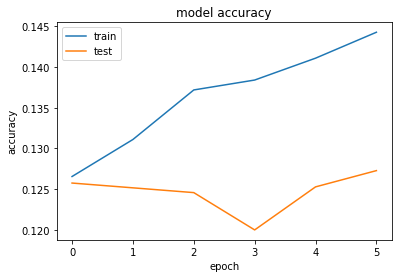

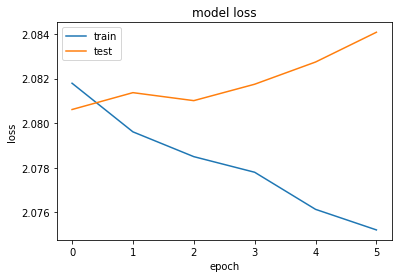

In [25]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
predictions = model.predict(test_x)

def get_card_from_encoding(encoding):
    gambels = encoding.argmax(axis=1)
    return np.vectorize(lambda x:possible_result[x])(gambels)

  1/266 [..............................] - ETA: 3:11

  2/266 [..............................] - ETA: 30s 

  3/266 [..............................] - ETA: 30s

  4/266 [..............................] - ETA: 30s

  5/266 [..............................] - ETA: 30s

  6/266 [..............................] - ETA: 30s

  7/266 [..............................] - ETA: 29s

  8/266 [..............................] - ETA: 29s

  9/266 [>.............................] - ETA: 29s

 10/266 [>.............................] - ETA: 29s

 11/266 [>.............................] - ETA: 29s

 12/266 [>.............................] - ETA: 29s

 13/266 [>.............................] - ETA: 29s

 14/266 [>.............................] - ETA: 28s

 15/266 [>.............................] - ETA: 28s

 16/266 [>.............................] - ETA: 28s

 17/266 [>.............................] - ETA: 28s

 18/266 [=>............................] - ETA: 28s

 19/266 [=>............................] - ETA: 28s

 20/266 [=>............................] - ETA: 28s

 21/266 [=>............................] - ETA: 27s

 22/266 [=>............................] - ETA: 27s

 23/266 [=>............................] - ETA: 27s

 24/266 [=>............................] - ETA: 27s

 25/266 [=>............................] - ETA: 27s

 26/266 [=>............................] - ETA: 27s

 27/266 [==>...........................] - ETA: 27s

 28/266 [==>...........................] - ETA: 27s

 29/266 [==>...........................] - ETA: 27s

 30/266 [==>...........................] - ETA: 27s

 31/266 [==>...........................] - ETA: 26s

 32/266 [==>...........................] - ETA: 26s

 33/266 [==>...........................] - ETA: 26s

 34/266 [==>...........................] - ETA: 26s

 35/266 [==>...........................] - ETA: 26s

 36/266 [===>..........................] - ETA: 26s

 37/266 [===>..........................] - ETA: 26s

 38/266 [===>..........................] - ETA: 26s

 39/266 [===>..........................] - ETA: 26s

 40/266 [===>..........................] - ETA: 26s

 41/266 [===>..........................] - ETA: 26s

 42/266 [===>..........................] - ETA: 25s

 43/266 [===>..........................] - ETA: 25s

 44/266 [===>..........................] - ETA: 25s

 45/266 [====>.........................] - ETA: 25s

 46/266 [====>.........................] - ETA: 25s

 47/266 [====>.........................] - ETA: 25s

 48/266 [====>.........................] - ETA: 25s

 49/266 [====>.........................] - ETA: 25s

 50/266 [====>.........................] - ETA: 25s

 51/266 [====>.........................] - ETA: 25s

 52/266 [====>.........................] - ETA: 24s

 53/266 [====>.........................] - ETA: 24s

 54/266 [=====>........................] - ETA: 24s

 55/266 [=====>........................] - ETA: 24s

 56/266 [=====>........................] - ETA: 24s

 57/266 [=====>........................] - ETA: 24s

 58/266 [=====>........................] - ETA: 24s

 59/266 [=====>........................] - ETA: 24s

 60/266 [=====>........................] - ETA: 24s

 61/266 [=====>........................] - ETA: 24s

 62/266 [=====>........................] - ETA: 24s

 63/266 [======>.......................] - ETA: 23s

 64/266 [======>.......................] - ETA: 23s

 65/266 [======>.......................] - ETA: 23s

 66/266 [======>.......................] - ETA: 23s

 67/266 [======>.......................] - ETA: 23s

 68/266 [======>.......................] - ETA: 23s

 69/266 [======>.......................] - ETA: 23s

 70/266 [======>.......................] - ETA: 23s

 71/266 [=======>......................] - ETA: 23s

 72/266 [=======>......................] - ETA: 23s

 73/266 [=======>......................] - ETA: 23s

 74/266 [=======>......................] - ETA: 23s

 75/266 [=======>......................] - ETA: 23s

 76/266 [=======>......................] - ETA: 23s

 77/266 [=======>......................] - ETA: 22s

 78/266 [=======>......................] - ETA: 22s

 79/266 [=======>......................] - ETA: 22s

 80/266 [========>.....................] - ETA: 22s

 81/266 [========>.....................] - ETA: 22s

 82/266 [========>.....................] - ETA: 22s

 83/266 [========>.....................] - ETA: 22s

 84/266 [========>.....................] - ETA: 22s

 85/266 [========>.....................] - ETA: 22s

 86/266 [========>.....................] - ETA: 22s

 87/266 [========>.....................] - ETA: 21s

 88/266 [========>.....................] - ETA: 21s

 89/266 [=========>....................] - ETA: 21s

 90/266 [=========>....................] - ETA: 21s

 91/266 [=========>....................] - ETA: 21s

 92/266 [=========>....................] - ETA: 21s

 93/266 [=========>....................] - ETA: 21s

 94/266 [=========>....................] - ETA: 21s

 95/266 [=========>....................] - ETA: 21s

 96/266 [=========>....................] - ETA: 20s

 97/266 [=========>....................] - ETA: 20s

 98/266 [==========>...................] - ETA: 20s

 99/266 [==========>...................] - ETA: 20s

100/266 [==========>...................] - ETA: 20s

101/266 [==========>...................] - ETA: 20s

102/266 [==========>...................] - ETA: 20s

103/266 [==========>...................] - ETA: 20s

104/266 [==========>...................] - ETA: 20s

105/266 [==========>...................] - ETA: 19s

106/266 [==========>...................] - ETA: 19s

107/266 [===========>..................] - ETA: 19s

108/266 [===========>..................] - ETA: 19s

109/266 [===========>..................] - ETA: 19s

110/266 [===========>..................] - ETA: 19s

111/266 [===========>..................] - ETA: 19s

112/266 [===========>..................] - ETA: 19s

113/266 [===========>..................] - ETA: 19s

114/266 [===========>..................] - ETA: 18s

115/266 [===========>..................] - ETA: 18s

116/266 [============>.................] - ETA: 18s

117/266 [============>.................] - ETA: 18s

118/266 [============>.................] - ETA: 18s

119/266 [============>.................] - ETA: 18s

120/266 [============>.................] - ETA: 18s

121/266 [============>.................] - ETA: 18s

122/266 [============>.................] - ETA: 17s

123/266 [============>.................] - ETA: 17s

124/266 [============>.................] - ETA: 17s

125/266 [=============>................] - ETA: 17s

126/266 [=============>................] - ETA: 17s

127/266 [=============>................] - ETA: 17s

128/266 [=============>................] - ETA: 17s

129/266 [=============>................] - ETA: 17s

130/266 [=============>................] - ETA: 17s

131/266 [=============>................] - ETA: 16s

132/266 [=============>................] - ETA: 16s

133/266 [==============>...............] - ETA: 16s

134/266 [==============>...............] - ETA: 16s

135/266 [==============>...............] - ETA: 16s

136/266 [==============>...............] - ETA: 16s

137/266 [==============>...............] - ETA: 16s

138/266 [==============>...............] - ETA: 16s

139/266 [==============>...............] - ETA: 15s

140/266 [==============>...............] - ETA: 15s

141/266 [==============>...............] - ETA: 15s

142/266 [===============>..............] - ETA: 15s

143/266 [===============>..............] - ETA: 15s

144/266 [===============>..............] - ETA: 15s

145/266 [===============>..............] - ETA: 15s

146/266 [===============>..............] - ETA: 15s

147/266 [===============>..............] - ETA: 14s

148/266 [===============>..............] - ETA: 14s

149/266 [===============>..............] - ETA: 14s

150/266 [===============>..............] - ETA: 14s

151/266 [================>.............] - ETA: 14s

152/266 [================>.............] - ETA: 14s

153/266 [================>.............] - ETA: 14s

154/266 [================>.............] - ETA: 14s

155/266 [================>.............] - ETA: 13s

156/266 [================>.............] - ETA: 13s

157/266 [================>.............] - ETA: 13s

158/266 [================>.............] - ETA: 13s

159/266 [================>.............] - ETA: 13s

160/266 [=================>............] - ETA: 13s

161/266 [=================>............] - ETA: 13s

162/266 [=================>............] - ETA: 13s

163/266 [=================>............] - ETA: 13s

164/266 [=================>............] - ETA: 12s

165/266 [=================>............] - ETA: 12s

166/266 [=================>............] - ETA: 12s

167/266 [=================>............] - ETA: 12s

168/266 [=================>............] - ETA: 12s

169/266 [==================>...........] - ETA: 12s

170/266 [==================>...........] - ETA: 12s

171/266 [==================>...........] - ETA: 12s

172/266 [==================>...........] - ETA: 11s

173/266 [==================>...........] - ETA: 11s

174/266 [==================>...........] - ETA: 11s

175/266 [==================>...........] - ETA: 11s

176/266 [==================>...........] - ETA: 11s

177/266 [==================>...........] - ETA: 11s

178/266 [===================>..........] - ETA: 11s

179/266 [===================>..........] - ETA: 11s

180/266 [===================>..........] - ETA: 10s

181/266 [===================>..........] - ETA: 10s

182/266 [===================>..........] - ETA: 10s

183/266 [===================>..........] - ETA: 10s

184/266 [===================>..........] - ETA: 10s

185/266 [===================>..........] - ETA: 10s

186/266 [===================>..........] - ETA: 10s

187/266 [====================>.........] - ETA: 10s

188/266 [====================>.........] - ETA: 9s 

189/266 [====================>.........] - ETA: 9s

190/266 [====================>.........] - ETA: 9s

191/266 [====================>.........] - ETA: 9s

192/266 [====================>.........] - ETA: 9s

193/266 [====================>.........] - ETA: 9s

194/266 [====================>.........] - ETA: 9s

195/266 [====================>.........] - ETA: 9s

196/266 [=====================>........] - ETA: 8s

197/266 [=====================>........] - ETA: 8s

198/266 [=====================>........] - ETA: 8s

199/266 [=====================>........] - ETA: 8s

200/266 [=====================>........] - ETA: 8s

201/266 [=====================>........] - ETA: 8s

202/266 [=====================>........] - ETA: 8s

203/266 [=====================>........] - ETA: 8s

204/266 [======================>.......] - ETA: 7s

205/266 [======================>.......] - ETA: 7s

206/266 [======================>.......] - ETA: 7s

207/266 [======================>.......] - ETA: 7s

208/266 [======================>.......] - ETA: 7s

209/266 [======================>.......] - ETA: 7s

210/266 [======================>.......] - ETA: 7s

211/266 [======================>.......] - ETA: 7s

212/266 [======================>.......] - ETA: 6s

213/266 [=======================>......] - ETA: 6s

214/266 [=======================>......] - ETA: 6s

215/266 [=======================>......] - ETA: 6s

216/266 [=======================>......] - ETA: 6s

217/266 [=======================>......] - ETA: 6s

218/266 [=======================>......] - ETA: 6s

219/266 [=======================>......] - ETA: 6s

220/266 [=======================>......] - ETA: 5s

221/266 [=======================>......] - ETA: 5s

222/266 [========================>.....] - ETA: 5s

223/266 [========================>.....] - ETA: 5s

224/266 [========================>.....] - ETA: 5s

225/266 [========================>.....] - ETA: 5s

226/266 [========================>.....] - ETA: 5s

227/266 [========================>.....] - ETA: 5s

228/266 [========================>.....] - ETA: 4s

229/266 [========================>.....] - ETA: 4s

230/266 [========================>.....] - ETA: 4s

231/266 [=========================>....] - ETA: 4s

232/266 [=========================>....] - ETA: 4s

233/266 [=========================>....] - ETA: 4s

234/266 [=========================>....] - ETA: 4s

235/266 [=========================>....] - ETA: 4s

236/266 [=========================>....] - ETA: 3s

237/266 [=========================>....] - ETA: 3s

238/266 [=========================>....] - ETA: 3s

239/266 [=========================>....] - ETA: 3s

240/266 [==========================>...] - ETA: 3s

241/266 [==========================>...] - ETA: 3s

242/266 [==========================>...] - ETA: 3s

243/266 [==========================>...] - ETA: 3s

244/266 [==========================>...] - ETA: 2s

245/266 [==========================>...] - ETA: 2s

246/266 [==========================>...] - ETA: 2s

247/266 [==========================>...] - ETA: 2s

248/266 [==========================>...] - ETA: 2s

249/266 [===========================>..] - ETA: 2s

250/266 [===========================>..] - ETA: 2s

251/266 [===========================>..] - ETA: 1s

252/266 [===========================>..] - ETA: 1s

253/266 [===========================>..] - ETA: 1s

254/266 [===========================>..] - ETA: 1s

255/266 [===========================>..] - ETA: 1s

256/266 [===========================>..] - ETA: 1s

257/266 [===========================>..] - ETA: 1s

258/266 [============================>.] - ETA: 1s

259/266 [============================>.] - ETA: 0s

260/266 [============================>.] - ETA: 0s

261/266 [============================>.] - ETA: 0s

262/266 [============================>.] - ETA: 0s

263/266 [============================>.] - ETA: 0s

264/266 [============================>.] - ETA: 0s

265/266 [============================>.] - ETA: 0s

266/266 [==============================] - ETA: 0s

266/266 [==============================] - 36s 133ms/step


In [27]:
# predictions_cards = get_card_from_encoding(predictions)
# true_cards = get_card_from_encoding(test_y)

# compute_statistics(predictions_cards,true_cards)